# A comparative study in Diabetes Diagnosis through Multilayer Perceptron and Support Vector Machine


## Abstract
Multilayer Perceptron (MLP) and Support Vector Machine (SVM) algorithms yielded similar test AUCs and accuracies on the Pima Indian Diabetes dataset. MLP’s higher specificity of 89% compared to SVM (78%) makes MLP more suitable for practical use, as there is a high cost associated with the incorrect classification of a large number of non-diabetes patients.


## Background

Early diagnosis and treatment of diabetes are essential to avoid complications such as blindness, kidney failure, heart attacks, stroke and lower limb amputation[1]. In this work, we compared and critically evaluated the use of Multilayer Perceptron (MLP) and Support Vector Machine (SVM) to aid the diagnosis of diabetes using the [Pima Indian Diabetes database](https://www.kaggle.com/uciml/pima-indians-diabetes-database). PyTorch and Scikit-learn packages were used to build the models. This investigation was implemented on a machine with Intel Core i5 processor running at 2.3 GHz.

## Multilayer Perceptron (MLP)

MLP is a class of feed-forward artificial neural network consisting of fully connected neurons in an input layer, one or more hidden layers and an output layer[2]. During training, data are repeatedly passed into MLP and each neuron passes to the next layer a signal that is a function of sum of the inputs. An error signal which is calculated by the difference between the actual and the predicted output is back propagated through the network such that the weight of each neuron can be adjusted to minimize the error (loss).
Advantages of MLP are that it works on non-linearly separable data and does not require prior knowledge or assumption on the data distribution. A disadvantage of MLP is that it is prone to overfitting. Nonetheless, this may be reduced by the application of dropout, batch normalization and early stopping[3,4]. Another disadvantage is that it is technically challenging, computationally expensive and time-consuming to build and train MLP models. Variations in architecture, activation function, learning rate, dropout rate, batch size and other parameters can produce significant difference in predictive power. Furthermore, MLP may yield a solution that is a local minimum instead of the global minimum[5], depending on the choice of initial weights, learning rate and momentum.

## Support Vector Machine Classifier (SVM)

In the context of binary classification, SVM is an algorithm that separates two classes by maximizing the margin between data points and the optimal decision boundary in a feature space[6]. A kernel can be applied to transform input data into a higher dimensional feature space to enable computation of a decision boundary.
SVM has the advantage of yielding global and unique solution. In addition, the computation time and cost are relatively low, as only the examples closest to the decision boundary (support vectors) determine the optimal decision boundary. A disadvantage of SVM is that it assumes the data is linearly separable, which is not always appropriate. Furthermore, the selection of kernel requires either prior knowledge on the distribution of the data or trial-and-error. Underfitting occurs when the decision boundary does not effectively separate the data points into two classes in the selected transformed space. In addition, any noise near the decision boundary would have a significant impact to the model. Nonetheless, regularization can be incorporated into SVM by separating the two classes with a large margin, enhancing its immunity to noise.

## Hypothesis

1. MLP yields a higher Area Under the Receiver Operation Curve (AUC) score than SVM. SVM assumes that the data is linearly separable, but this is not the case for the dataset. MLP does not have such an assumption. This is supported by the literature -– MLP achieved an accuracy of 0.82 [7], whereas SVM attained a lower accuracy of 0.78 [8]. 
2. Randomized search for MLP requires a longer time than for SVM. SVM only considers a small number of data points closest to the decision boundary, whereas training MLP involves numerous iterations of complex computation.


## Dataset

The Pima Indian Diabetes database was obtained from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) [9] (originally from UCI). The dataset originally contained 8 numeric (continuous) features of 768 Pima Indian females aged 21 or above. A total of 268 females were diagnosed with diabetes and 500 females were not. Six features, namely ‘Pregnancies’ (number of previous pregnancies), ‘Glucose’ (2-hour plasma glucose concentration in an oral glucose tolerance test), ‘BloodPressure’ (diastolic blood pressure), ‘BMI’ (body mass index), ‘DiabetesPedigreeFunction’ (diabetes pedigree function) and ‘Age’ (age in years) were used for analysis. Missing values were encoded as zero and distributed randomly in the columns ‘SkinThickness’ (tricep skinfold thickness), ‘Insulin’ (2-hour serum insulin), ‘Glucose’, ‘BloodPressure’ and ‘BMI’. Removing the columns ‘SkinThickness’ and ‘Insulin’ and imputing the remainder with mean yielded highest accuracy in our experiment and were implemented (see Appendix).

Details of pre-processing and exploration of the dataset can be found in Diabetes-Preprocessing.ipynb.


## Methodology

The following training and evaluation methodology were adopted.
1. Divided data into training and test sets in 80:20 ratio using stratified sampling such that equal
proportions of diabetes patients and non-diabetes patients were in both sets.
2. Applied Synthetic Minority Over-sampling Technique (SMOTE) on the minority non-diabetes
class in the training set such that both classes became equal in size and the bias towards the
majority class was eliminated during training [10].
3. Standardized the features in both training and test sets to zero mean and unit variance.
4. Selected the best model for each algorithm based on AUC using randomized search on the
hyperparameters on the training data. Stratified five-fold cross-validation was used to reduce bias and increase generalizability of the models. Using AUC is more appropriate than accuracy, because AUC is less sensitive to differences in target class proportions in the training and test sets. For MLP, Early Stopping was applied to reduce overfitting such that the training stopped when there was no improvement in validation accuracy (determined using a random selection of 20% of the training data that was unseen during training) in the last 5 epochs or when a maximum of 100 epochs were completed.
5. Measured the time required to perform randomized search for each algorithm across five scoring functions (accuracy, precision, recall, F1 score and AUC) on a Macbook Pro equipped with a 2.3GHz Intel Core i5 processor with Python’s Time module.
6. Evaluated and compared the algorithms based on AUC on the test data and the time required for the randomized search.

### Architecture and Parameters for MLP

The MLP contained 6 input neurons, one or two hidden layers and two output neurons. Rectified linear unit (RELu) activation function was applied in the input and hidden layers. Softmax was used in the output layer to give predicted probabilities for each class. Stochastic gradient decent algorithm was used to update the weights of neurons. The optimal combination of the number of neurons, optimizer momentum, learning rate, dropout rate for input and hidden layers, and batch size in MLP with one or two hidden layers were selected using stratified 5-fold cross validated Randomized Search based on AUC score.

### Architecture and Parameters for SVM

The optimal kernel, regularization parameter C, and for polynomial and RBF kernels, the kernel coefficient gamma, were determined using stratified 5-fold cross validated Randomized Search based on AUC score.

## Import Libraries and Pre-processed Dataset

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
plot_roc_curve, roc_curve, plot_confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import torch
from torch import nn
import torch.nn.functional as F
import pickle
from time import time
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping
import sys

In [2]:
# Version of Python used
print('Python==' + str(sys.version))

Python==3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]


In [3]:
# Version numbers of libraries used
print('pandas==' + str(pd.__version__))
print('matplotlib==' + str(sys.modules[plt.__package__].__version__))
print('numpy==' + str(np.__version__))
print('seaborn==' + str(sns.__version__))
print('missingno==' + str(msno.__version__))
print('statsmodels==' + str(sys.modules[add_constant.__module__[:add_constant.__module__.index(".")]].__version__))
print('scikit-learn==' + str(sys.modules[StandardScaler.__module__[:StandardScaler.__module__.index(".")]].__version__))
print('torch==' + str(torch.__version__))
print('skorch==' + str(sys.modules[NeuralNetClassifier.__module__[:NeuralNetClassifier.__module__.index(".")]].__version__))
print('imbalanced-learn==' + str(sys.modules[SMOTE.__module__[:SMOTE.__module__.index(".")]].__version__))

pandas==1.1.1
matplotlib==3.3.1
numpy==1.19.1
seaborn==0.11.0
missingno==0.4.2
statsmodels==0.12.0
scikit-learn==0.24.1
torch==1.7.1
skorch==0.9.0
imbalanced-learn==0.8.0


Note these built-in modules of Python 3 'pickle', 'collections', 'time' were also used.

In [4]:
# Import dataset
data = pd.read_csv('processed_diabetes.csv', index_col = [0])

In [5]:
# Size of dataset
print('The dataset has %.0f rows and %.0f columns.'%(data.shape[0],data.shape[1]))

The dataset has 768 rows and 7 columns.


## Inspect and Transform Pre-processed Dataset

In [6]:
# Inspect data types of the columns
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Visualize summary statistics for diabetes patients
data[data.Outcome==1].describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.165573,75.147324,35.384757,0.550500,37.067164,1.0
std,3.741239,29.541750,11.945712,6.595065,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,67.100000,2.420000,70.000000,1.0


In [8]:
# Visualize summary statistics for non-diabetes patients
data[data.Outcome==0].describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.710121,70.935397,30.888434,0.429734,31.190000,0.0
std,3.017185,24.717060,11.931033,6.504779,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,72.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,57.300000,2.329000,81.000000,0.0


### Split data into predictors and target

In [9]:
## Split data into predictors and target 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)

(768, 6)
(768,)


### Split data into training and test sets

In [10]:
## Split data into training set and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 6)
(614,)
(154, 6)
(154,)


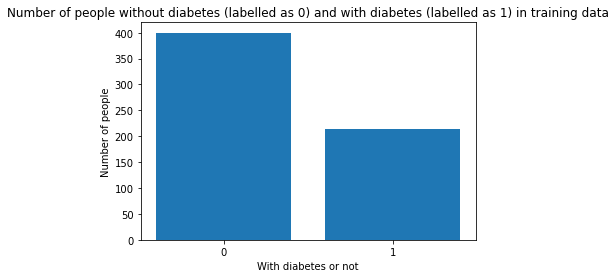

In [11]:
# Visualize the number of data in the two target classes in training set
train_class_count = pd.DataFrame(y_train)
plt.bar(range(len(train_class_count.value_counts())), train_class_count.value_counts())
plt.xticks([0,1])
plt.title("Number of people without diabetes (labelled as 0) and with diabetes (labelled as 1) in training data")
plt.ylabel("Number of people")
plt.xlabel("With diabetes or not")
plt.show()

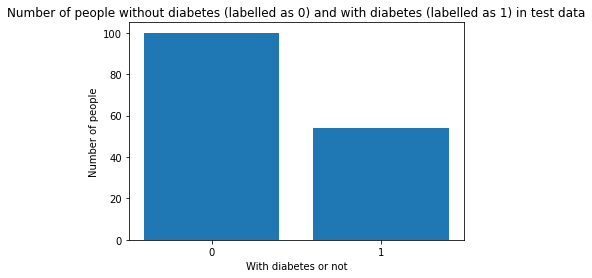

In [12]:
# Visualize the number of data in the two target classes in test set
test_class_count = pd.DataFrame(y_test)
plt.bar(range(len(test_class_count.value_counts())), test_class_count.value_counts())
plt.xticks([0,1])
plt.title("Number of people without diabetes (labelled as 0) and with diabetes (labelled as 1) in test data")
plt.ylabel("Number of people")
plt.xlabel("With diabetes or not")
plt.show()

The training set and test set have the same distribution of target classes.

### Apply Synthetic Minority Over-sampling Technique (SMOTE) to training set

In [13]:
smt = SMOTE(sampling_strategy='minority', random_state=1)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)

(800, 6)
(800,)


In [14]:
# Number of data in the target classes after resampling
Counter(y_train_smote)

Counter({1: 400, 0: 400})

Both target classes contain 400 examples after performing oversampling on the minority class.

In [15]:
Counter(y_test)

Counter({0: 100, 1: 54})

The number of examples in each target class in the test set remained unbalanced.

### Apply standardization on predictors

In [16]:
# Scale each feature to values between 0 and 1
scaler = StandardScaler()

In [17]:
# Fit and transform all features in augmented training data 
X_train_smote = scaler.fit_transform(X_train_smote)
print(X_train_smote.shape)

(800, 6)


In [18]:
# Transform all features in test data 
X_test = scaler.transform(X_test)
print(X_test.shape)

(154, 6)


In [19]:
# Inspect distribution of features after scaling
pd.DataFrame(X_train_smote, columns = data.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,1.287859e-16,6.864648e-16,4.816286e-16,1.221245e-15,1.571659e-17,-1.640216e-15
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-1.208217e+00,-2.671495e+00,-3.778196e+00,-2.202427e+00,-1.224557e+00,-1.132306e+00
25%,-9.112203e-01,-7.500742e-01,-6.146475e-01,-6.461541e-01,-7.135986e-01,-7.794140e-01
50%,-3.172275e-01,-1.313116e-01,-5.178323e-02,-7.044464e-02,-2.897687e-01,-2.439629e-01
75%,6.651142e-01,6.502833e-01,6.156215e-01,5.609786e-01,4.921753e-01,6.443799e-01
max,3.840722e+00,2.376305e+00,3.251912e+00,5.062655e+00,5.674862e+00,4.197751e+00


### Convert data to correct data types

In [20]:
# Convert features to 'float32' and target to 'int64'
X_train_smote = np.array(X_train_smote).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train_smote = np.array(y_train_smote).astype('int64')
y_test = np.array(y_test).astype('int64')

print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(800, 6)
(154, 6)
(800,)
(154,)


## Construct Support Vector Machine (SVM) Model

### Compare between 5 and 10-fold cross-validation

In [47]:
# Code in this section is adapted based on https://towardsdatascience.com/
#     machine-learning-classifiers-comparison-with-python-33149aecdbca

In [10]:
# Create a SVM model with a linear kernel
svc_linear = SVC(kernel='linear', random_state=1)    

In [11]:
# Create dictionary for storing mean performance metrics scores
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score),
           'AUC': 'roc_auc'}

In [12]:
# Create function that performs cross-validation and evaluates each classifier
def models_evaluation(X_train, y_train):
    
    # Perform cross-validation on each classifier
    cv_svc_linear_5fold = cross_validate(svc_linear, X_train, y_train, cv=5, scoring=scoring)
    cv_svc_linear_10fold = cross_validate(svc_linear, X_train, y_train, cv=10, scoring=scoring)
   
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each classifier
    mean_scores_table = pd.DataFrame({'5 fold':[cv_svc_linear_5fold['test_accuracy'].mean(),
                                                         cv_svc_linear_5fold['test_precision'].mean(),
                                                         cv_svc_linear_5fold['test_recall'].mean(),
                                                         cv_svc_linear_5fold['test_f1_score'].mean(),
                                                         cv_svc_linear_5fold['test_AUC'].mean()],
                                       '10 fold':[cv_svc_linear_10fold['test_accuracy'].mean(),
                                                            cv_svc_linear_10fold['test_precision'].mean(),
                                                            cv_svc_linear_10fold['test_recall'].mean(),
                                                            cv_svc_linear_10fold['test_f1_score'].mean(),
                                                            cv_svc_linear_10fold['test_AUC'].mean()]},
                                       index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each classifier
    std_scores_table = pd.DataFrame({'5 fold':[cv_svc_linear_5fold['test_accuracy'].std(),
                                                         cv_svc_linear_5fold['test_precision'].std(),
                                                         cv_svc_linear_5fold['test_recall'].std(),
                                                         cv_svc_linear_5fold['test_f1_score'].std(),
                                                         cv_svc_linear_5fold['test_AUC'].std()],
                                     '10 fold':[cv_svc_linear_10fold['test_accuracy'].std(),
                                                            cv_svc_linear_10fold['test_precision'].std(),
                                                            cv_svc_linear_10fold['test_recall'].std(),
                                                            cv_svc_linear_10fold['test_f1_score'].std(),
                                                            cv_svc_linear_10fold['test_AUC'].std()]},
                                     index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each classifier
    return mean_scores_table, std_scores_table
                     
# Evaluate classifiers on training data
mean_scores_table, std_scores_table = models_evaluation(X_train_smote, y_train_smote)

# Display the average cross-validation scores 
print(mean_scores_table)

# Display the average cross-validation scores 
print(std_scores_table)

             5 fold   10 fold Best Score
Accuracy   0.740000  0.736250     5 fold
Precision  0.747876  0.749116    10 fold
Recall     0.725000  0.715000     5 fold
F1 Score   0.735956  0.729958     5 fold
AUC        0.833656  0.832812     5 fold
             5 fold   10 fold Minimum standard deviation
Accuracy   0.029738  0.042371                     5 fold
Precision  0.032752  0.051374                     5 fold
Recall     0.035355  0.061441                     5 fold
F1 Score   0.030293  0.044993                     5 fold
AUC        0.028039  0.046983                     5 fold


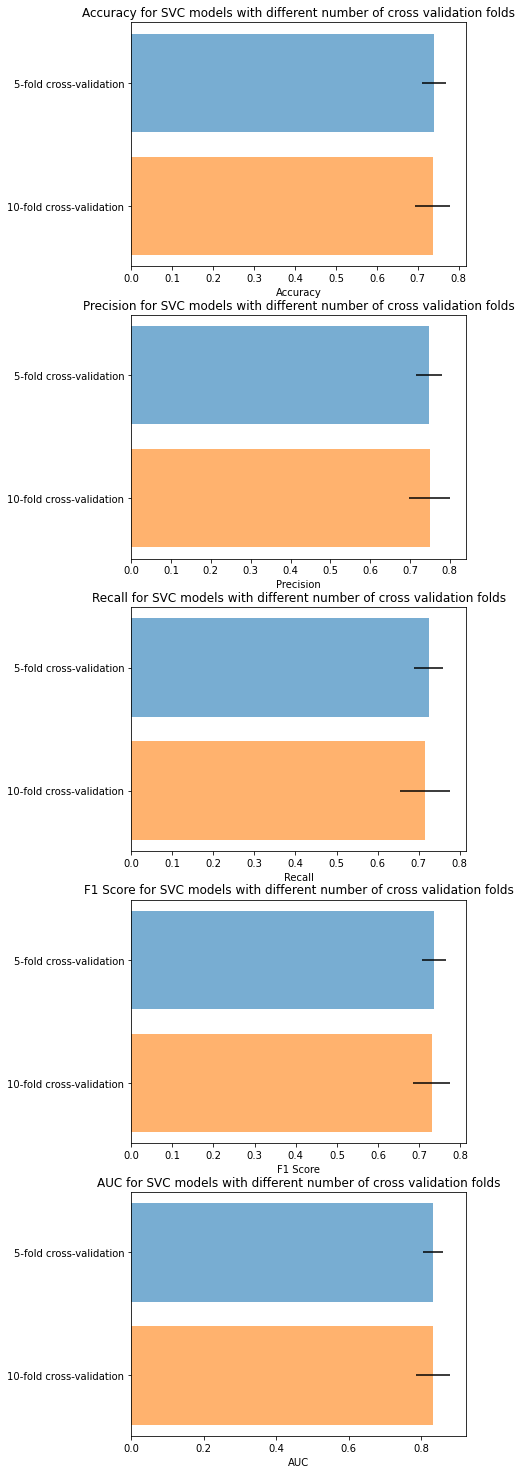

In [13]:
# Plot bar graphs to show the mean and standard deviation of performance metrics of 5-fold and 10-fold cross-validated SVM models
x_labels = ['5-fold cross-validation',
            '10-fold cross-validation']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for SVC models with different number of cross validation folds'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

The use of ten-fold cross-validation was suggested in the paper "A Study of Cross􏰇-Validation and Bootstrap for Accuracy Estimation and Model Selection" by Ron Kohavi
http://robotics.stanford.edu/%7Eronnyk/accEst.pdf. 

Based on the above experiment, five-fold and ten-fold cross-validated models yielded similar performance in terms of accuracy, precision, recall, F1 score and Area Under the receiver operation Curve (AUC). However, five-fold cross-validated model yielded smaller standard deviations for these performance metrics. This was probably because the test set became too small when 10 folds were used and any extreme values included in the test set would have an significant impact on the performance of each fold, leading to the greater variations in performance of the models in the folds.

We will use five-fold cross-validation in this study.

### Compare between linear, polynomial (degree 2 or 3), radial basis function (RBF) and sigmoid kernels

In [53]:
# Code in this section is adapted based on https://towardsdatascience.com/
#    machine-learning-classifiers-comparison-with-python-33149aecdbca

In [54]:
# Create SVM models with different kernels
svc_poly2 = SVC(kernel='poly', degree=2, random_state=1)
svc_poly3 = SVC(kernel='poly', degree=3, random_state=1)
svc_rbf = SVC(kernel='rbf', random_state=1)
svc_sigmoid = SVC(kernel='sigmoid', random_state=1)
dummy_model = DummyClassifier(strategy='stratified', random_state=1)

In [55]:
# Create function that performs cross-validation and evaluates each classifier
def models_evaluation(X_train, y_train):
    
    # Perform cross-validation on each classifier
    cv_svc_linear = cross_validate(svc_linear, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svc_poly2 = cross_validate(svc_poly2, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svc_poly3 = cross_validate(svc_poly3, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svc_rbf = cross_validate(svc_rbf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svc_sigmoid = cross_validate(svc_sigmoid, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_dummy_model = cross_validate(dummy_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each classifier
    mean_scores_table = pd.DataFrame({'Linear kernel':[cv_svc_linear['test_accuracy'].mean(),
                                                         cv_svc_linear['test_precision'].mean(),
                                                         cv_svc_linear['test_recall'].mean(),
                                                         cv_svc_linear['test_f1_score'].mean(),
                                                         cv_svc_linear['test_AUC'].mean()],
                                       'Polynomial (degree 2) kernel':[cv_svc_poly2['test_accuracy'].mean(),
                                                            cv_svc_poly2['test_precision'].mean(),
                                                            cv_svc_poly2['test_recall'].mean(),
                                                            cv_svc_poly2['test_f1_score'].mean(),
                                                            cv_svc_poly2['test_AUC'].mean()],
                                      'Polynomial (degree 3) kernel':[cv_svc_poly3['test_accuracy'].mean(),
                                                            cv_svc_poly3['test_precision'].mean(),
                                                            cv_svc_poly3['test_recall'].mean(),
                                                            cv_svc_poly3['test_f1_score'].mean(),
                                                            cv_svc_poly3['test_AUC'].mean()],
                                       'Radial basis function kernel':[cv_svc_rbf['test_accuracy'].mean(),
                                                            cv_svc_rbf['test_precision'].mean(),
                                                            cv_svc_rbf['test_recall'].mean(),
                                                            cv_svc_rbf['test_f1_score'].mean(),
                                                            cv_svc_rbf['test_AUC'].mean()],
                                       'Sigmoid kernel':[cv_svc_sigmoid['test_accuracy'].mean(),
                                                         cv_svc_sigmoid['test_precision'].mean(),
                                                         cv_svc_sigmoid['test_recall'].mean(),
                                                         cv_svc_sigmoid['test_f1_score'].mean(),
                                                        cv_svc_sigmoid['test_AUC'].mean()],
                                     'Dummy classifier':[cv_dummy_model['test_accuracy'].mean(),
                                                         cv_dummy_model['test_precision'].mean(),
                                                         cv_dummy_model['test_recall'].mean(),
                                                         cv_dummy_model['test_f1_score'].mean(),
                                                        cv_dummy_model['test_AUC'].mean()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each classifier
    std_scores_table = pd.DataFrame({'Linear kernel':[cv_svc_linear['test_accuracy'].std(),
                                                         cv_svc_linear['test_precision'].std(),
                                                         cv_svc_linear['test_recall'].std(),
                                                         cv_svc_linear['test_f1_score'].std(),
                                                         cv_svc_linear['test_AUC'].std()],
                                       'Polynomial (degree 2) kernel':[cv_svc_poly2['test_accuracy'].std(),
                                                            cv_svc_poly2['test_precision'].std(),
                                                            cv_svc_poly2['test_recall'].std(),
                                                            cv_svc_poly2['test_f1_score'].std(),
                                                            cv_svc_poly2['test_AUC'].std()],
                                       'Polynomial (degree 3) kernel':[cv_svc_poly3['test_accuracy'].std(),
                                                            cv_svc_poly3['test_precision'].std(),
                                                            cv_svc_poly3['test_recall'].std(),
                                                            cv_svc_poly3['test_f1_score'].std(),
                                                            cv_svc_poly3['test_AUC'].std()],
                                       'Radial basis function kernel':[cv_svc_rbf['test_accuracy'].std(),
                                                            cv_svc_rbf['test_precision'].std(),
                                                            cv_svc_rbf['test_recall'].std(),
                                                            cv_svc_rbf['test_f1_score'].std(),
                                                            cv_svc_rbf['test_AUC'].std()],
                                       'Sigmoid kernel':[cv_svc_sigmoid['test_accuracy'].std(),
                                                         cv_svc_sigmoid['test_precision'].std(),
                                                         cv_svc_sigmoid['test_recall'].std(),
                                                         cv_svc_sigmoid['test_f1_score'].std(),
                                                         cv_svc_sigmoid['test_AUC'].std()],
                                     'Dummy classifier':[cv_dummy_model['test_accuracy'].std(),
                                                         cv_dummy_model['test_precision'].std(),
                                                         cv_dummy_model['test_recall'].std(),
                                                         cv_dummy_model['test_f1_score'].std(),
                                                        cv_dummy_model['test_AUC'].std()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each classifier
    return mean_scores_table, std_scores_table
    
                                       
# Evaluate the classifiers 
mean_scores_table, std_scores_table = models_evaluation(X_train_smote, y_train_smote)

# Display the average cross-validation scores
print(mean_scores_table)

# Display the standard deviations of the cross-validation scores
print(std_scores_table)

           Linear kernel  Polynomial (degree 2) kernel  \
Accuracy        0.738750                      0.588750   
Precision       0.747097                      0.630245   
Recall          0.722500                      0.435000   
F1 Score        0.734300                      0.512862   
AUC             0.833594                      0.636563   

           Polynomial (degree 3) kernel  Radial basis function kernel  \
Accuracy                       0.723750                      0.797500   
Precision                      0.750289                      0.772165   
Recall                         0.685000                      0.845000   
F1 Score                       0.713208                      0.806204   
AUC                            0.816875                      0.859781   

           Sigmoid kernel  Dummy classifier                    Best Score  
Accuracy         0.662500          0.455000  Radial basis function kernel  
Precision        0.666234          0.453846  Radial basis fu

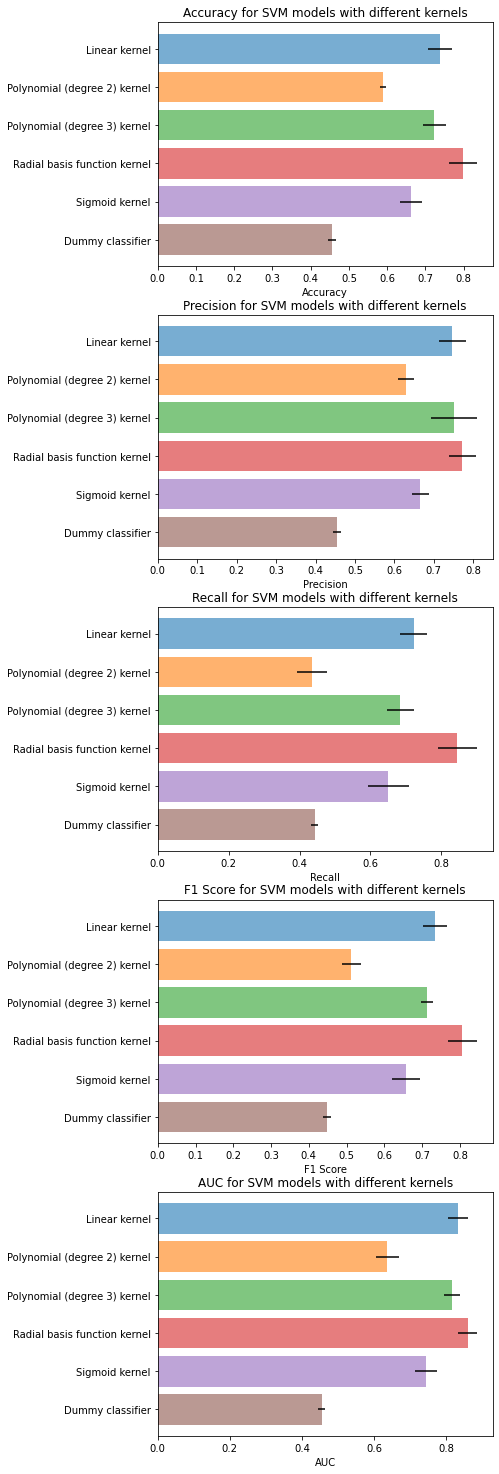

In [56]:
# Plot bar graphs that show mean and standard deviation of the performance metrics of SVM models with different kernels 
x_labels = ['Linear kernel',
            'Polynomial (degree 2) kernel',
            'Polynomial (degree 3) kernel',
            'Radial basis function kernel',
            'Sigmoid kernel',
            'Dummy classifier']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for SVM models with different kernels'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

The SVM model with radial basis function (RBF) kernel yielded highest AUC score, accuracy, precision, recall and F1 score. Linear kernal and the third degree polynomial kernel model were next best models. The Linear kernel model was the second highest in terms of AUC score, accuracy, recall and F1 score, while the third degree polynomial kernel showed second highest precision. The sigmoid kernel model was better than the  second degree polynomial kernel model in terms of AUC score, accuracy, precision, recall and F1 score amongst the SVM models. 

The dummy classifier model that makes stratified random class predictions showed poorest performance in all the perfomance metrics (AUC, accuracy, precision, recall and F1 score).

I will search for the best hyperparameters for the RBF kernel, linear kernel and third degree polynomial kernel models, since these three kernels showed the highest performance in terms of AUC score.

### Perform randomized search on SVM model hyperparameters

Performed randomized search on combinations of the following hyperparameters for the 5-fold cross-validated SVM model.
- kernel: 'rbf', 'poly' (with 'degree' set to 3), 'linear'
- C: four options, 0.1, 1,10 or 100 
- gamma (only for 'rbf' kernel): three options, 0.01, 0.02 or 0.03

In [44]:
# Randomized Search on SVM model hyperparmeters
# Code is adapted based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

# Start timer
tic = time()

# Define the search values
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.02, 0.03],
                     'C': [0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [3],
                      'gamma': [0.01, 0.02, 0.03],
                     'C': [0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 
                     'C': [0.1, 1, 10, 100]}]

# Print the accuracy, precision, recall, F1 score and AUC score for each set of parameters
for score in ['accuracy','precision','recall','f1','roc_auc']:
 print("# Tuning hyper-parameters for %s" %score)
 print()
 classifier = RandomizedSearchCV(SVC(), tuned_parameters, scoring=score, cv=5, random_state =1)
 classifier.fit(X_train_smote, y_train_smote)

 print("Best parameters found:")
 print()
 print(classifier.best_params_)
 print()
 print("Randomized search scores on training set:")
 print()
 means = classifier.cv_results_['mean_test_score']
 stds = classifier.cv_results_['std_test_score']
 for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
 print()

# Print time required in seconds for the search
toc = time()
print('Time taken in seconds: %.2f'%(toc-tic))

# Tuning hyper-parameters for accuracy

Best parameters found:

{'kernel': 'rbf', 'gamma': 0.02, 'C': 100}

Randomized search scores on training set:

0.731 (+/-0.061) for {'kernel': 'linear', 'C': 0.1}
0.609 (+/-0.053) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 1}
0.653 (+/-0.042) for {'kernel': 'poly', 'gamma': 0.02, 'degree': 3, 'C': 10}
0.694 (+/-0.045) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 10}
0.509 (+/-0.035) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 0.1}
0.741 (+/-0.054) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.715 (+/-0.047) for {'kernel': 'poly', 'gamma': 0.02, 'degree': 3, 'C': 100}
0.784 (+/-0.056) for {'kernel': 'rbf', 'gamma': 0.02, 'C': 100}
0.659 (+/-0.040) for {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 100}
0.745 (+/-0.064) for {'kernel': 'rbf', 'gamma': 0.02, 'C': 1}

# Tuning hyper-parameters for precision



/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bona/Applications/miniconda2/lib/python3.7/site-

Best parameters found:

{'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 1}

Randomized search scores on training set:

0.745 (+/-0.056) for {'kernel': 'linear', 'C': 0.1}
0.834 (+/-0.133) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 1}
0.824 (+/-0.041) for {'kernel': 'poly', 'gamma': 0.02, 'degree': 3, 'C': 10}
0.801 (+/-0.049) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 10}
0.147 (+/-0.587) for {'kernel': 'poly', 'gamma': 0.03, 'degree': 3, 'C': 0.1}
0.747 (+/-0.057) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.779 (+/-0.073) for {'kernel': 'poly', 'gamma': 0.02, 'degree': 3, 'C': 100}
0.758 (+/-0.057) for {'kernel': 'rbf', 'gamma': 0.02, 'C': 100}
0.814 (+/-0.060) for {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 100}
0.741 (+/-0.057) for {'kernel': 'rbf', 'gamma': 0.02, 'C': 1}

# Tuning hyper-parameters for recall

Best parameters found:

{'kernel': 'rbf', 'gamma': 0.02, 'C': 100}

Randomized search scores on training set:

0.702 (+/-0.086) for {'

Different optimal hyperparameters were given by the different performance metrics.

Highest AUC score and accuracy was obtained for radial basis function (RBF) kernel, gamma=0.02 and C=100. We will use these hyperparameters to construct the best SVM model.

Highest precision was obtained for third degree polynomial kernel, gamma=0.03 and C=1.

Highest recall was obtained for RBF kernel, gamma=0.02 and C=100.

Highest F1 score was obtained for RBF kernel, gamma=0.02 and C=100.

### Train best SVM model

Train best SVM model using radial basis function (RBF) kernel, gamma=0.02 and C=100 based on Randomized Search results. 

In [40]:
# Create best SVM model and fit the model to training data
best_svm = SVC(kernel='rbf', C= 100, gamma= 0.02, probability= True, random_state=1)
best_svm.fit(X_train_smote, y_train_smote)

SVC(C=100, gamma=0.02, probability=True, random_state=1)

In [45]:
# Find the number of support vectors for each class
best_svm.n_support_

array([195, 203], dtype=int32)

### Save best SVM model

In [46]:
# Save the best SVM model to file
pickle.dump(best_svm, open('best_svm.sav', 'wb'))

## Construct Multilayer Perceptron (MLP) Model

In [70]:
# Run codes on 'CPU'
device = 'cpu'

### Compare between wide, deep and intermediate network architectures

The performances of 5-fold cross-validated wide, deep and intermediate network architectures were compared in terms of accuracy, precision, recall, F1 score and AUC score.

Wide neural network had only one hidden layer containing 9 neurons.

Deep neural network had four hidden layers each containing 4 neurons.

Intermediate neural network had three hidden layers each containing 6 neurons.

In [ ]:
# Code in this section is adapted based on https://towardsdatascience.com/
#    machine-learning-classifiers-comparison-with-python-33149aecdbca

In [76]:
# Define a wide neural network that has only one hidden layer

# Set number of neurons in hidden layer equal to 9
hidden_size = 9

class WideNetModule(nn.Module):
    def __init__(
            self,
            hidden_dim=hidden_size,
            dropout=0.2):  # Apply mild dropout for regularization
        super(WideNetModule, self).__init__()
        self.dropout = nn.Dropout(dropout) #  Number of input neurons equals the number of features in dataset
        self.hidden = nn.Linear(X.shape[1], hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)  # Number of output neurons is two, because there are two target classes

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X), dim=-1)
        return X

In [77]:
# Define a deep neural network that has four hidden layers

# Set number of neurons in each hidden layer equal to 4
hidden_size1 = 4
hidden_size2 = 4
hidden_size3 = 4 
hidden_size4 = 4 

class DeepNetModule(nn.Module):
    def __init__(
            self,
            hidden_dim1=hidden_size1,
            hidden_dim2=hidden_size2,
            hidden_dim3=hidden_size3,
            hidden_dim4=hidden_size4,
            dropout=0.2): # Apply mild dropout for regularization
        super(DeepNetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden1 = nn.Linear(X.shape[1], hidden_dim1) # Number of input neurons equals the number of features in dataset
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.hidden3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.hidden4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.output = nn.Linear(hidden_dim4, 2) # Number of output neurons is two, because there are two target classes

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden1(X))
        X = self.dropout(X)
        X = torch.relu(self.hidden2(X))
        X = self.dropout(X)
        X = torch.relu(self.hidden3(X))
        X = self.dropout(X)
        X = torch.relu(self.hidden4(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X), dim=-1)
        return X



In [78]:
# Define an intermediate network that has two hidden layers

# Set the number of neurons in each hidden layer equal to 6
hidden_size1 = 6
hidden_size2 = 6

class IntermediateNetModule(nn.Module):
    def __init__(
            self,
            hidden_dim1=hidden_size1,
            hidden_dim2=hidden_size2, 
            dropout=0.2 # Apply mild dropout for regularization
    ):
        super(IntermediateNetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden1 = nn.Linear(X.shape[1], hidden_dim1) # Number of input neurons equals the number of features in dataset
        self.hidden2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.output = nn.Linear(hidden_dim2, 2) # Number of output neurons is two, because there are two target classes

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden1(X))
        X = self.dropout(X)
        X = torch.relu(self.hidden2(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X), dim=-1)
        return X



In [283]:
# Specify parameters for each neural network

# For reproducibility
torch.manual_seed(0)

wideNet = NeuralNetClassifier(module=WideNetModule, 
                                    lr = 0.1, # Learning rate set to 0.1
                                    max_epochs=100, # Maximum epochs set to 100
                                    callbacks=[EarlyStopping()], # Apply early stopping to avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, # Shuffle training data on each epoch
                                    optimizer = torch.optim.SGD, # Use stochastic gradient descent algorithm
                                    batch_size = 32) # Batch size set to 32
                                
deepNet = NeuralNetClassifier(module=DeepNetModule,
                                    lr = 0.1, # Learning rate set to 0.1
                                    max_epochs=100, # Maximum epochs set to 100
                                    callbacks=[EarlyStopping()], # Apply early stopping to avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, # Shuffle training data on each epoch
                                    optimizer = torch.optim.SGD, # Use stochastic gradient descent algorithm
                                    batch_size = 32) # Batch size set to 32
                                   
intermediateNet = NeuralNetClassifier(module=IntermediateNetModule,
                                    lr = 0.1, # Learning rate set to 0.1
                                    max_epochs=100, # Maximum epochs set to 100
                                    callbacks=[EarlyStopping()], # Apply early stopping to avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, # Shuffle training data on each epoch
                                    optimizer = torch.optim.SGD, # Use stochastic gradient descent algorithm
                                    batch_size = 32) # Batch size set to 32
                                

In [284]:
# Create a function that performs cross-validation and evaluates each MLP model and dummy classifier

def models_evaluation(X_train, y_train):
    # Perform cross-validation on each classifier
    cv_wideNet = cross_validate(wideNet, X_train, y_train, cv=5, scoring=scoring)
    cv_deepNet = cross_validate(deepNet, X_train, y_train, cv=5, scoring=scoring)
    cv_intermediateNet = cross_validate(intermediateNet, X_train, y_train, cv=5, scoring=scoring)
    cv_dummy_model = cross_validate(dummy_model, X_train, y_train, cv=5, scoring=scoring)
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each classifier
    mean_scores_table = pd.DataFrame({'Wide neural network':[cv_wideNet['test_accuracy'].mean(),
                                                         cv_wideNet['test_precision'].mean(),
                                                         cv_wideNet['test_recall'].mean(),
                                                         cv_wideNet['test_f1_score'].mean(),
                                                         cv_wideNet['test_AUC'].mean()],
                                       'Deep neural network':[cv_deepNet['test_accuracy'].mean(),
                                                            cv_deepNet['test_precision'].mean(),
                                                            cv_deepNet['test_recall'].mean(),
                                                            cv_deepNet['test_f1_score'].mean(),
                                                            cv_deepNet['test_AUC'].mean()],
                                      'Intermediate neural network':[cv_intermediateNet['test_accuracy'].mean(),
                                                            cv_intermediateNet['test_precision'].mean(),
                                                            cv_intermediateNet['test_recall'].mean(),
                                                            cv_intermediateNet['test_f1_score'].mean(),
                                                            cv_intermediateNet['test_AUC'].mean()],
                                     'Dummy classifier':[cv_dummy_model['test_accuracy'].mean(),
                                                         cv_dummy_model['test_precision'].mean(),
                                                         cv_dummy_model['test_recall'].mean(),
                                                         cv_dummy_model['test_f1_score'].mean(),
                                                        cv_dummy_model['test_AUC'].mean()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each classifier
    std_scores_table = pd.DataFrame({'Wide neural network':[cv_wideNet['test_accuracy'].std(),
                                                         cv_wideNet['test_precision'].std(),
                                                         cv_wideNet['test_recall'].std(),
                                                         cv_wideNet['test_f1_score'].std(),
                                                         cv_wideNet['test_AUC'].std()],
                                     'Deep neural network':[cv_deepNet['test_accuracy'].std(),
                                                            cv_deepNet['test_precision'].std(),
                                                            cv_deepNet['test_recall'].std(),
                                                            cv_deepNet['test_f1_score'].std(),
                                                            cv_deepNet['test_AUC'].std()],
                                     'Intermediate neural network':[cv_intermediateNet['test_accuracy'].std(),
                                                            cv_intermediateNet['test_precision'].std(),
                                                            cv_intermediateNet['test_recall'].std(),
                                                            cv_intermediateNet['test_f1_score'].std(),
                                                            cv_intermediateNet['test_AUC'].std()],
                                     'Dummy classifier':[cv_dummy_model['test_accuracy'].std(),
                                                         cv_dummy_model['test_precision'].std(),
                                                         cv_dummy_model['test_recall'].std(),
                                                         cv_dummy_model['test_f1_score'].std(),
                                                        cv_dummy_model['test_AUC'].std()]},
                                     index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each classifier
    return mean_scores_table, std_scores_table
    
                                       
# Evaluate 5-fold cross-validated MLP models with different architectures and dummy classifier
mean_scores_table, std_scores_table = models_evaluation(X_train_smote, y_train_smote)

# Display the mean cross-validation scores 
print(mean_scores_table)

# Display the standard deviations of the cross-validation scores
print(std_scores_table)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7001       0.5859        0.6721  0.0229
      2        0.6576       0.6875        0.6269  0.0202
      3        0.6248       0.7266        0.5875  0.0177
      4        0.5915       0.7500        0.5469  0.0180
      5        0.5704       0.7422        0.5190  0.0306
      6        0.5594       0.7500        0.4979  0.0378
      7        0.5339       0.7656        0.4794  0.0299
      8        0.5377       0.7812        0.4655  0.0269
      9        0.5410       0.7891        0.4555  0.0418
     10        0.5171       0.7969        0.4466  0.0254
     11        0.5334       0.7891        0.4452  0.0320
     12        0.5110       0.8047        0.4369  0.0395
     13        0.5314       0.8047        0.4342  0.0349
     14        0.5156       0.8281        0.4292  0.0422
     15        0.5189       0.8281        0.4254  0.0270
     16        0.5224       0.8

     30        0.4999       0.6797        0.5346  0.0265
     31        0.4998       0.6875        0.5357  0.0302
     32        0.4972       0.6797        0.5366  0.0259
     33        0.4837       0.6797        0.5369  0.0297
     34        0.4992       0.6875        0.5357  0.0327
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6500       0.6328        0.6069  0.0160
      2        0.5797       0.6953        0.5674  0.0180
      3        0.5375       0.6875        0.5440  0.0228
      4        0.5230       0.6953        0.5318  0.0302
      5        0.5027       0.7109        0.5266  0.0310
      6        0.4846       0.7109        0.5258  0.0307
      7        0.4658       0.7188        0.5255  0.0202
      8        0.4716       0.7109        0.5291  0.0182
      9        0.4733       0.7031        0.5305  0.0201
     10        0.4625  

     10        0.6787       0.6562        0.6686  0.0307
     11        0.6676       0.6797        0.6609  0.0318
     12        0.6724       0.6094        0.6622  0.0341
     13        0.6717       0.6953        0.6534  0.0810
     14        0.6785       0.7031        0.6516  0.0448
     15        0.6599       0.6797        0.6480  0.0781
     16        0.6616       0.6719        0.6445  0.0324
     17        0.6520       0.6797        0.6384  0.0299
     18        0.6604       0.6641        0.6391  0.0295
     19        0.6556       0.6250        0.6411  0.0423
     20        0.6551       0.6797        0.6346  0.0345
     21        0.6370       0.6719        0.6289  0.0341
     22        0.6332       0.6719        0.6212  0.0364
     23        0.6554       0.6641        0.6248  0.0317
     24        0.6581       0.6719        0.6201  0.0298
     25        0.6193       0.6719        0.6104  0.0320
     26        0.6153       0.6719        0.6054  0.0325
     27        0.6200       0.6

     72        0.5823       0.7422        0.5358  0.0273
     73        0.5929       0.7578        0.5332  0.0326
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7078       0.5000        0.6973  0.0229
      2        0.6994       0.4844        0.6923  0.0273
      3        0.6934       0.6641        0.6903  0.0306
      4        0.6915       0.5859        0.6874  0.0291
      5        0.6897       0.6797        0.6836  0.0280
      6        0.6842       0.6719        0.6772  0.0268
      7        0.6786       0.7031        0.6670  0.0294
      8        0.6698       0.6953        0.6530  0.0266
      9        0.6478       0.6875        0.6273  0.0356
     10        0.6342       0.7031        0.5949  0.0325
     11        0.6149       0.7109        0.5572  0.0242
     12        0.5911       0.7422        0.5255  0.0292
     13        0.5901  

      2        0.6914       0.6172        0.6875  0.0367
      3        0.6849       0.6719        0.6817  0.0394
      4        0.6811       0.7188        0.6738  0.0304
      5        0.6671       0.7188        0.6607  0.0282
      6        0.6524       0.7188        0.6405  0.0297
      7        0.6415       0.7109        0.6197  0.0267
      8        0.6075       0.7188        0.5945  0.0352
      9        0.5844       0.7422        0.5694  0.0343
     10        0.5736       0.7266        0.5573  0.0432
     11        0.5689       0.7344        0.5520  0.0296
     12        0.5722       0.7188        0.5494  0.0391
     13        0.5372       0.7188        0.5415  0.0350
     14        0.5465       0.7266        0.5403  0.0319
     15        0.5429       0.7266        0.5405  0.0349
     16        0.5285       0.7266        0.5385  0.0367
     17        0.5142       0.7188        0.5380  0.0317
     18        0.5174       0.7109        0.5427  0.0353
     19        0.5317       0.7

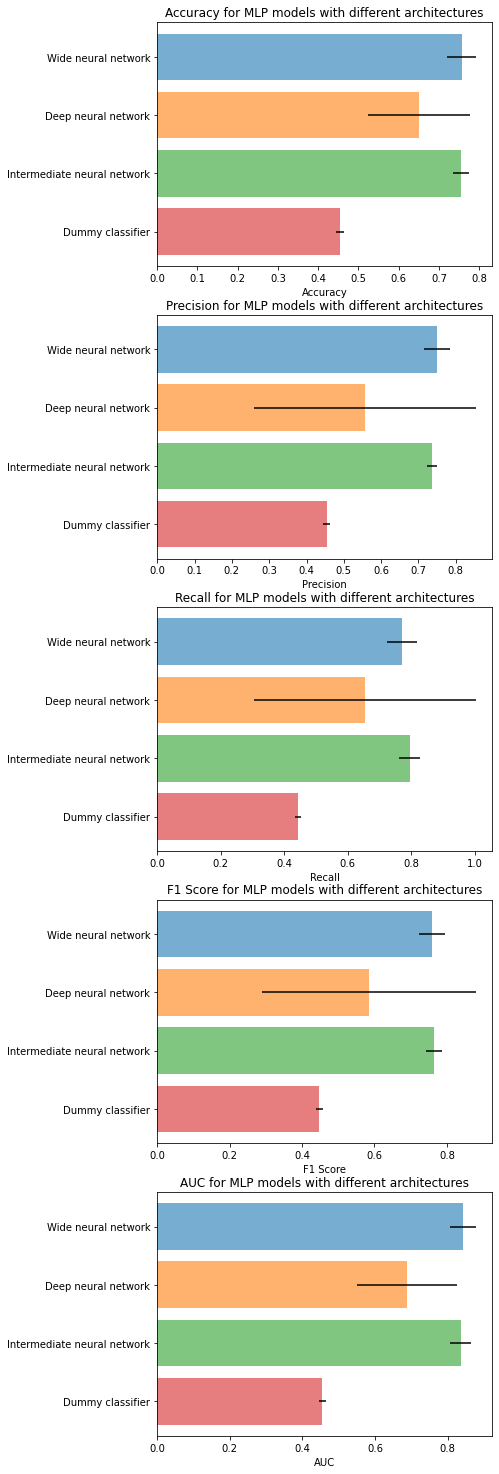

In [285]:
# Plot a bar graph to show the mean and standard deviation of the performance metrics of neural networks with different architectures
x_labels = ['Wide neural network',
            'Deep neural network',
            'Intermediate neural network',
            'Dummy classifier']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for MLP models with different architectures'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

Both cross-validated wide (containing one hidden layer with 9 neurons) and intermediate (containing two hidden layers each with 6 neurons) MLP models showed relatively high AUC score, accuracy, recall, precision and F1 score and low standard deviations. The intermediate MLP model showed more consistency in the predictions for the five validation folds than the wide MLP model, as reflected by the smaller standard deviations.

The cross-validated deep MLP model (containing four hidden layers each with 4 neurons) showed the lowest AUC score, accuracy, recall, precicion and F1 score and highest standard deviations amongst the MLP models, indicating the deep MLP model was overfitted.

The dummy classifier yielded the lowest AUC score, accuracy, recall, precision and F1 score and standard deviations.

I will use one or two hidden layers in my MLP model.

### Compare between neural networks consisting of one or two hidden layers and either 3, 6, 9 or 12 neurons in each hidden layer

Compare the performances of MLP models consisting of one or two hidden layers and either 3, 6, 9 or 12 neurons in each hidden layer in terms of accuracy, precision, recall, F1 score and AUC score.

In [1]:
# Code in this section is adapted based on https://towardsdatascience.com/
#   machine-learning-classifiers-comparison-with-python-33149aecdbca

In [287]:
# Define a neural network that has only one hidden layer 

# Set number of neurons in the hidden layer equal to 3
hidden_size = 3

class Wide3NetModule(nn.Module):
    def __init__(
            self,
            hidden_dim=hidden_size,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Wide3NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(X.shape[1], hidden_size)
        self.output = nn.Linear(hidden_size, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [288]:
# Define a neural network that has only one hidden layer 

# Set number of neurons in the hidden layer equal to 6
hidden_size = 6

class Wide6NetModule(nn.Module):
    def __init__(
            self,
            hidden_dim=hidden_size,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Wide6NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(X.shape[1], hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [289]:
# Define a neural network that has only one hidden layer

# Set number of neurons in the hidden layer equal to 9
hidden_size = 9

class Wide9NetModule(nn.Module):
    def __init__(
            self,
            hidden_dim=hidden_size,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Wide9NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(X.shape[1], hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [290]:
# Define a neural network that has only one hidden layer 

# Set number of neurons in the hidden layer equal to 12
hidden_size = 12

class Wide12NetModule(nn.Module):
    def __init__(
            self,
            hidden_dim=hidden_size,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Wide12NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(X.shape[1], hidden_dim)
        self.output = nn.Linear(hidden_dim, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [291]:
# Define a neural network that has only two hidden layers 

# Set number of neurons in each hidden layer equal to 3
hidden_sizeA = 3
hidden_sizeB = 3

class Intermediate3NetModule(nn.Module):
    def __init__(
            self,
            hidden_dimA=hidden_sizeA,
            hidden_dimB=hidden_sizeB,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Intermediate3NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hiddenA = nn.Linear(X.shape[1], hidden_sizeA)
        self.hiddenB = nn.Linear(hidden_sizeA, hidden_sizeB)
        self.output = nn.Linear(hidden_sizeB, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hiddenA(X))
        X = self.dropout(X)
        X = torch.relu(self.hiddenB(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [292]:
# Define a neural network that has only two hidden layers 

# Set number of neurons in each hidden layer equal to 6
hidden_sizeA = 6
hidden_sizeB = 6

class Intermediate6NetModule(nn.Module):
    def __init__(
            self,
            hidden_dimA=hidden_sizeA,
            hidden_dimB=hidden_sizeB,
            dropout = 0.2 # Apply mild dropout for regularization
    ):
        super(Intermediate6NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hiddenA = nn.Linear(X.shape[1], hidden_dimA)
        self.hiddenB = nn.Linear(hidden_dimA, hidden_dimB)
        self.output = nn.Linear(hidden_dimB, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hiddenA(X))
        X = self.dropout(X)
        X = torch.relu(self.hiddenB(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [293]:
# Define a neural network that has two hidden layers 

# Set number of neurons in each hidden layer equal to 9
hidden_sizeA = 9
hidden_sizeB = 9

class Intermediate9NetModule(nn.Module):
    def __init__(
            self,
            hidden_dimA=hidden_sizeA,
            hidden_dimB=hidden_sizeB,
            dropout=0.2 # Apply mild dropout for regularization
    ):
        super(Intermediate9NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hiddenA = nn.Linear(X.shape[1], hidden_dimA)
        self.hiddenB = nn.Linear(hidden_dimA, hidden_dimB)
        self.output = nn.Linear(hidden_dimB, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hiddenA(X))
        X = self.dropout(X)
        X = torch.relu(self.hiddenB(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X), dim=-1)
        return X

In [294]:
# Define a neural network that has two hidden layers 

# Set number of neurons in each hidden layer equal to 12
hidden_sizeA = 12
hidden_sizeB = 12

class Intermediate12NetModule(nn.Module):
    def __init__(
            self,
            hidden_dimA=hidden_sizeA,
            hidden_dimB=hidden_sizeB,
            dropout=0.2 # Apply mild dropout for regularization
    ):
        super(Intermediate12NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hiddenA = nn.Linear(X.shape[1], hidden_dimA)
        self.hiddenB = nn.Linear(hidden_dimA, hidden_dimB)
        self.output = nn.Linear(hidden_dimB, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hiddenA(X))
        X = self.dropout(X)
        X = torch.relu(self.hiddenB(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X


In [295]:
# Specify parameters for each neural network

# For reproducibility
torch.manual_seed(0)

wide3Net = NeuralNetClassifier(module=Wide3NetModule,
                                    lr = 0.1,
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 
                            
wide6Net = NeuralNetClassifier(module=Wide6NetModule, 
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD,
                                    batch_size = 32) 
                                
wide9Net = NeuralNetClassifier(module=Wide9NetModule,
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 

wide12Net = NeuralNetClassifier(module=Wide12NetModule,
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD,
                                    batch_size = 32) 

intermediate3Net = NeuralNetClassifier(module=Intermediate3NetModule, 
                                    lr = 0.1,
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True,
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 

intermediate6Net = NeuralNetClassifier(module=Intermediate6NetModule,
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 

intermediate9Net = NeuralNetClassifier(module=Intermediate9NetModule,
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 

intermediate12Net = NeuralNetClassifier(module=Intermediate12NetModule,
                                    lr = 0.1, 
                                    max_epochs=100, 
                                    callbacks=[EarlyStopping()], # To avoid overfitting
                                    device=device, # Set device to 'cpu'
                                    iterator_train__shuffle=True, 
                                    optimizer = torch.optim.SGD, 
                                    batch_size = 32) 


In [296]:
# Create function that performs cross-validation and evaluates each MLP model
def models_evaluation(X_train, y_train):
    
    # Perform cross-validation on each MLP model
    cv_wide3Net = cross_validate(wide3Net, X_train, y_train, cv=5, scoring=scoring)
    cv_wide6Net = cross_validate(wide6Net, X_train, y_train, cv=5, scoring=scoring)
    cv_wide9Net = cross_validate(wide9Net, X_train, y_train, cv=5, scoring=scoring)
    cv_wide12Net = cross_validate(wide12Net, X_train, y_train, cv=5, scoring=scoring)
    cv_intermediate3Net = cross_validate(intermediate3Net, X_train, y_train, cv=5, scoring=scoring)
    cv_intermediate6Net = cross_validate(intermediate6Net, X_train, y_train, cv=5, scoring=scoring)
    cv_intermediate9Net = cross_validate(intermediate9Net, X_train, y_train, cv=5, scoring=scoring)
    cv_intermediate12Net = cross_validate(intermediate12Net, X_train, y_train, cv=5, scoring=scoring)
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each classifier
    mean_scores_table = pd.DataFrame({'One hidden layer with 3 neurons':[cv_wide3Net['test_accuracy'].mean(),
                                                         cv_wide3Net['test_precision'].mean(),
                                                         cv_wide3Net['test_recall'].mean(),
                                                         cv_wide3Net['test_f1_score'].mean(),
                                                         cv_wide3Net['test_AUC'].mean()],
                                      'One hidden layer with 6 neurons':[cv_wide6Net['test_accuracy'].mean(),
                                                         cv_wide6Net['test_precision'].mean(),
                                                         cv_wide6Net['test_recall'].mean(),
                                                         cv_wide6Net['test_f1_score'].mean(),
                                                         cv_wide6Net['test_AUC'].mean()],
                                      'One hidden layer with 9 neurons':[cv_wide9Net['test_accuracy'].mean(),
                                                         cv_wide9Net['test_precision'].mean(),
                                                         cv_wide9Net['test_recall'].mean(),
                                                         cv_wide9Net['test_f1_score'].mean(),
                                                         cv_wide9Net['test_AUC'].mean()],
                                      'One hidden layer with 12 neurons':[cv_wide12Net['test_accuracy'].mean(),
                                                         cv_wide12Net['test_precision'].mean(),
                                                         cv_wide12Net['test_recall'].mean(),
                                                         cv_wide12Net['test_f1_score'].mean(),
                                                         cv_wide12Net['test_AUC'].mean()],
                                      'Two hidden layers each with 3 neurons':[cv_intermediate3Net['test_accuracy'].mean(),
                                                         cv_intermediate3Net['test_precision'].mean(),
                                                         cv_intermediate3Net['test_recall'].mean(),
                                                         cv_intermediate3Net['test_f1_score'].mean(),
                                                         cv_intermediate3Net['test_AUC'].mean()],
                                      'Two hidden layers each with 6 neurons':[cv_intermediate6Net['test_accuracy'].mean(),
                                                         cv_intermediate6Net['test_precision'].mean(),
                                                         cv_intermediate6Net['test_recall'].mean(),
                                                         cv_intermediate6Net['test_f1_score'].mean(),
                                                         cv_intermediate6Net['test_AUC'].mean()],
                                      'Two hidden layers each with 9 neurons':[cv_intermediate9Net['test_accuracy'].mean(),
                                                         cv_intermediate9Net['test_precision'].mean(),
                                                         cv_intermediate9Net['test_recall'].mean(),
                                                         cv_intermediate9Net['test_f1_score'].mean(),
                                                         cv_intermediate9Net['test_AUC'].mean()],
                                      'Two hidden layers each with 12 neurons':[cv_intermediate12Net['test_accuracy'].mean(),
                                                         cv_intermediate12Net['test_precision'].mean(),
                                                         cv_intermediate12Net['test_recall'].mean(),
                                                         cv_intermediate12Net['test_f1_score'].mean(),
                                                         cv_intermediate12Net['test_AUC'].mean()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each classifier
    std_scores_table = pd.DataFrame({'One hidden layer with 3 neurons':[cv_wide3Net['test_accuracy'].std(),
                                                         cv_wide3Net['test_precision'].std(),
                                                         cv_wide3Net['test_recall'].std(),
                                                         cv_wide3Net['test_f1_score'].std(),
                                                         cv_wide3Net['test_AUC'].std()],
                                    'One hidden layer with 6 neurons':[cv_wide6Net['test_accuracy'].std(),
                                                         cv_wide6Net['test_precision'].std(),
                                                         cv_wide6Net['test_recall'].std(),
                                                         cv_wide6Net['test_f1_score'].std(),
                                                         cv_wide6Net['test_AUC'].std()],
                                     'One hidden layer with 9 neurons':[cv_wide9Net['test_accuracy'].std(),
                                                         cv_wide9Net['test_precision'].std(),
                                                         cv_wide9Net['test_recall'].std(),
                                                         cv_wide9Net['test_f1_score'].std(),
                                                         cv_wide9Net['test_AUC'].std()],
                                     'One hidden layer with 12 neurons':[cv_wide12Net['test_accuracy'].std(),
                                                         cv_wide12Net['test_precision'].std(),
                                                         cv_wide12Net['test_recall'].std(),
                                                         cv_wide12Net['test_f1_score'].std(),
                                                         cv_wide12Net['test_AUC'].std()],
                                     'Two hidden layers each with 3 neurons':[cv_intermediate3Net['test_accuracy'].std(),
                                                         cv_intermediate3Net['test_precision'].std(),
                                                         cv_intermediate3Net['test_recall'].std(),
                                                         cv_intermediate3Net['test_f1_score'].std(),
                                                         cv_intermediate3Net['test_AUC'].std()],
                                     'Two hidden layers each with 6 neurons':[cv_intermediate6Net['test_accuracy'].std(),
                                                         cv_intermediate6Net['test_precision'].std(),
                                                         cv_intermediate6Net['test_recall'].std(),
                                                         cv_intermediate6Net['test_f1_score'].std(),
                                                         cv_intermediate6Net['test_AUC'].std()],
                                     'Two hidden layers each with 9 neurons':[cv_intermediate9Net['test_accuracy'].std(),
                                                         cv_intermediate9Net['test_precision'].std(),
                                                         cv_intermediate9Net['test_recall'].std(),
                                                         cv_intermediate9Net['test_f1_score'].std(),
                                                         cv_intermediate9Net['test_AUC'].std()],
                                     'Two hidden layers each with 12 neurons':[cv_intermediate12Net['test_accuracy'].std(),
                                                         cv_intermediate12Net['test_precision'].std(),
                                                         cv_intermediate12Net['test_recall'].std(),
                                                         cv_intermediate12Net['test_f1_score'].std(),
                                                         cv_intermediate12Net['test_AUC'].std()]},
                                     index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each classifier
    return mean_scores_table, std_scores_table
    
                                       
# Evaluate 5-fold cross-validated MLP models with either one or two hidden layers and either 3,6,9 or 12 neurons in each hidden layer
mean_scores_table, std_scores_table = models_evaluation(X_train_smote, y_train_smote)

# Display the mean cross-validation scores
print(mean_scores_table)

# Display the standard deviation of the cross-validation scores
print(std_scores_table)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6606       0.7344        0.5879  0.0192
      2        0.5915       0.7891        0.5116  0.0176
      3        0.5627       0.8125        0.4737  0.0182
      4        0.5460       0.8125        0.4531  0.0205
      5        0.5411       0.8125        0.4421  0.0237
      6        0.5277       0.7891        0.4371  0.0309
      7        0.5198       0.8125        0.4295  0.0211
      8        0.5229       0.8047        0.4247  0.0362
      9        0.5297       0.7969        0.4225  0.0207
     10        0.5280       0.7969        0.4226  0.0309
     11        0.5233       0.7891        0.4195  0.0299
     12        0.5184       0.8047        0.4205  0.0295
     13        0.5125       0.7969        0.4177  0.0301
     14        0.5079       0.7969        0.4133  0.0336
     15        0.5017       0.7891        0.4137  0.0254
     16        0.5055       0.7

      9        0.4880       0.7188        0.5416  0.0331
     10        0.4833       0.7188        0.5432  0.0684
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6924       0.6484        0.6419  0.0577
      2        0.6326       0.7109        0.5875  0.0583
      3        0.6160       0.7344        0.5526  0.0258
      4        0.5996       0.7891        0.5272  0.0308
      5        0.5675       0.7969        0.5016  0.0308
      6        0.5648       0.8125        0.4831  0.0292
      7        0.5496       0.8047        0.4668  0.0294
      8        0.5504       0.8047        0.4566  0.0295
      9        0.5371       0.8047        0.4445  0.0233
     10        0.5376       0.8203        0.4351  0.0280
     11        0.5479       0.8281        0.4314  0.0280
     12        0.5324       0.8125        0.4257  0.0258
     13        0.5306  

      4        0.5881       0.7422        0.5260  0.0303
      5        0.5894       0.7422        0.5106  0.0254
      6        0.5850       0.7734        0.4955  0.0260
      7        0.5694       0.7891        0.4844  0.0267
      8        0.5591       0.7812        0.4737  0.0236
      9        0.5578       0.7969        0.4642  0.0269
     10        0.5554       0.8125        0.4557  0.0199
     11        0.5509       0.8047        0.4457  0.0243
     12        0.5548       0.8125        0.4393  0.0461
     13        0.5412       0.8047        0.4367  0.0552
     14        0.5371       0.7969        0.4370  0.0658
     15        0.5286       0.8125        0.4337  0.0273
     16        0.5263       0.8125        0.4293  0.0388
     17        0.5195       0.8125        0.4261  0.0246
     18        0.5186       0.8047        0.4227  0.0256
     19        0.5043       0.7969        0.4155  0.0226
     20        0.5258       0.7969        0.4174  0.0215
     21        0.5174       0.8

     19        0.4859       0.7109        0.5583  0.0479
     20        0.4709       0.7031        0.5532  0.0322
     21        0.4763       0.7109        0.5546  0.0361
     22        0.4698       0.7109        0.5562  0.0691
     23        0.4589       0.7031        0.5560  0.1002
     24        0.4605       0.7109        0.5547  0.0550
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6661       0.6250        0.6403  0.0158
      2        0.5920       0.6719        0.5936  0.0184
      3        0.5503       0.6953        0.5624  0.0280
      4        0.5150       0.7031        0.5453  0.0250
      5        0.4993       0.7031        0.5353  0.0251
      6        0.4770       0.6953        0.5299  0.0239
      7        0.4715       0.7109        0.5252  0.0239
      8        0.4634       0.7031        0.5247  0.0217
      9        0.4607  

      6        0.5232       0.7109        0.5594  0.0192
      7        0.5175       0.7109        0.5569  0.0261
      8        0.4995       0.7031        0.5568  0.0298
      9        0.4904       0.7109        0.5548  0.0238
     10        0.5091       0.7031        0.5498  0.0270
     11        0.4970       0.7031        0.5488  0.0207
     12        0.4966       0.6875        0.5491  0.0256
     13        0.4946       0.6875        0.5478  0.0237
     14        0.4942       0.7031        0.5470  0.0230
     15        0.5088       0.7031        0.5463  0.0262
     16        0.4725       0.7031        0.5465  0.0396
     17        0.4768       0.6953        0.5442  0.0366
     18        0.4929       0.7031        0.5420  0.0248
     19        0.4836       0.6875        0.5412  0.0253
     20        0.4777       0.7031        0.5398  0.0249
     21        0.4596       0.7031        0.5366  0.0262
     22        0.4808       0.7031        0.5351  0.0204
     23        0.4772       0.7

     18        0.5077       0.7188        0.5228  0.0288
     19        0.5278       0.7422        0.5259  0.0276
     20        0.4956       0.7109        0.5243  0.0248
     21        0.5013       0.7188        0.5274  0.0288
     22        0.4930       0.7031        0.5315  0.0293
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6653       0.7109        0.6323  0.0218
      2        0.6210       0.7344        0.5940  0.0301
      3        0.5959       0.7422        0.5693  0.0320
      4        0.5630       0.7266        0.5543  0.0330
      5        0.5501       0.7188        0.5503  0.0302
      6        0.5295       0.7344        0.5484  0.0284
      7        0.5200       0.7344        0.5488  0.0288
      8        0.5204       0.7266        0.5476  0.0285
      9        0.5121       0.7188        0.5466  0.0270
     10        0.4963  

      8        0.5758       0.7188        0.5617  0.0214
      9        0.5591       0.7031        0.5593  0.0228
     10        0.5462       0.7109        0.5571  0.0268
     11        0.5424       0.7188        0.5548  0.0206
     12        0.5303       0.7188        0.5518  0.0205
     13        0.5267       0.7266        0.5515  0.0228
     14        0.5364       0.7109        0.5505  0.0277
     15        0.5253       0.7109        0.5494  0.0212
     16        0.5152       0.7031        0.5509  0.0202
     17        0.5368       0.7109        0.5473  0.0205
     18        0.5321       0.7109        0.5456  0.0258
     19        0.5380       0.7031        0.5440  0.0209
     20        0.5201       0.7109        0.5435  0.0200
     21        0.5168       0.7266        0.5385  0.0199
     22        0.5002       0.7109        0.5429  0.0206
     23        0.5084       0.7266        0.5434  0.0201
     24        0.5032       0.7266        0.5424  0.0201
     25        0.5312       0.7

      4        0.6126       0.6953        0.6024  0.0218
      5        0.5948       0.6797        0.5856  0.0272
      6        0.5916       0.6875        0.5740  0.0233
      7        0.5729       0.6875        0.5632  0.0224
      8        0.5614       0.6875        0.5544  0.0244
      9        0.5724       0.7266        0.5497  0.0258
     10        0.5447       0.6875        0.5440  0.0275
     11        0.5363       0.6797        0.5416  0.0206
     12        0.5455       0.7344        0.5387  0.0271
     13        0.5488       0.6797        0.5420  0.0236
     14        0.5405       0.7109        0.5389  0.0252
     15        0.5376       0.7109        0.5357  0.0332
     16        0.5387       0.7031        0.5354  0.0231
     17        0.5344       0.7031        0.5350  0.0253
     18        0.5281       0.7109        0.5340  0.0223
     19        0.5250       0.7031        0.5361  0.0239
     20        0.5095       0.6953        0.5403  0.0246
     21        0.5215       0.7

     28        0.4790       0.8125        0.3979  0.0251
     29        0.4921       0.8047        0.3992  0.0466
     30        0.4931       0.8125        0.3985  0.0273
     31        0.4741       0.8203        0.3981  0.0283
     32        0.4678       0.8203        0.3935  0.0287
     33        0.4845       0.8203        0.3903  0.0267
     34        0.4864       0.8203        0.3978  0.0320
     35        0.4978       0.8125        0.3982  0.0300
     36        0.4888       0.8203        0.3946  0.0384
     37        0.4892       0.8203        0.3952  0.0469
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6602       0.6406        0.6378  0.0313
      2        0.6288       0.7188        0.6030  0.0397
      3        0.5944       0.7188        0.5764  0.0340
      4        0.5880       0.7188        0.5620  0.0260
      5        0.5734  

     19        0.4678       0.7188        0.5251  0.0251
     20        0.4571       0.7109        0.5220  0.0223
     21        0.4651       0.7266        0.5266  0.0335
     22        0.4725       0.7109        0.5203  0.0238
     23        0.4597       0.7188        0.5191  0.0249
     24        0.4673       0.7109        0.5181  0.0215
     25        0.4342       0.7109        0.5198  0.0244
     26        0.4446       0.7109        0.5202  0.0248
     27        0.4211       0.7188        0.5310  0.0221
     28        0.4292       0.7188        0.5279  0.0241
Stopping since valid_loss has not improved in the last 5 epochs.
           One hidden layer with 3 neurons  One hidden layer with 6 neurons  \
Accuracy                          0.762500                         0.751250   
Precision                         0.756547                         0.745801   
Recall                            0.772500                         0.762500   
F1 Score                          0.763907       

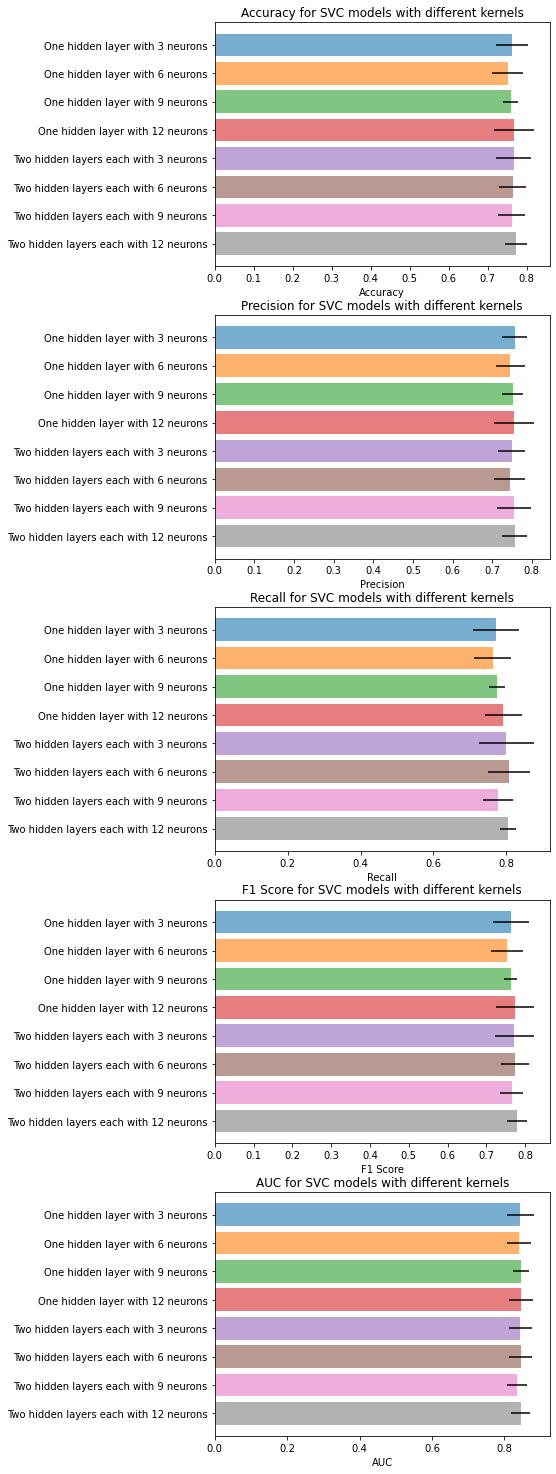

In [297]:
# Plot a bar graph to show the mean and standard deviation of the performance metrics of the MLP models
x_labels = ['One hidden layer with 3 neurons',
            'One hidden layer with 6 neurons',
            'One hidden layer with 9 neurons',
            'One hidden layer with 12 neurons',
            'Two hidden layers each with 3 neurons',
            'Two hidden layers each with 6 neurons',
            'Two hidden layers each with 9 neurons',
            'Two hidden layers each with 12 neurons']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for SVC models with different kernels'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()


There were small differences in AUC score, accuracy, precision, recall and F1 score between models with one or two hidden layers and either 3, 6, 9 or 12 neurons in each hidden layer. It is better to find the optimal number of neurons along with optimal values of other hyperparameters using Randomized Search.

### Perform Randomized Search on MLP models with one hidden layer

Perform Randomized Search on combinations of the following hyperparameters for the 5-fold cross-validated MLP model with a single hidden layer.
- number of neurons 'num_units': seven options, 3, 4, 5, 6, 7, 8 or 9.
- optimizer momentum 'optimizer__momentum': four options, 0.1, 0.3, 0.6 or 0.9.
- learning rate 'lr': three options, 1, 0.1 or 0.01.
- dropout 'module__dropout': three options, 0.0, 0.2 or 0.5.
- batch size 'batch_size': three options, 16, 32 or 64.

In [298]:
# Define a neural network with a single hidden layer
class NetModule(nn.Module):
    def __init__(
            self,
            num_units=3,
            dropout = 0.5
    ):
        super(NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.hidden = nn.Linear(X.shape[1],num_units)
        self.output = nn.Linear(num_units, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.hidden(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [299]:
# Set the parameters for the neural network

# For reproducibility
torch.manual_seed(0)

searchNet = NeuralNetClassifier(module=NetModule, 
                    max_epochs=100,
                    callbacks=[EarlyStopping()],
                    device=device,
                    iterator_train__shuffle=True,# Shuffle training data on each epoch
                    batch_size = 32)

In [300]:
# Perform Randomized Search on the neuron network with one hidden layer

# Start timer
tic = time()

# Define the search values of the hyperparameters
tuned_parameters = [{'module__num_units':[3,4,5,6,7,8,9],
                    'optimizer__momentum':[0.1,0.3,0.6,0.9],
                    'lr':[1,0.1,0.01],
                    'module__dropout':[0.0,0.2,0.5],
                    'batch_size':[16,32,64]}]

# Print the accuracy, precision, recall, F1 score and AUC score for each set of hyperparameters
for score in ['accuracy','precision','recall','f1','roc_auc']:
 print("# Tuning hyper-parameters for %s" %score)
 print()
 classifier = RandomizedSearchCV(searchNet, tuned_parameters, scoring=score, cv=5)
 classifier.fit(X_train_smote, y_train_smote)

 print("Best parameters found:")
 print()
 print(classifier.best_params_)
 print()
 print("Randomized search scores on training set:")
 print()
 means = classifier.cv_results_['mean_test_score']
 stds = classifier.cv_results_['std_test_score']
 for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
 print()

# Print time required in seconds for the search
toc = time()
print('Time taken in seconds: %.2f'%(toc-tic))

# Tuning hyper-parameters for accuracy

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6421       0.7422        0.5361  0.0178
      2        0.5637       0.7656        0.4721  0.0192
      3        0.5341       0.7578        0.4421  0.0177
      4        0.5181       0.7734        0.4237  0.0183
      5        0.5116       0.7969        0.4207  0.0318
      6        0.5034       0.7891        0.4156  0.0214
      7        0.4981       0.7812        0.4197  0.0316
      8        0.4953       0.8047        0.4095  0.0259
      9        0.4886       0.8203        0.4016  0.0266
     10        0.4841       0.8125        0.4089  0.0357
     11        0.4857       0.8047        0.3957  0.0199
     12        0.4819       0.8047        0.3978  0.0254
     13        0.4770       0.8125        0.3916  0.0328
     14        0.4760       0.7969        0.3909  0.0338
     15        0.4719       0.7891        0.3965

     27        0.5137       0.8281        0.4133  0.0630
     28        0.5134       0.8125        0.4117  0.0268
     29        0.5063       0.8281        0.4103  0.0386
     30        0.5094       0.8281        0.4085  0.0312
     31        0.5143       0.8203        0.4089  0.0251
     32        0.4961       0.8125        0.4087  0.0303
     33        0.4955       0.8125        0.4066  0.0286
     34        0.4900       0.8125        0.4036  0.0426
     35        0.4884       0.8125        0.4017  0.0555
     36        0.4878       0.8125        0.4001  0.0359
     37        0.4878       0.8203        0.3986  0.0163
     38        0.5133       0.8203        0.4001  0.0353
     39        0.4910       0.8203        0.3993  0.0288
     40        0.4919       0.8203        0.3972  0.0314
     41        0.4930       0.8125        0.3953  0.0212
     42        0.5071       0.8125        0.3965  0.0148
     43        0.4812       0.8203        0.3950  0.0155
     44        0.4947       0.8

     12        0.5263       0.7422        0.5394  0.0138
     13        0.5228       0.7422        0.5365  0.0133
     14        0.5106       0.7500        0.5345  0.0159
     15        0.4975       0.7422        0.5344  0.0138
     16        0.5115       0.7500        0.5328  0.0148
     17        0.5064       0.7422        0.5316  0.0224
     18        0.4910       0.7188        0.5322  0.0157
     19        0.5027       0.7344        0.5303  0.0212
     20        0.5000       0.7266        0.5296  0.0133
     21        0.4957       0.7188        0.5299  0.0128
     22        0.4984       0.7266        0.5283  0.0205
     23        0.5019       0.7188        0.5276  0.0170
     24        0.4846       0.7109        0.5282  0.0221
     25        0.4943       0.7188        0.5287  0.0413
     26        0.4969       0.7188        0.5279  0.0255
     27        0.4852       0.7188        0.5268  0.0311
     28        0.4982       0.7188        0.5265  0.0316
     29        0.4863       0.7

     27        0.5466       0.6719        0.5441  0.0176
     28        0.5360       0.6719        0.5420  0.0183
     29        0.5334       0.6719        0.5418  0.0177
     30        0.5375       0.6719        0.5413  0.0227
     31        0.5517       0.6719        0.5387  0.0231
     32        0.5356       0.6797        0.5376  0.0256
     33        0.5311       0.6797        0.5362  0.0144
     34        0.5210       0.6797        0.5362  0.0190
     35        0.5383       0.6797        0.5348  0.0298
     36        0.5283       0.6875        0.5337  0.0145
     37        0.5414       0.6875        0.5340  0.0227
     38        0.5289       0.6797        0.5345  0.0211
     39        0.5186       0.6797        0.5349  0.0246
     40        0.5439       0.6875        0.5338  0.0256
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6881  

      2        0.6448       0.7656        0.5738  0.0409
      3        0.5977       0.7500        0.5595  0.0171
      4        0.5906       0.7422        0.5523  0.0306
      5        0.5630       0.7344        0.5432  0.0317
      6        0.5483       0.7344        0.5371  0.0402
      7        0.5386       0.7422        0.5351  0.0174
      8        0.5424       0.7266        0.5302  0.0213
      9        0.5462       0.7266        0.5278  0.0301
     10        0.5294       0.7266        0.5238  0.0150
     11        0.5262       0.7266        0.5206  0.0366
     12        0.5272       0.7266        0.5209  0.0159
     13        0.5276       0.7266        0.5207  0.0254
     14        0.5174       0.7031        0.5201  0.0152
     15        0.5285       0.7344        0.5187  0.0292
     16        0.5255       0.7266        0.5190  0.0160
     17        0.5305       0.7266        0.5186  0.0241
     18        0.5171       0.7266        0.5178  0.0133
     19        0.4964       0.7

      3        0.6552       0.7031        0.6196  0.0448
      4        0.6051       0.7188        0.5680  0.0407
      5        0.5730       0.7266        0.5385  0.0359
      6        0.5632       0.7188        0.5280  0.0399
      7        0.5412       0.7344        0.5218  0.0346
      8        0.5129       0.7266        0.5179  0.0384
      9        0.5210       0.7266        0.5168  0.0359
     10        0.5282       0.7188        0.5186  0.0333
     11        0.5248       0.7344        0.5209  0.0419
     12        0.4936       0.7109        0.5251  0.0327
     13        0.5032       0.7188        0.5260  0.0386
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6467       0.7188        0.6158  0.0319
      2        0.5730       0.7031        0.5548  0.0329
      3        0.5423       0.7266        0.5336  0.0414
      4        0.5223  

     18        0.4921       0.7500        0.5125  0.0307
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6416       0.6641        0.6205  0.0293
      2        0.5879       0.7031        0.5853  0.0206
      3        0.5678       0.7109        0.5649  0.0279
      4        0.5374       0.7188        0.5515  0.0338
      5        0.5225       0.7188        0.5449  0.0259
      6        0.5087       0.7266        0.5427  0.0220
      7        0.5036       0.7031        0.5407  0.0540
      8        0.5005       0.7188        0.5396  0.0253
      9        0.4855       0.7188        0.5405  0.0350
     10        0.4923       0.7109        0.5396  0.0252
     11        0.5033       0.7031        0.5393  0.0318
     12        0.4892       0.7188        0.5411  0.0171
     13        0.5039       0.7109        0.5388  0.0230
     14        0.4954  

     24        0.5591       0.7500        0.5318  0.0223
     25        0.5556       0.7500        0.5267  0.0272
     26        0.5525       0.7500        0.5219  0.0286
     27        0.5495       0.7578        0.5173  0.0270
     28        0.5466       0.7578        0.5129  0.0570
     29        0.5439       0.7578        0.5088  0.0910
     30        0.5412       0.7578        0.5048  0.0795
     31        0.5388       0.7734        0.5011  0.0366
     32        0.5366       0.7734        0.4975  0.0297
     33        0.5345       0.7734        0.4940  0.0939
     34        0.5328       0.7734        0.4907  0.0508
     35        0.5309       0.7734        0.4876  0.0255
     36        0.5291       0.7734        0.4845  0.0275
     37        0.5275       0.7812        0.4816  0.0277
     38        0.5260       0.7812        0.4788  0.0254
     39        0.5248       0.7812        0.4761  0.0260
     40        0.5234       0.7812        0.4736  0.0295
     41        0.5222       0.7

     30        0.5997       0.6953        0.5942  0.0269
     31        0.5965       0.7109        0.5919  0.0318
     32        0.5932       0.7109        0.5896  0.0528
     33        0.5901       0.7109        0.5873  0.0705
     34        0.5868       0.7109        0.5852  0.1303
     35        0.5835       0.7109        0.5831  0.0771
     36        0.5804       0.7109        0.5810  0.0352
     37        0.5772       0.7031        0.5789  0.0715
     38        0.5742       0.7266        0.5770  0.0385
     39        0.5713       0.7266        0.5751  0.0287
     40        0.5685       0.7266        0.5733  0.0293
     41        0.5655       0.7266        0.5715  0.0299
     42        0.5627       0.7266        0.5698  0.0363
     43        0.5599       0.7266        0.5683  0.0412
     44        0.5572       0.7266        0.5667  0.0546
     45        0.5545       0.7344        0.5652  0.0406
     46        0.5521       0.7344        0.5638  0.0590
     47        0.5496       0.7

     36        0.5241       0.7266        0.5474  0.0222
     37        0.5221       0.7266        0.5463  0.0292
     38        0.5201       0.7344        0.5453  0.0214
     39        0.5184       0.7422        0.5443  0.0275
     40        0.5165       0.7422        0.5433  0.0594
     41        0.5149       0.7422        0.5424  0.0267
     42        0.5132       0.7422        0.5415  0.0456
     43        0.5118       0.7422        0.5407  0.0281
     44        0.5103       0.7422        0.5399  0.0202
     45        0.5090       0.7500        0.5392  0.0469
     46        0.5077       0.7422        0.5385  0.0356
     47        0.5064       0.7422        0.5379  0.0382
     48        0.5052       0.7344        0.5372  0.0200
     49        0.5041       0.7422        0.5367  0.0356
     50        0.5029       0.7422        0.5361  0.0359
     51        0.5019       0.7422        0.5356  0.0195
     52        0.5008       0.7344        0.5351  0.0267
     53        0.4998       0.7

     43        0.5074       0.7422        0.5320  0.0204
     44        0.5059       0.7422        0.5310  0.0228
     45        0.5042       0.7422        0.5299  0.0214
     46        0.5027       0.7422        0.5291  0.0219
     47        0.5015       0.7422        0.5283  0.0400
     48        0.5001       0.7422        0.5276  0.0210
     49        0.4989       0.7422        0.5270  0.0249
     50        0.4977       0.7422        0.5264  0.0261
     51        0.4965       0.7422        0.5259  0.0236
     52        0.4955       0.7422        0.5255  0.0241
     53        0.4945       0.7422        0.5251  0.0222
     54        0.4935       0.7500        0.5248  0.0215
     55        0.4926       0.7500        0.5245  0.0330
     56        0.4917       0.7500        0.5242  0.0216
     57        0.4909       0.7500        0.5240  0.0242
     58        0.4901       0.7500        0.5237  0.0298
     59        0.4894       0.7500        0.5236  0.0253
     60        0.4886       0.7

      4        0.5388       0.6875        0.5906  0.0453
      5        0.5228       0.6875        0.5798  0.0529
      6        0.5135       0.6875        0.5726  0.0453
      7        0.5050       0.6719        0.5693  0.0528
      8        0.4998       0.6719        0.5617  0.0483
      9        0.4927       0.6875        0.5553  0.0593
     10        0.4889       0.6797        0.5507  0.0439
     11        0.4865       0.6953        0.5448  0.0386
     12        0.4833       0.6875        0.5426  0.0321
     13        0.4803       0.6875        0.5378  0.0406
     14        0.4797       0.6953        0.5372  0.0322
     15        0.4799       0.6953        0.5332  0.0395
     16        0.4772       0.6953        0.5311  0.0567
     17        0.4743       0.7109        0.5266  0.0380
     18        0.4720       0.7188        0.5251  0.0320
     19        0.4689       0.7188        0.5209  0.0371
     20        0.4658       0.7266        0.5187  0.0318
     21        0.4644       0.7

      3        0.5275       0.7500        0.5357  0.0158
      4        0.5109       0.7344        0.5120  0.0650
      5        0.4936       0.7266        0.5060  0.0180
      6        0.4793       0.7266        0.5086  0.0164
      7        0.4822       0.7188        0.5153  0.0307
      8        0.4720       0.6875        0.5233  0.0223
      9        0.4635       0.6953        0.5169  0.0222
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6679       0.6562        0.6307  0.0128
      2        0.5830       0.7031        0.5555  0.0163
      3        0.5134       0.7031        0.5419  0.0251
      4        0.4860       0.6953        0.5531  0.0176
      5        0.4670       0.7109        0.5501  0.0162
      6        0.4717       0.7266        0.5298  0.0160
      7        0.4705       0.6875        0.5366  0.0252
      8        0.4394  

      9        0.5333       0.7578        0.4312  0.0289
     10        0.5170       0.7578        0.4317  0.0272
     11        0.5078       0.7656        0.4271  0.0372
     12        0.5132       0.7734        0.4224  0.0441
     13        0.5186       0.7656        0.4300  0.0308
     14        0.5121       0.7656        0.4242  0.0265
     15        0.5040       0.7656        0.4211  0.0228
     16        0.5139       0.7656        0.4155  0.0290
     17        0.5098       0.7734        0.4183  0.0343
     18        0.5035       0.7734        0.4083  0.0321
     19        0.5166       0.7812        0.4135  0.0254
     20        0.5099       0.7812        0.4175  0.0268
     21        0.4891       0.7969        0.4090  0.0263
     22        0.5115       0.7812        0.4124  0.0229
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6873  

      7        0.4520       0.7344        0.4998  0.0211
      8        0.4414       0.7500        0.5102  0.0230
      9        0.4485       0.7344        0.5089  0.0224
     10        0.4407       0.7188        0.5049  0.0287
     11        0.4377       0.7422        0.4937  0.0257
     12        0.4278       0.7344        0.4905  0.0277
     13        0.4309       0.7188        0.4951  0.0282
     14        0.4224       0.7344        0.4805  0.0271
     15        0.4278       0.7031        0.4892  0.0214
     16        0.4218       0.7188        0.5014  0.0269
     17        0.4253       0.7109        0.4996  0.0250
     18        0.4240       0.7031        0.5482  0.0241
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6457       0.6953        0.5949  0.0174
      2        0.5146       0.6953        0.6149  0.0198
      3        0.5076  

      8        0.5008       0.7812        0.4019  0.0157
      9        0.4772       0.8203        0.3816  0.0233
     10        0.4907       0.7812        0.4173  0.0224
     11        0.4975       0.8281        0.3709  0.0193
     12        0.4818       0.8203        0.3958  0.0241
     13        0.4865       0.7969        0.3962  0.0133
     14        0.5089       0.7969        0.3795  0.0189
     15        0.4502       0.7969        0.3922  0.0152
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5942       0.7500        0.5927  0.0212
      2        0.5271       0.7344        0.5244  0.0160
      3        0.5306       0.7109        0.5121  0.0178
      4        0.5441       0.7109        0.5207  0.0311
      5        0.5076       0.7344        0.5325  0.0182
      6        0.5025       0.7422        0.5180  0.0224
      7        0.4716  

     61        0.5674       0.7734        0.4747  0.0339
     62        0.5422       0.7734        0.4735  0.0293
     63        0.5535       0.7734        0.4725  0.0321
     64        0.5460       0.7734        0.4717  0.0269
     65        0.5597       0.7734        0.4712  0.0242
     66        0.5509       0.7656        0.4703  0.0289
     67        0.5679       0.7656        0.4697  0.0257
     68        0.5578       0.7656        0.4690  0.0211
     69        0.5490       0.7578        0.4683  0.0286
     70        0.5440       0.7656        0.4675  0.0200
     71        0.5585       0.7656        0.4669  0.0227
     72        0.5440       0.7578        0.4660  0.0411
     73        0.5558       0.7578        0.4654  0.0216
     74        0.5577       0.7500        0.4651  0.0304
     75        0.5633       0.7500        0.4648  0.0292
     76        0.5351       0.7656        0.4636  0.0234
     77        0.5575       0.7656        0.4632  0.0271
     78        0.5506       0.7

     75        0.5615       0.6953        0.5603  0.0261
     76        0.5547       0.6953        0.5598  0.0279
     77        0.5383       0.6953        0.5589  0.0233
     78        0.5501       0.6953        0.5582  0.0226
     79        0.5427       0.6953        0.5576  0.0265
     80        0.5354       0.6953        0.5569  0.0192
     81        0.5448       0.7031        0.5564  0.0217
     82        0.5443       0.7031        0.5557  0.0203
     83        0.5335       0.7031        0.5551  0.0225
     84        0.5465       0.7031        0.5545  0.0216
     85        0.5489       0.7031        0.5540  0.0214
     86        0.5350       0.7031        0.5533  0.0262
     87        0.5339       0.7031        0.5526  0.0367
     88        0.5468       0.7031        0.5520  0.0256
     89        0.5339       0.7031        0.5514  0.0230
     90        0.5434       0.7031        0.5509  0.0339
     91        0.5663       0.7031        0.5507  0.0234
     92        0.5553       0.7

     24        0.6479       0.6562        0.6569  0.0221
     25        0.6465       0.6562        0.6538  0.0208
     26        0.6429       0.6562        0.6505  0.0229
     27        0.6374       0.6562        0.6470  0.0202
     28        0.6344       0.6562        0.6436  0.0220
     29        0.6314       0.6562        0.6402  0.0271
     30        0.6285       0.6562        0.6367  0.0274
     31        0.6194       0.6562        0.6332  0.0303
     32        0.6157       0.6562        0.6295  0.0257
     33        0.6125       0.6562        0.6259  0.0265
     34        0.6039       0.6641        0.6223  0.0336
     35        0.6055       0.6641        0.6189  0.0235
     36        0.6128       0.6641        0.6160  0.0246
     37        0.5998       0.6562        0.6127  0.0237
     38        0.5941       0.6562        0.6094  0.0235
     39        0.5860       0.6562        0.6062  0.0269
     40        0.5879       0.6641        0.6033  0.0194
     41        0.5858       0.6

     43        0.5509       0.6797        0.5872  0.0249
     44        0.5556       0.6719        0.5844  0.0390
     45        0.5485       0.6719        0.5817  0.0279
     46        0.5437       0.6719        0.5792  0.0265
     47        0.5497       0.6719        0.5771  0.0303
     48        0.5299       0.6797        0.5749  0.0309
     49        0.5252       0.6797        0.5727  0.0254
     50        0.5213       0.6797        0.5710  0.0249
     51        0.5211       0.6875        0.5689  0.0366
     52        0.5120       0.6875        0.5672  0.0200
     53        0.5405       0.6875        0.5658  0.0323
     54        0.5193       0.6875        0.5645  0.0279
     55        0.5199       0.6875        0.5633  0.0252
     56        0.5247       0.6875        0.5620  0.0241
     57        0.5229       0.6875        0.5610  0.0375
     58        0.5253       0.6875        0.5601  0.0290
     59        0.5190       0.6875        0.5594  0.0246
     60        0.5220       0.6

      2        0.6974       0.5391        0.6912  0.0484
      3        0.6839       0.5625        0.6837  0.0365
      4        0.6802       0.5625        0.6773  0.0332
      5        0.6747       0.5781        0.6715  0.0372
      6        0.6581       0.6094        0.6652  0.0341
      7        0.6579       0.6250        0.6601  0.0319
      8        0.6540       0.6484        0.6548  0.0320
      9        0.6572       0.6484        0.6508  0.0332
     10        0.6399       0.6641        0.6451  0.0352
     11        0.6560       0.7031        0.6412  0.0319
     12        0.6382       0.7031        0.6356  0.0310
     13        0.6349       0.7031        0.6310  0.0384
     14        0.6479       0.6953        0.6272  0.0468
     15        0.6349       0.6953        0.6224  0.0329
     16        0.6414       0.6953        0.6181  0.0624
     17        0.6231       0.7031        0.6127  0.0339
     18        0.6196       0.7031        0.6083  0.0360
     19        0.6143       0.6

     17        0.6247       0.6562        0.6287  0.0399
     18        0.6266       0.6641        0.6229  0.0420
     19        0.6165       0.6875        0.6183  0.0430
     20        0.6313       0.6953        0.6134  0.0366
     21        0.6199       0.7031        0.6083  0.0506
     22        0.6215       0.7031        0.6039  0.0462
     23        0.6094       0.7109        0.5991  0.0479
     24        0.5988       0.7266        0.5944  0.0389
     25        0.5974       0.7031        0.5897  0.0384
     26        0.5900       0.7109        0.5836  0.0367
     27        0.5854       0.7031        0.5799  0.0349
     28        0.5858       0.7109        0.5768  0.0376
     29        0.5813       0.7109        0.5721  0.0373
     30        0.5854       0.7109        0.5683  0.0371
     31        0.5898       0.7188        0.5646  0.1639
     32        0.6022       0.7109        0.5625  0.0860
     33        0.5857       0.7188        0.5605  0.0381
     34        0.5961       0.7

     64        0.5213       0.6797        0.5469  0.0384
     65        0.5481       0.6719        0.5472  0.0468
     66        0.5393       0.6797        0.5464  0.0368
     67        0.5560       0.6797        0.5463  0.0341
     68        0.5325       0.6797        0.5460  0.0392
     69        0.5516       0.6797        0.5442  0.0395
     70        0.5731       0.6797        0.5443  0.0373
     71        0.5532       0.6797        0.5441  0.0498
     72        0.5493       0.6797        0.5433  0.0510
     73        0.5575       0.6797        0.5434  0.0580
     74        0.5804       0.6797        0.5442  0.0491
     75        0.5679       0.6797        0.5440  0.0416
     76        0.5602       0.6797        0.5442  0.0343
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7319       0.5000        0.6833  0.0322
      2        0.6923  

      4        0.5090       0.6797        0.6122  0.0635
      5        0.4895       0.6953        0.5499  0.0323
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5675       0.7109        0.5842  0.0291
      2        0.5368       0.6875        0.5480  0.0325
      3        0.5394       0.6797        0.5746  0.0375
      4        0.5404       0.7500        0.5269  0.0444
      5        0.5136       0.6797        0.6014  0.0336
      6        0.5078       0.7266        0.5642  0.0453
      7        0.5077       0.7266        0.5366  0.0581
      8        0.4931       0.7422        0.5543  0.0601
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5452       0.6406        0.6084  0.0460
      2        

     78        0.5003       0.7656        0.4286  0.0474
     79        0.4999       0.7734        0.4279  0.0300
     80        0.4995       0.7734        0.4272  0.0263
     81        0.4990       0.7734        0.4266  0.0262
     82        0.4988       0.7734        0.4259  0.0220
     83        0.4983       0.7734        0.4253  0.0210
     84        0.4980       0.7812        0.4247  0.0420
     85        0.4976       0.7812        0.4242  0.0398
     86        0.4972       0.7891        0.4235  0.0403
     87        0.4968       0.7891        0.4230  0.0286
     88        0.4967       0.7891        0.4224  0.0197
     89        0.4964       0.7891        0.4219  0.0259
     90        0.4960       0.7891        0.4214  0.0372
     91        0.4957       0.7891        0.4210  0.0370
     92        0.4955       0.7891        0.4205  0.0299
     93        0.4954       0.7891        0.4200  0.0286
     94        0.4948       0.7891        0.4196  0.0199
     95        0.4947       0.7

     85        0.4835       0.7266        0.5269  0.0305
     86        0.4831       0.7344        0.5269  0.0208
     87        0.4826       0.7344        0.5269  0.0258
     88        0.4823       0.7344        0.5270  0.0291
     89        0.4819       0.7344        0.5270  0.0249
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6499       0.6328        0.6532  0.0229
      2        0.6445       0.6328        0.6489  0.0405
      3        0.6392       0.6328        0.6446  0.0279
      4        0.6339       0.6250        0.6403  0.0244
      5        0.6282       0.6406        0.6358  0.0290
      6        0.6225       0.6328        0.6313  0.0265
      7        0.6168       0.6328        0.6268  0.0504
      8        0.6110       0.6328        0.6222  0.0462
      9        0.6053       0.6406        0.6175  0.0456
     10        0.5996  

Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7424       0.5000        0.7522  0.0176
      2        0.7309       0.5000        0.7413  0.0225
      3        0.7207       0.4922        0.7317  0.0239
      4        0.7118       0.4922        0.7234  0.0235
      5        0.7039       0.5000        0.7159  0.0231
      6        0.6964       0.5156        0.7090  0.0228
      7        0.6896       0.5156        0.7025  0.0221
      8        0.6830       0.5156        0.6963  0.0231
      9        0.6766       0.5312        0.6905  0.0222
     10        0.6703       0.5469        0.6848  0.0250
     11        0.6642       0.5469        0.6793  0.0275
     12        0.6582       0.5625        0.6738  0.0229
     13        0.6521       0.5938        0.6682  0.0251
     14        0.6459       0.6328        0.6626  0.0244
     15        0.6396  

      4        0.6813       0.6328        0.8107  0.0330
      5        0.6425       0.6484        0.7615  0.0238
      6        0.6686       0.5000        1.5960  0.0208
      7        0.7612       0.6641        1.9013  0.0212
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7815       0.4375        0.7698  0.0321
      2        0.7713       0.7344        0.7541  0.0344
      3        0.9248       0.5000        0.8948  0.0303
      4        0.7779       0.7344        0.6371  0.0312
      5        0.6600       0.7422        0.6963  0.0317
      6        0.7882       0.7578        0.6837  0.0327
      7        1.0419       0.5000        1.2747  0.0323
      8        1.0217       0.5938        0.8991  0.0352
      9        0.7148       0.6484        0.5804  0.0327
     10        0.7907       0.5078        0.5910  0.0314
     11        0.8820  

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      5        1.4179       0.6797        1.9141  0.0433
      6        1.4106       0.5469        2.3567  0.0308
      7        2.0151       0.6406        1.4956  0.0330
      8        1.5991       0.5781        1.2570  0.0381
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6674       0.7250        0.5278  0.0219
      2        0.5173       0.7188        0.5116  0.0281
      3        0.4824       0.6875        0.5284  0.0275
      4        0.4793       0.7312        0.4959  0.0239
      5        0.4761       0.7375        0.5334  0.0268
      6        0.4752       0.7500        0.5031  0.0284
      7        0.4595       0.7125        0.5244  0.0261
      8        0.4536       0.7375        0.5041  0.0245
Stopping since valid_loss has not improved in the last 5 epochs.
Best parameters found:

{'optimizer__momentum': 0.9, 'module__num_units'

      2        0.6005       0.7109        0.5752  0.0387
      3        0.5777       0.7188        0.5509  0.0350
      4        0.5603       0.7266        0.5309  0.0349
      5        0.5466       0.7266        0.5141  0.0347
      6        0.5356       0.7422        0.5006  0.0379
      7        0.5279       0.7422        0.4898  0.0365
      8        0.5212       0.7344        0.4805  0.0332
      9        0.5160       0.7344        0.4724  0.0347
     10        0.5115       0.7344        0.4651  0.0401
     11        0.5081       0.7422        0.4594  0.0343
     12        0.5052       0.7578        0.4532  0.0377
     13        0.5025       0.7656        0.4487  0.0427
     14        0.5005       0.7812        0.4450  0.0411
     15        0.4982       0.7812        0.4409  0.0312
     16        0.4965       0.7969        0.4369  0.0331
     17        0.4947       0.7969        0.4346  0.0356
     18        0.4929       0.8047        0.4312  0.0352
     19        0.4916       0.8

     45        0.4845       0.6953        0.5364  0.0311
     46        0.4842       0.6953        0.5356  0.0337
     47        0.4827       0.6953        0.5353  0.0307
     48        0.4828       0.6953        0.5345  0.0334
     49        0.4818       0.6875        0.5335  0.0312
     50        0.4810       0.6953        0.5331  0.0302
     51        0.4816       0.6875        0.5329  0.0323
     52        0.4805       0.6953        0.5322  0.0301
     53        0.4799       0.6953        0.5318  0.0303
     54        0.4811       0.6953        0.5322  0.0316
     55        0.4795       0.6875        0.5310  0.0323
     56        0.4789       0.6875        0.5302  0.0308
     57        0.4792       0.6953        0.5298  0.0304
     58        0.4788       0.6875        0.5297  0.0310
     59        0.4785       0.6875        0.5302  0.0322
     60        0.4781       0.6953        0.5300  0.0308
     61        0.4779       0.6953        0.5292  0.0297
     62        0.4775       0.6

      3        0.6104       0.6641        0.6202  0.0323
      4        0.5826       0.6797        0.5983  0.0317
      5        0.5582       0.7109        0.5805  0.0348
      6        0.5378       0.7109        0.5680  0.0333
      7        0.5224       0.7031        0.5594  0.0322
      8        0.5111       0.6875        0.5545  0.0333
      9        0.5028       0.6953        0.5517  0.0319
     10        0.4961       0.6953        0.5496  0.0303
     11        0.4902       0.6953        0.5486  0.0318
     12        0.4849       0.6953        0.5475  0.0331
     13        0.4806       0.6953        0.5465  0.0323
     14        0.4770       0.7031        0.5461  0.0304
     15        0.4737       0.7031        0.5460  0.0298
     16        0.4706       0.6953        0.5451  0.0312
     17        0.4679       0.6953        0.5452  0.0323
     18        0.4663       0.7031        0.5454  0.0334
     19        0.4640       0.7109        0.5454  0.0301
     20        0.4624       0.7

      2        0.4959       0.7188        0.5200  0.0166
      3        0.4862       0.7344        0.5127  0.0130
      4        0.4774       0.7109        0.5239  0.0170
      5        0.4723       0.6797        0.5215  0.0148
      6        0.4817       0.6953        0.5455  0.0215
      7        0.4748       0.7266        0.5321  0.0184
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5855       0.7578        0.5290  0.0111
      2        0.4780       0.7188        0.5400  0.0163
      3        0.4563       0.7031        0.5634  0.0142
      4        0.4629       0.7109        0.5403  0.0135
      5        0.4556       0.6953        0.5531  0.0198
      6        0.4599       0.7266        0.5266  0.0237
      7        0.4559       0.7344        0.5463  0.0131
      8        0.4713       0.7422        0.5370  0.0134
      9        0.4528  

     97        0.5893       0.7656        0.5153  0.0142
     98        0.6045       0.7656        0.5149  0.0209
     99        0.5956       0.7656        0.5142  0.0149
    100        0.5764       0.7656        0.5133  0.0164
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7020       0.4688        0.7011  0.0147
      2        0.6985       0.4688        0.7004  0.0132
      3        0.7005       0.4688        0.6998  0.0251
      4        0.6965       0.4688        0.6992  0.0170
      5        0.6969       0.4609        0.6986  0.0146
      6        0.6983       0.4609        0.6982  0.0149
      7        0.6994       0.4688        0.6976  0.0147
      8        0.6982       0.4609        0.6971  0.0189
      9        0.6950       0.4609        0.6967  0.0288
     10        0.6956       0.4844        0.6962  0.0223
     11        0.6945       0.5000        0.6959  0.0171
     12        0.6976       0.5

     10        0.6859       0.5000        0.6786  0.0153
     11        0.6786       0.5000        0.6758  0.0193
     12        0.6801       0.5000        0.6732  0.0136
     13        0.6766       0.5000        0.6707  0.0202
     14        0.6587       0.5000        0.6678  0.0187
     15        0.6671       0.5000        0.6652  0.0148
     16        0.6613       0.5000        0.6627  0.0173
     17        0.6612       0.5000        0.6602  0.0175
     18        0.6658       0.5000        0.6579  0.0148
     19        0.6567       0.5000        0.6556  0.0191
     20        0.6553       0.5000        0.6531  0.0156
     21        0.6590       0.5000        0.6510  0.0152
     22        0.6603       0.5938        0.6491  0.0193
     23        0.6497       0.6094        0.6469  0.0159
     24        0.6454       0.6094        0.6446  0.0147
     25        0.6512       0.6094        0.6426  0.0193
     26        0.6503       0.6094        0.6408  0.0180
     27        0.6487       0.6

     25        0.6546       0.6875        0.6337  0.0136
     26        0.6376       0.6875        0.6327  0.0131
     27        0.6367       0.6875        0.6318  0.0148
     28        0.6342       0.6875        0.6308  0.0175
     29        0.6288       0.6875        0.6298  0.0150
     30        0.6468       0.6953        0.6291  0.0169
     31        0.6320       0.6953        0.6283  0.0147
     32        0.6468       0.6875        0.6277  0.0195
     33        0.6230       0.6875        0.6267  0.0183
     34        0.6323       0.6875        0.6259  0.0251
     35        0.6429       0.6719        0.6253  0.0230
     36        0.6322       0.6719        0.6246  0.0141
     37        0.6118       0.6797        0.6235  0.0166
     38        0.6355       0.6797        0.6229  0.0207
     39        0.6387       0.6797        0.6225  0.0158
     40        0.6335       0.6719        0.6219  0.0153
     41        0.6149       0.6797        0.6210  0.0187
     42        0.6189       0.6

     43        0.6328       0.6562        0.6459  0.0153
     44        0.6430       0.6562        0.6446  0.0152
     45        0.6523       0.6719        0.6435  0.0215
     46        0.6396       0.6719        0.6420  0.0193
     47        0.6303       0.6641        0.6405  0.0135
     48        0.6218       0.6719        0.6387  0.0175
     49        0.6481       0.6719        0.6378  0.0175
     50        0.6399       0.6719        0.6366  0.0153
     51        0.6330       0.6641        0.6351  0.0154
     52        0.6271       0.6641        0.6336  0.0151
     53        0.6318       0.6641        0.6324  0.0169
     54        0.6347       0.6641        0.6313  0.0171
     55        0.6387       0.6641        0.6300  0.0213
     56        0.6268       0.6641        0.6286  0.0179
     57        0.6337       0.6641        0.6273  0.0128
     58        0.6110       0.6641        0.6256  0.0156
     59        0.6285       0.6562        0.6245  0.0183
     60        0.6305       0.6

     60        0.4618       0.8203        0.3840  0.0573
     61        0.4578       0.8203        0.3829  0.0535
     62        0.4697       0.8203        0.3828  0.0565
     63        0.4843       0.8203        0.3828  0.0652
     64        0.4806       0.8125        0.3820  0.0374
     65        0.4715       0.8125        0.3811  0.0557
     66        0.4800       0.8125        0.3808  0.0664
     67        0.4962       0.8125        0.3817  0.0596
     68        0.4817       0.8125        0.3817  0.0604
     69        0.4771       0.8125        0.3814  0.0837
     70        0.4574       0.8125        0.3807  0.0509
     71        0.4703       0.8125        0.3807  0.0573
     72        0.4753       0.8125        0.3802  0.0593
     73        0.4793       0.8125        0.3800  0.0439
     74        0.4701       0.8125        0.3788  0.0368
     75        0.4703       0.8203        0.3794  0.0354
     76        0.4617       0.8125        0.3793  0.0427
     77        0.4618       0.8

      2        0.6249       0.7734        0.5281  0.0139
      3        0.5889       0.7578        0.4926  0.0138
      4        0.5699       0.7812        0.4786  0.0143
      5        0.5711       0.7734        0.5264  0.0144
      6        0.5863       0.7969        0.4728  0.0193
      7        0.5669       0.7812        0.4516  0.0285
      8        0.5733       0.7969        0.4700  0.0165
      9        0.5535       0.7578        0.4582  0.0299
     10        0.5675       0.7891        0.4668  0.0205
     11        0.5584       0.7734        0.4376  0.0216
     12        0.5537       0.7969        0.4492  0.0226
     13        0.5488       0.7891        0.4342  0.0146
     14        0.5771       0.7812        0.4409  0.0159
     15        0.5448       0.7891        0.4294  0.0242
     16        0.5356       0.7891        0.4210  0.0260
     17        0.5586       0.7812        0.4611  0.0255
     18        0.5430       0.7891        0.4456  0.0178
     19        0.5687       0.7

      2        0.6024       0.6797        0.6064  0.0464
      3        0.5328       0.7344        0.5456  0.0398
      4        0.5424       0.7266        0.5837  0.0344
      5        0.5123       0.7266        0.5939  0.0391
      6        0.5547       0.5000        0.8505  0.0388
      7        0.5209       0.6875        0.7339  0.0340
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5978       0.6719        0.6633  0.0337
      2        0.5359       0.7656        0.5490  0.0398
      3        0.5307       0.5703        0.7007  0.0463
      4        0.5247       0.6953        0.5538  0.0437
      5        0.5472       0.6406        0.6471  0.0372
      6        0.5260       0.7422        0.5632  0.0421
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------

      9        0.5204       0.7266        0.5293  0.0172
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6315       0.7344        0.5469  0.0147
      2        0.5607       0.7266        0.5336  0.0196
      3        0.5322       0.7266        0.5274  0.0195
      4        0.5218       0.6797        0.5471  0.0180
      5        0.5182       0.7188        0.5145  0.0141
      6        0.5236       0.7031        0.5196  0.0170
      7        0.5179       0.7031        0.5295  0.0174
      8        0.5020       0.6875        0.5175  0.0248
      9        0.5235       0.7266        0.5229  0.0172
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6518       0.7109        0.5441  0.0128
      2        

     10        0.4664       0.7578        0.5684  0.0369
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6272       0.7969        0.4472  0.0245
      2        0.5330       0.8047        0.4338  0.0237
      3        0.5217       0.7734        0.4425  0.0285
      4        0.4967       0.8047        0.4029  0.0261
      5        0.4835       0.8203        0.4123  0.0238
      6        0.5064       0.8281        0.3988  0.0213
      7        0.4865       0.8359        0.4135  0.0328
      8        0.4946       0.8047        0.4088  0.0390
      9        0.4928       0.8203        0.4018  0.0287
     10        0.4899       0.8125        0.3951  0.0245
     11        0.4875       0.8281        0.3948  0.0240
     12        0.5177       0.8203        0.4017  0.0416
     13        0.4866       0.8125        0.3963  0.0247
     14        0.4885  

      8        0.5840       0.7422        0.5435  0.0436
      9        0.5828       0.6641        0.5602  0.0363
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6701       0.7109        0.6304  0.0311
      2        0.6297       0.6797        0.5865  0.0349
      3        0.6147       0.6797        0.5613  0.0362
      4        0.6093       0.6953        0.5560  0.0328
      5        0.6099       0.6719        0.5542  0.0426
      6        0.5908       0.7422        0.5548  0.0385
      7        0.5947       0.7344        0.5488  0.0377
      8        0.5877       0.7500        0.5437  0.0365
      9        0.5842       0.7344        0.5334  0.0414
     10        0.5881       0.7500        0.5411  0.0351
     11        0.5856       0.7344        0.5426  0.0398
     12        0.5974       0.7188        0.5461  0.0334
     13        0.5720  

     23        0.6265       0.7266        0.5801  0.0291
     24        0.6115       0.7266        0.5755  0.0242
     25        0.6145       0.7344        0.5713  0.0295
     26        0.6005       0.7344        0.5670  0.0209
     27        0.5996       0.7344        0.5631  0.0232
     28        0.6066       0.7344        0.5592  0.0358
     29        0.5972       0.7344        0.5554  0.0339
     30        0.5942       0.7422        0.5517  0.0201
     31        0.5992       0.7422        0.5481  0.0229
     32        0.5884       0.7422        0.5448  0.0418
     33        0.6045       0.7422        0.5419  0.0242
     34        0.5892       0.7422        0.5387  0.0534
     35        0.5898       0.7422        0.5358  0.0276
     36        0.5986       0.7344        0.5331  0.0272
     37        0.5765       0.7422        0.5302  0.0284
     38        0.5672       0.7500        0.5272  0.0323
     39        0.5777       0.7500        0.5245  0.0246
     40        0.5712       0.7

     39        0.5703       0.7266        0.5460  0.0282
     40        0.5691       0.7266        0.5454  0.0247
     41        0.5483       0.7266        0.5444  0.0262
     42        0.5646       0.7344        0.5438  0.0270
     43        0.5541       0.7344        0.5432  0.0273
     44        0.5592       0.7344        0.5427  0.0270
     45        0.5658       0.7344        0.5421  0.0277
     46        0.5568       0.7344        0.5415  0.0272
     47        0.5556       0.7344        0.5411  0.0287
     48        0.5489       0.7344        0.5407  0.0236
     49        0.5616       0.7344        0.5403  0.0298
     50        0.5331       0.7344        0.5396  0.0314
     51        0.5451       0.7344        0.5391  0.0276
     52        0.5401       0.7266        0.5387  0.0247
     53        0.5380       0.7266        0.5382  0.0277
     54        0.5514       0.7266        0.5379  0.0219
     55        0.5500       0.7266        0.5376  0.0234
     56        0.5589       0.7

     60        0.5297       0.7031        0.5367  0.0248
     61        0.5351       0.7031        0.5362  0.0240
     62        0.5313       0.7109        0.5357  0.0254
     63        0.5184       0.7109        0.5351  0.0228
     64        0.5309       0.7109        0.5346  0.0233
     65        0.5246       0.7109        0.5340  0.0248
     66        0.5371       0.7031        0.5338  0.0260
     67        0.5285       0.7031        0.5335  0.0250
     68        0.5406       0.7031        0.5331  0.0252
     69        0.5412       0.6953        0.5327  0.0278
     70        0.5289       0.6953        0.5323  0.0288
     71        0.5356       0.6953        0.5320  0.0232
     72        0.5342       0.6953        0.5317  0.0232
     73        0.5168       0.6953        0.5315  0.0287
     74        0.5411       0.6953        0.5313  0.0312
     75        0.5270       0.6953        0.5310  0.0224
     76        0.5188       0.6953        0.5309  0.0289
     77        0.5332       0.6

     76        0.5268       0.7188        0.5459  0.0444
     77        0.5185       0.7188        0.5457  0.0274
     78        0.5134       0.7188        0.5456  0.0235
     79        0.5237       0.7188        0.5456  0.0258
     80        0.4996       0.7188        0.5450  0.0354
     81        0.5181       0.7188        0.5451  0.0198
     82        0.4994       0.7188        0.5449  0.0425
     83        0.5206       0.7188        0.5446  0.0219
     84        0.5043       0.7188        0.5442  0.0247
     85        0.5198       0.7188        0.5440  0.0426
     86        0.5159       0.7188        0.5439  0.0190
     87        0.5010       0.7188        0.5438  0.0215
     88        0.5033       0.7188        0.5435  0.0291
     89        0.5090       0.7188        0.5434  0.0246
     90        0.5023       0.7188        0.5432  0.0216
     91        0.5066       0.7188        0.5430  0.0211
     92        0.4944       0.7188        0.5429  0.0226
     93        0.5003       0.7

     90        0.4916       0.7266        0.5272  0.0435
     91        0.5004       0.7266        0.5271  0.0232
     92        0.4971       0.7266        0.5269  0.0312
     93        0.4850       0.7266        0.5267  0.0248
     94        0.4885       0.7266        0.5264  0.0293
     95        0.4819       0.7266        0.5263  0.0281
     96        0.4832       0.7266        0.5265  0.0292
     97        0.4978       0.7266        0.5262  0.0252
     98        0.4975       0.7266        0.5261  0.0325
     99        0.5160       0.7266        0.5260  0.0240
    100        0.4786       0.7188        0.5265  0.0272
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6134       0.7656        0.5332  0.0352
      2        0.5663       0.7891        0.4873  0.0356
      3        0.5632       0.7812        0.4629  0.0425
      4        0.5503       0.7969        0.4463  0.0356
      5        0.5432       0.8

     26        0.5644       0.7656        0.4798  0.0150
     27        0.5636       0.7812        0.4750  0.0218
     28        0.5753       0.7812        0.4721  0.0149
     29        0.5728       0.7891        0.4684  0.0184
     30        0.5720       0.7734        0.4660  0.0201
     31        0.5634       0.7812        0.4650  0.0181
     32        0.5569       0.7891        0.4635  0.0334
     33        0.5683       0.7812        0.4620  0.0227
     34        0.5643       0.7891        0.4608  0.0264
     35        0.5639       0.7891        0.4593  0.0203
     36        0.5721       0.7812        0.4583  0.0188
     37        0.5647       0.7734        0.4577  0.0333
     38        0.5461       0.7734        0.4559  0.0214
     39        0.5453       0.7734        0.4527  0.0190
     40        0.5451       0.7734        0.4498  0.0171
     41        0.5458       0.7734        0.4468  0.0420
     42        0.5451       0.7734        0.4458  0.0223
     43        0.5618       0.7

     29        0.5300       0.6953        0.5388  0.0279
     30        0.5507       0.7031        0.5379  0.0152
     31        0.5195       0.6953        0.5377  0.0211
     32        0.5450       0.7109        0.5372  0.0180
     33        0.5195       0.7109        0.5366  0.0258
     34        0.5323       0.7031        0.5362  0.0155
     35        0.5236       0.7031        0.5355  0.0156
     36        0.5232       0.7031        0.5357  0.0278
     37        0.5095       0.7031        0.5351  0.0217
     38        0.5404       0.7031        0.5344  0.0325
     39        0.5220       0.7031        0.5349  0.0319
     40        0.5062       0.7031        0.5347  0.0280
     41        0.5326       0.7109        0.5346  0.0238
     42        0.5273       0.7109        0.5344  0.0154
     43        0.5404       0.7109        0.5332  0.0229
     44        0.5250       0.6953        0.5337  0.0181
     45        0.5286       0.7031        0.5345  0.0165
     46        0.5314       0.7

     24        0.5213       0.8047        0.4180  0.0505
     25        0.5283       0.8047        0.4169  0.0391
     26        0.5159       0.8047        0.4150  0.0378
     27        0.5186       0.8047        0.4143  0.0413
     28        0.5185       0.8047        0.4134  0.0364
     29        0.5194       0.8125        0.4132  0.0363
     30        0.5184       0.8047        0.4110  0.0368
     31        0.5213       0.8047        0.4113  0.0460
     32        0.5315       0.8125        0.4119  0.0358
     33        0.5014       0.8047        0.4092  0.0376
     34        0.5177       0.8125        0.4100  0.0373
     35        0.5144       0.8203        0.4074  0.0361
     36        0.5369       0.8203        0.4091  0.0333
     37        0.5167       0.8125        0.4096  0.0345
     38        0.5082       0.8203        0.4084  0.0476
     39        0.5154       0.8203        0.4080  0.0326
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss  

     36        0.5010       0.7109        0.5369  0.0403
     37        0.4929       0.7031        0.5373  0.0338
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6705       0.5547        0.6566  0.0395
      2        0.6387       0.7109        0.6298  0.0423
      3        0.6117       0.7266        0.6084  0.0333
      4        0.5929       0.7344        0.5900  0.0352
      5        0.5690       0.7031        0.5743  0.0406
      6        0.5555       0.6953        0.5638  0.0347
      7        0.5432       0.7109        0.5553  0.0392
      8        0.5285       0.7109        0.5498  0.0338
      9        0.5288       0.7188        0.5465  0.0350
     10        0.5167       0.7188        0.5432  0.0408
     11        0.4964       0.7188        0.5408  0.0345
     12        0.5030       0.7266        0.5389  0.0410
     13        0.4922  

     17        0.6048       0.8125        0.5466  0.0316
     18        0.6212       0.8125        0.5415  0.0274
     19        0.6080       0.8203        0.5358  0.0300
     20        0.6042       0.8203        0.5304  0.0273
     21        0.5990       0.8047        0.5245  0.0288
     22        0.6009       0.8047        0.5208  0.0266
     23        0.5974       0.8047        0.5161  0.0279
     24        0.5883       0.8047        0.5103  0.0306
     25        0.5874       0.8125        0.5060  0.0285
     26        0.5633       0.8281        0.5006  0.0257
     27        0.5703       0.8203        0.4967  0.0270
     28        0.5862       0.8203        0.4947  0.0271
     29        0.6018       0.8125        0.4923  0.0229
     30        0.5674       0.8203        0.4878  0.0295
     31        0.5825       0.8125        0.4863  0.0235
     32        0.5986       0.8125        0.4852  0.1822
     33        0.5969       0.8125        0.4844  0.0771
     34        0.5849       0.8

     87        0.5703       0.6875        0.5538  0.0357
     88        0.5580       0.6797        0.5535  0.0433
     89        0.5542       0.6797        0.5518  0.0465
     90        0.5611       0.6797        0.5508  0.0396
     91        0.5607       0.6797        0.5487  0.0418
     92        0.5570       0.6797        0.5476  0.0404
     93        0.5726       0.6797        0.5471  0.0283
     94        0.5704       0.6797        0.5470  0.0257
     95        0.5694       0.6797        0.5459  0.0233
     96        0.5506       0.6797        0.5456  0.0297
     97        0.5496       0.6797        0.5459  0.0398
     98        0.5623       0.6875        0.5444  0.0449
     99        0.5552       0.6875        0.5438  0.0304
    100        0.5443       0.6875        0.5422  0.0290
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7741       0.5000        0.7361  0.0311
      2        0.7425       0.5

     35        0.5868       0.7188        0.5809  0.0207
     36        0.6001       0.7266        0.5798  0.0306
     37        0.5735       0.7188        0.5776  0.0236
     38        0.5909       0.7109        0.5762  0.0319
     39        0.5715       0.7109        0.5743  0.0648
     40        0.5726       0.7109        0.5722  0.0416
     41        0.5642       0.6953        0.5708  0.0427
     42        0.5788       0.6953        0.5701  0.0266
     43        0.5810       0.6953        0.5683  0.0316
     44        0.5831       0.6875        0.5669  0.0227
     45        0.5834       0.6797        0.5656  0.0249
     46        0.5630       0.6797        0.5639  0.0262
     47        0.5586       0.6797        0.5629  0.0267
     48        0.5664       0.6797        0.5621  0.0276
     49        0.5828       0.6797        0.5609  0.0296
     50        0.5583       0.6797        0.5599  0.0335
     51        0.5557       0.6719        0.5582  0.0217
     52        0.5527       0.6

     53        0.5273       0.7422        0.5309  0.0382
     54        0.5457       0.7422        0.5310  0.0445
     55        0.5275       0.7422        0.5307  0.0452
     56        0.5405       0.7422        0.5303  0.0470
     57        0.5431       0.7422        0.5301  0.0340
     58        0.5290       0.7422        0.5297  0.0706
     59        0.5314       0.7422        0.5296  0.0588
     60        0.5278       0.7422        0.5295  0.0362
     61        0.5353       0.7422        0.5299  0.0499
     62        0.5329       0.7422        0.5294  0.0581
     63        0.5512       0.7422        0.5295  0.0407
     64        0.5523       0.7422        0.5287  0.0462
     65        0.5578       0.7422        0.5282  0.0548
     66        0.5328       0.7344        0.5291  0.0351
     67        0.5303       0.7422        0.5285  0.0606
     68        0.5206       0.7344        0.5289  0.0558
     69        0.5100       0.7266        0.5288  0.0464
Stopping since valid_loss has n

     58        0.4577       0.6875        0.5390  0.0318
     59        0.4575       0.6797        0.5373  0.0350
     60        0.4565       0.6797        0.5370  0.0314
     61        0.4556       0.6797        0.5375  0.0356
     62        0.4554       0.6719        0.5372  0.0350
     63        0.4552       0.6719        0.5369  0.0299
     64        0.4551       0.6719        0.5385  0.0726
     65        0.4549       0.6719        0.5372  0.0430
     66        0.4544       0.6719        0.5375  0.0434
     67        0.4550       0.6797        0.5377  0.0338
     68        0.4549       0.6641        0.5364  0.0400
     69        0.4560       0.6641        0.5393  0.0491
     70        0.4559       0.6797        0.5380  0.0614
     71        0.4540       0.6719        0.5382  0.0415
     72        0.4544       0.6641        0.5388  0.0364
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  

      6        0.5636       0.7031        0.5685  0.0671
      7        0.5638       0.7344        0.5896  0.0495
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7010       0.4375        0.7062  0.0663
      2        0.6895       0.4453        0.6992  0.0186
      3        0.6862       0.4375        0.6932  0.0408
      4        0.6831       0.4688        0.6871  0.0220
      5        0.6788       0.4922        0.6817  0.0175
      6        0.6694       0.4844        0.6765  0.0178
      7        0.6719       0.4844        0.6717  0.0399
      8        0.6637       0.5078        0.6672  0.0195
      9        0.6595       0.5469        0.6632  0.0472
     10        0.6533       0.5469        0.6593  0.0273
     11        0.6560       0.5703        0.6557  0.0260
     12        0.6568       0.5859        0.6521  0.0191
     13        0.6493  

     10        0.6956       0.4766        0.6849  0.0233
     11        0.6884       0.5391        0.6784  0.0161
     12        0.6813       0.6094        0.6728  0.0373
     13        0.6795       0.6484        0.6674  0.0320
     14        0.6746       0.7031        0.6619  0.0209
     15        0.6697       0.6797        0.6565  0.0236
     16        0.6639       0.7031        0.6514  0.0165
     17        0.6623       0.6953        0.6468  0.0259
     18        0.6556       0.6875        0.6423  0.0275
     19        0.6546       0.6875        0.6378  0.0275
     20        0.6449       0.6797        0.6335  0.0323
     21        0.6445       0.6797        0.6293  0.0267
     22        0.6350       0.6875        0.6250  0.0214
     23        0.6269       0.6953        0.6205  0.0145
     24        0.6292       0.7031        0.6165  0.0245
     25        0.6268       0.7031        0.6128  0.0159
     26        0.6155       0.7109        0.6089  0.0257
     27        0.6200       0.7

     24        0.5711       0.7109        0.5888  0.0182
     25        0.5739       0.7188        0.5874  0.0232
     26        0.5755       0.7188        0.5861  0.0195
     27        0.5769       0.7188        0.5848  0.0381
     28        0.5661       0.7188        0.5835  0.0160
     29        0.5638       0.7188        0.5821  0.0168
     30        0.5732       0.7188        0.5810  0.0320
     31        0.5710       0.7188        0.5800  0.0182
     32        0.5673       0.7188        0.5790  0.0183
     33        0.5645       0.7188        0.5780  0.0186
     34        0.5548       0.7188        0.5770  0.0311
     35        0.5571       0.7188        0.5761  0.0267
     36        0.5633       0.7188        0.5752  0.0314
     37        0.5703       0.7188        0.5744  0.0208
     38        0.5613       0.7188        0.5737  0.0257
     39        0.5540       0.7188        0.5729  0.0237
     40        0.5629       0.7188        0.5722  0.0296
     41        0.5550       0.7

     39        0.5523       0.7188        0.5675  0.0235
     40        0.5731       0.7109        0.5662  0.0159
     41        0.5541       0.7109        0.5649  0.0162
     42        0.5567       0.7109        0.5635  0.0160
     43        0.5598       0.7188        0.5625  0.0162
     44        0.5566       0.7188        0.5613  0.0161
     45        0.5451       0.7109        0.5601  0.0172
     46        0.5570       0.7109        0.5590  0.0168
     47        0.5389       0.7109        0.5579  0.0159
     48        0.5493       0.7109        0.5570  0.0167
     49        0.5399       0.7109        0.5559  0.0175
     50        0.5428       0.7188        0.5550  0.0154
     51        0.5469       0.7188        0.5541  0.0143
     52        0.5325       0.7188        0.5531  0.0163
     53        0.5456       0.7188        0.5523  0.0161
     54        0.5334       0.7188        0.5514  0.0146
     55        0.5305       0.7188        0.5506  0.0164
     56        0.5432       0.7

     53        0.5283       0.6953        0.5731  0.0163
     54        0.5350       0.6953        0.5716  0.0158
     55        0.5320       0.6953        0.5703  0.0389
     56        0.5316       0.7031        0.5689  0.0162
     57        0.5270       0.7031        0.5676  0.0152
     58        0.5315       0.7031        0.5664  0.0162
     59        0.5279       0.7031        0.5652  0.0280
     60        0.5365       0.7031        0.5642  0.0177
     61        0.5156       0.7031        0.5631  0.0295
     62        0.5269       0.7031        0.5621  0.0159
     63        0.5103       0.6953        0.5610  0.0152
     64        0.5163       0.6953        0.5600  0.0389
     65        0.5377       0.6953        0.5590  0.0155
     66        0.5190       0.6953        0.5582  0.0334
     67        0.5173       0.7031        0.5574  0.0192
     68        0.5086       0.7031        0.5565  0.0298
     69        0.5237       0.7031        0.5557  0.0222
     70        0.5281       0.7

     67        0.5285       0.7422        0.4756  0.0256
     68        0.5329       0.7422        0.4737  0.0432
     69        0.5241       0.7422        0.4718  0.0239
     70        0.5255       0.7422        0.4701  0.0363
     71        0.5299       0.7422        0.4687  0.1076
     72        0.5264       0.7422        0.4671  0.0685
     73        0.5248       0.7422        0.4653  0.0602
     74        0.5252       0.7422        0.4637  0.0603
     75        0.5192       0.7422        0.4620  0.0525
     76        0.5135       0.7422        0.4606  0.0312
     77        0.5273       0.7422        0.4591  0.0758
     78        0.5212       0.7422        0.4575  0.0740
     79        0.5324       0.7500        0.4565  0.0418
     80        0.5240       0.7422        0.4553  0.0272
     81        0.5156       0.7422        0.4537  0.0292
     82        0.5238       0.7422        0.4526  0.0556
     83        0.5082       0.7422        0.4516  0.0308
     84        0.5057       0.7

     84        0.4981       0.6953        0.5285  0.0595
     85        0.5008       0.6953        0.5285  0.0455
     86        0.5014       0.6953        0.5284  0.0446
     87        0.5036       0.6953        0.5282  0.0817
     88        0.5028       0.6953        0.5281  0.0406
     89        0.5014       0.6953        0.5282  0.0482
     90        0.4937       0.6953        0.5281  0.0358
     91        0.5016       0.6953        0.5280  0.0383
     92        0.4966       0.6953        0.5279  0.0288
     93        0.5131       0.6953        0.5278  0.0295
     94        0.4849       0.6953        0.5280  0.0322
     95        0.4931       0.6953        0.5279  0.0464
     96        0.4964       0.6953        0.5280  0.0407
     97        0.4970       0.6875        0.5281  0.0621
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6531  

      2        0.7243       0.5000        0.7071  0.0545
      3        0.7018       0.5000        0.6933  0.0586
      4        0.6935       0.5000        0.6828  0.1038
      5        0.6792       0.5078        0.6738  0.0668
      6        0.6715       0.5156        0.6664  0.0540
      7        0.6622       0.5469        0.6601  0.0414
      8        0.6547       0.5859        0.6542  0.0293
      9        0.6557       0.6016        0.6491  0.0327
     10        0.6493       0.6328        0.6442  0.0305
     11        0.6366       0.6641        0.6395  0.0288
     12        0.6385       0.6719        0.6352  0.0292
     13        0.6270       0.6875        0.6305  0.0331
     14        0.6253       0.6953        0.6261  0.0275
     15        0.6187       0.7109        0.6219  0.0317
     16        0.6194       0.7266        0.6178  0.0287
     17        0.5988       0.7188        0.6134  0.0530
     18        0.5981       0.7344        0.6093  0.0768
     19        0.6051       0.7

     15        0.6353       0.6250        0.6595  0.0815
     16        0.6290       0.6328        0.6529  0.0487
     17        0.6303       0.6406        0.6468  0.0231
     18        0.6138       0.6562        0.6401  0.0217
     19        0.6094       0.6797        0.6334  0.0364
     20        0.6188       0.6641        0.6271  0.0827
     21        0.5987       0.6484        0.6210  0.0372
     22        0.6080       0.6484        0.6154  0.0532
     23        0.5882       0.6562        0.6098  0.0485
     24        0.5795       0.6484        0.6043  0.0399
     25        0.5813       0.6484        0.5989  0.0678
     26        0.5635       0.6484        0.5936  0.0794
     27        0.5677       0.6484        0.5886  0.0640
     28        0.5504       0.6484        0.5838  0.0526
     29        0.5542       0.6562        0.5796  0.0378
     30        0.5535       0.6719        0.5756  0.0378
     31        0.5417       0.6719        0.5722  0.0321
     32        0.5461       0.6

      3        0.5315       0.7188        0.5358  0.0148
      4        0.4981       0.7266        0.5556  0.0246
      5        0.4939       0.7031        0.5312  0.0147
      6        0.5083       0.7188        0.5266  0.0230
      7        0.4665       0.7500        0.5367  0.0163
      8        0.4736       0.7344        0.5243  0.0367
      9        0.4863       0.7578        0.5246  0.0164
     10        0.4648       0.7422        0.5251  0.0161
     11        0.4572       0.7500        0.5201  0.0313
     12        0.4571       0.7578        0.5400  0.0199
     13        0.4790       0.7031        0.5387  0.0155
     14        0.4667       0.7266        0.5397  0.0207
     15        0.4576       0.7500        0.5364  0.0243
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6034       0.6875        0.6263  0.0154
      2        0.5382  

     68        0.6089       0.7734        0.5534  0.0251
     69        0.6147       0.7734        0.5524  0.0252
     70        0.6048       0.7734        0.5513  0.0242
     71        0.6053       0.7734        0.5503  0.0300
     72        0.6122       0.7734        0.5491  0.0206
     73        0.6039       0.7734        0.5480  0.0179
     74        0.6125       0.7734        0.5469  0.0164
     75        0.5989       0.7734        0.5456  0.0205
     76        0.5984       0.7734        0.5444  0.0185
     77        0.6101       0.7734        0.5434  0.0150
     78        0.5876       0.7734        0.5420  0.0217
     79        0.6022       0.7734        0.5409  0.0222
     80        0.5887       0.7734        0.5395  0.0232
     81        0.6029       0.7734        0.5385  0.0228
     82        0.6000       0.7734        0.5373  0.0161
     83        0.5945       0.7734        0.5363  0.0147
     84        0.5832       0.7812        0.5350  0.0269
     85        0.5962       0.7

     99        0.5574       0.7031        0.5614  0.0165
    100        0.5643       0.7031        0.5612  0.0169
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6777       0.6953        0.6614  0.0166
      2        0.6740       0.6797        0.6593  0.0193
      3        0.6633       0.6797        0.6570  0.0198
      4        0.6774       0.6797        0.6551  0.0170
      5        0.6664       0.6797        0.6531  0.0307
      6        0.6653       0.6797        0.6512  0.0174
      7        0.6613       0.6797        0.6492  0.0229
      8        0.6701       0.6797        0.6473  0.0162
      9        0.6496       0.6797        0.6454  0.0247
     10        0.6532       0.6797        0.6434  0.0162
     11        0.6672       0.6797        0.6418  0.0296
     12        0.6485       0.6797        0.6400  0.0224
     13        0.6501       0.6719        0.6384  0.0161
     14        0.6336       0.6

     15        0.6600       0.6641        0.6629  0.0191
     16        0.6594       0.6719        0.6615  0.0161
     17        0.6587       0.6719        0.6602  0.0208
     18        0.6581       0.6953        0.6589  0.0250
     19        0.6631       0.6953        0.6576  0.0178
     20        0.6531       0.7031        0.6560  0.0157
     21        0.6478       0.7031        0.6544  0.0279
     22        0.6524       0.7031        0.6530  0.0196
     23        0.6470       0.7031        0.6517  0.0233
     24        0.6474       0.7031        0.6501  0.0185
     25        0.6522       0.7109        0.6489  0.0145
     26        0.6495       0.7109        0.6478  0.0211
     27        0.6499       0.7109        0.6465  0.0173
     28        0.6528       0.7109        0.6454  0.0164
     29        0.6460       0.7109        0.6440  0.0290
     30        0.6503       0.7109        0.6428  0.0139
     31        0.6470       0.7109        0.6416  0.0247
     32        0.6386       0.7

     29        0.5306       0.8047        0.4490  0.0138
     30        0.5226       0.8125        0.4488  0.0192
     31        0.5396       0.8125        0.4467  0.0132
     32        0.5275       0.8125        0.4454  0.0137
     33        0.5325       0.8125        0.4445  0.0137
     34        0.5268       0.8203        0.4440  0.0187
     35        0.5361       0.8125        0.4449  0.0261
     36        0.5068       0.8203        0.4394  0.0155
     37        0.5200       0.8203        0.4383  0.0195
     38        0.5284       0.8125        0.4397  0.0134
     39        0.5391       0.8203        0.4392  0.0171
     40        0.5349       0.8203        0.4370  0.0185
     41        0.5247       0.8203        0.4350  0.0132
     42        0.5207       0.8203        0.4349  0.0179
     43        0.5197       0.8203        0.4344  0.0167
     44        0.5355       0.8203        0.4350  0.0189
     45        0.5141       0.8125        0.4349  0.0177
     46        0.5254       0.8

     20        0.5245       0.6953        0.5355  0.0139
     21        0.5314       0.7031        0.5344  0.0161
     22        0.5162       0.7031        0.5346  0.0174
     23        0.5276       0.7031        0.5345  0.0156
     24        0.5046       0.7031        0.5354  0.0170
     25        0.5108       0.7031        0.5352  0.0211
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7406       0.4219        0.7219  0.0139
      2        0.7084       0.4453        0.7043  0.0198
      3        0.6983       0.5078        0.6940  0.0181
      4        0.6888       0.5938        0.6853  0.0162
      5        0.6820       0.6484        0.6762  0.0248
      6        0.6698       0.6875        0.6641  0.0204
      7        0.6544       0.6641        0.6492  0.0150
      8        0.6383       0.6797        0.6345  0.0193
      9        0.6162  

      7        0.6245       0.7109        0.6024  0.0175
      8        0.6050       0.7266        0.5782  0.0149
      9        0.5858       0.7422        0.5545  0.0146
     10        0.5686       0.7500        0.5318  0.0197
     11        0.5535       0.7578        0.5119  0.0200
     12        0.5400       0.7734        0.4965  0.0143
     13        0.5320       0.7578        0.4824  0.0189
     14        0.5246       0.7500        0.4713  0.0194
     15        0.5192       0.7578        0.4624  0.0144
     16        0.5156       0.7578        0.4550  0.0188
     17        0.5127       0.7578        0.4481  0.0201
     18        0.5099       0.7578        0.4433  0.0189
     19        0.5081       0.7656        0.4388  0.0192
     20        0.5063       0.7578        0.4339  0.0204
     21        0.5050       0.7578        0.4308  0.0147
     22        0.5029       0.7656        0.4275  0.0180
     23        0.5016       0.7656        0.4247  0.0195
     24        0.5001       0.7

     34        0.4755       0.7031        0.5275  0.0206
     35        0.4749       0.6953        0.5262  0.0251
     36        0.4736       0.7031        0.5249  0.0291
     37        0.4728       0.7031        0.5239  0.0241
     38        0.4723       0.6953        0.5233  0.0334
     39        0.4713       0.6953        0.5231  0.0171
     40        0.4701       0.6953        0.5221  0.0125
     41        0.4694       0.6953        0.5219  0.0155
     42        0.4684       0.7031        0.5216  0.0146
     43        0.4676       0.7031        0.5206  0.0260
     44        0.4669       0.7031        0.5196  0.0167
     45        0.4662       0.7031        0.5202  0.0127
     46        0.4654       0.7031        0.5187  0.0197
     47        0.4647       0.6953        0.5182  0.0137
     48        0.4639       0.7031        0.5182  0.0159
     49        0.4634       0.7109        0.5179  0.0147
     50        0.4625       0.7031        0.5179  0.0183
     51        0.4621       0.7

     49        0.4436       0.7500        0.5175  0.0128
     50        0.4427       0.7500        0.5179  0.0149
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7440       0.5000        0.7136  0.0148
      2        0.7125       0.4922        0.6843  0.0195
      3        0.6847       0.6562        0.6712  0.0163
      4        0.6699       0.6406        0.6642  0.0190
      5        0.6609       0.6484        0.6580  0.0211
      6        0.6499       0.6406        0.6493  0.0140
      7        0.6368       0.6562        0.6387  0.0255
      8        0.6219       0.7031        0.6265  0.0200
      9        0.6042       0.7188        0.6142  0.0158
     10        0.5857       0.7188        0.6014  0.0155
     11        0.5649       0.6953        0.5921  0.0220
     12        0.5466       0.6797        0.5859  0.0185
     13        0.5292  

     18        0.4719       0.8047        0.4075  0.0227
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6377       0.6250        0.6128  0.0245
      2        0.5299       0.6250        0.5911  0.0383
      3        0.5329       0.6641        0.5414  0.0190
      4        0.5038       0.6797        0.5340  0.0198
      5        0.4978       0.7109        0.5498  0.0291
      6        0.5089       0.7500        0.5896  0.0262
      7        0.5016       0.7109        0.5184  0.0229
      8        0.4885       0.7422        0.5349  0.0199
      9        0.4946       0.6875        0.5293  0.0223
     10        0.4853       0.7188        0.5504  0.0264
     11        0.4890       0.7188        0.5328  0.0220
     12        0.4890       0.7031        0.5124  0.0222
     13        0.4890       0.7500        0.5532  0.0212
     14        0.4858  

      2        0.5736       0.7422        0.5211  0.0221
      3        0.5352       0.7266        0.5270  0.0304
      4        0.5053       0.7109        0.5448  0.0254
      5        0.4937       0.6953        0.5688  0.0220
      6        0.5228       0.6797        0.5246  0.0231
      7        0.5236       0.7422        0.5106  0.0239
      8        0.5199       0.7578        0.5522  0.0237
      9        0.5182       0.6875        0.5165  0.0239
     10        0.5145       0.6797        0.5260  0.0244
     11        0.5303       0.6875        0.5290  0.0228
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5916       0.7125        0.5069  0.0169
      2        0.5398       0.7562        0.4936  0.0197
      3        0.5035       0.7312        0.5079  0.0318
      4        0.4976       0.7688        0.5020  0.0223
      5        0.4855  

Different optimal hyperparameters were given by the different performance metrics.

Highest accuracy was attained with 'optimizer__momentum': 0.9, 'module__num_units': 9, 'module__dropout': 0.2, 'lr': 0.1, 'batch_size': 64. We will use these parameters in the best SVM model.

Highest precision was achieved with 'optimizer__momentum': 0.9, 'module__num_units': 7, 'module__dropout': 0.0, 'lr': 0.1, 'batch_size': 32.

Highest recall was attained with 'optimizer__momentum': 0.3, 'module__num_units': 4, 'module__dropout': 0.5, 'lr': 1, 'batch_size': 64.

Highest F1 score was achieved with 'optimizer__momentum': 0.9, 'module__num_units': 7, 'module__dropout': 0.2, 'lr': 0.1, 'batch_size': 32.

Highest AUC score of 0.844 was obtained with 'optimizer__momentum': 0.3, 'module__num_units': 8, 'module__dropout': 0.2, 'lr': 1, 'batch_size': 64. 

We will check whether any MLP model with two hidden layers has higher AUC score.


### Perform randomized search on MLP model with two hidden layers

Perform randomized search on combinations of the following hyperparameters for the 5-fold cross-validated MLP model with two hidden layers.
- number of neurons in first hidden layer 'module__num_unitsA': four options, 3, 6, 9 or 12.
- number of neurons in second hidden layer 'module__num_unitsB': four options, 3, 6, 9 or 12.
- optimizer momentum 'optimizer__momentum': four options, 0.1, 0.3, 0.6 or 0.9.
- learning rate 'lr': three options, 1, 0.1 or 0.01.
- dropout 'module__dropout': three options, 0.0, 0.2 or 0.5.
- batch size 'batch_size': 16, 32 or 64.

In [46]:
# Define a neural network that has two hidden layers 

# Set number of neurons in each hidden layer equal to 3
num_unitsA = 3
num_unitsB = 3

class NetModule(nn.Module):
    def __init__(
            self,
            num_unitsA=num_unitsA,
            num_unitsB=num_unitsB,
            dropout=0.5
    ):
        super(NetModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.num_unitsA = nn.Linear(X.shape[1], num_unitsA)
        self.num_unitsB = nn.Linear(num_unitsA, num_unitsB)
        self.output = nn.Linear(num_unitsB, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.num_unitsA(X))
        X = self.dropout(X)
        X = torch.relu(self.num_unitsB(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [49]:
# Set the parameters for the neural network

# For reproducibility
torch.manual_seed(0)

searchNet = NeuralNetClassifier(module=NetModule, 
                    lr = 0.1, 
                    max_epochs=100,
                    callbacks=[EarlyStopping()],        
                    device=device,
                    batch_size = 32)

In [303]:
# Perform Randomized Search on the neural network with two hidden layers

# Start timer
tic = time()

# Define the search values of the hyperparameters
tuned_parameters = [{'module__num_unitsA':[3,6,9,12],
                    'module__num_unitsB':[3,6,9,12],
                    'optimizer__momentum':[0.1,0.3,0.6,0.9],
                    'lr':[1,0.1,0.01],
                    'module__dropout':[0.0,0.2,0.5],
                    'batch_size':[16,32,64]}]

# Print the accuracy, precision, recall, F1 score and AUC score for each set hyperparameters
for score in ['accuracy','precision','recall','f1','roc_auc']:
 print("# Tuning hyper-parameters for %s" %score)
 print()
 classifier = RandomizedSearchCV(searchNet, tuned_parameters, scoring=score, cv=5)
 classifier.fit(X_train_smote, y_train_smote)

 print("Best parameters found:")
 print()
 print(classifier.best_params_)
 print()
 print("Randomized search scores on training set:")
 print()
 means = classifier.cv_results_['mean_test_score']
 stds = classifier.cv_results_['std_test_score']
 for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
 print()

# Print time required in seconds for the search
toc = time()
print('Time taken in seconds: %.2f'%(toc-tic))

# Tuning hyper-parameters for accuracy

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7095       0.5000        0.7667  0.0199
      2        0.7928       0.5000        0.7297  0.0224
      3        0.7311       0.5156        0.6859  0.0203
      4        0.6548       0.6328        0.6491  0.0221
      5        0.6261       0.6484        0.6239  0.0316
      6        0.6176       0.6641        0.6030  0.0337
      7        0.6113       0.6875        0.5831  0.0297
      8        0.6015       0.7031        0.5630  0.0318
      9        0.5916       0.7188        0.5472  0.0274
     10        0.5796       0.7266        0.5370  0.0502
     11        0.5745       0.7344        0.5322  0.0312
     12        0.5723       0.7422        0.5235  0.0214
     13        0.5680       0.7422        0.5179  0.0335
     14        0.5641       0.7422        0.5118  0.0390
     15        0.5605       0.7500        0.5061

      2        0.6358       0.7422        0.5999  0.0378
      3        0.5616       0.7422        0.5759  0.0626
      4        0.5478       0.7344        0.5705  0.0674
      5        0.5340       0.7344        0.5712  0.0711
      6        0.5225       0.7266        0.5743  0.0558
      7        0.5144       0.7344        0.5774  0.0310
      8        0.5075       0.7266        0.5808  0.0404
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7563       0.5000        0.7320  0.0351
      2        0.7374       0.5000        0.7077  0.0998
      3        0.6810       0.5000        0.7150  0.0758
      4        0.6367       0.6953        0.7319  0.0735
      5        0.6123       0.7344        0.7350  0.0409
      6        0.5974       0.7344        0.7471  0.0366
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    trai

     99        0.5059       0.8438        0.4243  0.0282
    100        0.5230       0.8359        0.4231  0.0217
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6899       0.5469        0.6873  0.0290
      2        0.6871       0.5312        0.6861  0.0275
      3        0.6931       0.5859        0.6852  0.0310
      4        0.6852       0.5859        0.6842  0.0247
      5        0.6855       0.5547        0.6831  0.0310
      6        0.6834       0.5625        0.6820  0.0243
      7        0.6823       0.5703        0.6807  0.0279
      8        0.6833       0.5938        0.6795  0.0253
      9        0.6826       0.5938        0.6782  0.0279
     10        0.6798       0.6094        0.6768  0.0248
     11        0.6776       0.6250        0.6752  0.0291
     12        0.6718       0.6328        0.6734  0.0295
     13        0.6772       0.6328        0.6718  0.0295
     14        0.6714       0.6

     12        0.6763       0.6562        0.6648  0.0301
     13        0.6660       0.6719        0.6616  0.0286
     14        0.6604       0.6797        0.6582  0.0316
     15        0.6553       0.6953        0.6544  0.0288
     16        0.6570       0.7031        0.6507  0.0291
     17        0.6557       0.7109        0.6471  0.0287
     18        0.6464       0.7031        0.6429  0.0305
     19        0.6478       0.7031        0.6388  0.0296
     20        0.6389       0.7031        0.6342  0.0313
     21        0.6323       0.7109        0.6294  0.0308
     22        0.6242       0.7031        0.6245  0.0301
     23        0.6284       0.7109        0.6197  0.0279
     24        0.6180       0.7109        0.6149  0.0372
     25        0.6156       0.7188        0.6101  0.0357
     26        0.6010       0.7188        0.6049  0.0411
     27        0.5987       0.7188        0.6001  0.0332
     28        0.6012       0.7266        0.5958  0.0356
     29        0.5839       0.7

     37        0.5500       0.7188        0.5558  0.0311
     38        0.5705       0.7188        0.5545  0.0279
     39        0.5393       0.7109        0.5529  0.0287
     40        0.5401       0.7109        0.5515  0.0301
     41        0.5431       0.7109        0.5503  0.0326
     42        0.5416       0.7031        0.5492  0.0279
     43        0.5429       0.7109        0.5484  0.0285
     44        0.5267       0.7031        0.5477  0.0246
     45        0.5308       0.7188        0.5468  0.0295
     46        0.5210       0.7188        0.5464  0.0247
     47        0.5303       0.7188        0.5455  0.0255
     48        0.5397       0.7188        0.5451  0.0276
     49        0.5348       0.7188        0.5447  0.0290
     50        0.5301       0.7188        0.5442  0.0318
     51        0.5137       0.7188        0.5441  0.0293
     52        0.5030       0.7188        0.5438  0.0285
     53        0.5313       0.7188        0.5434  0.0230
     54        0.5051       0.7

      2        2.1868       0.5000        2.0949  0.0638
      3        2.0714       0.5000        2.1375  0.0552
      4        2.2521       0.5000        2.0062  0.0584
      5        2.9651       0.6953        1.0533  0.0524
      6        1.5928       0.6094        1.6323  0.0486
      7        1.6261       0.6250        1.7459  0.0435
      8        1.9988       0.6719        1.8434  0.0378
      9        2.5423       0.7266        2.0581  0.0406
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8123       0.5000        1.1636  0.0401
      2        0.8877       0.5078        1.4444  0.0506
      3        0.9176       0.5547        1.0885  0.0456
      4        0.8830       0.6016        1.1735  0.0473
      5        0.9867       0.5000        1.7826  0.0432
      6        1.0276       0.5703        1.1484  0.0548
      7        1.6694  

     22        0.3676       0.5312        1.3665  0.0817
     23        0.3641       0.5625        1.2860  0.0726
     24        0.3506       0.5156        1.4372  0.0361
     25        0.3391       0.5547        1.3864  0.0372
     26        0.3749       0.5234        1.3706  0.0470
     27        0.3668       0.5391        1.4433  0.0562
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5184       0.5000        1.0336  0.0630
      2        0.6162       0.5000        0.9486  0.0827
      3        0.5797       0.5000        0.9344  0.0690
      4        0.5994       0.5156        0.8921  0.0421
      5        0.5843       0.5156        0.8566  0.0503
      6        0.5393       0.5703        0.8353  0.0431
      7        0.5435       0.5234        0.8628  0.1757
      8        0.5618       0.5859        0.7830  0.1236
      9        0.5122  

     18        0.4516       0.6562        0.7145  0.0483
     19        0.4392       0.6641        0.7341  0.0546
     20        0.4532       0.6797        0.7183  0.0463
     21        0.4587       0.6797        0.6977  0.0744
     22        0.4593       0.6719        0.6882  0.0561
     23        0.4457       0.6719        0.7227  0.0615
     24        0.4549       0.7031        0.6684  0.0543
     25        0.4366       0.6797        0.7104  0.0572
     26        0.4600       0.6641        0.7236  0.0615
     27        0.4606       0.6875        0.6921  0.0669
     28        0.4592       0.6641        0.7115  0.0526
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7156       0.5000        0.7030  0.0361
      2        0.7018       0.5000        0.6865  0.0406
      3        0.6831       0.5547        0.6782  0.0398
      4        0.6772  

     23        0.6642       0.7344        0.6528  0.0477
     24        0.6515       0.7188        0.6488  0.0508
     25        0.6496       0.7344        0.6467  0.0507
     26        0.6557       0.7422        0.6456  0.0559
     27        0.6618       0.7500        0.6450  0.0543
     28        0.6439       0.7500        0.6425  0.0492
     29        0.6626       0.7266        0.6393  0.0464
     30        0.6644       0.7344        0.6377  0.0510
     31        0.6665       0.7344        0.6372  0.0407
     32        0.6362       0.7422        0.6327  0.0383
     33        0.6440       0.7422        0.6305  0.0378
     34        0.6465       0.7422        0.6294  0.0417
     35        0.6363       0.7422        0.6262  0.0606
     36        0.6269       0.7500        0.6228  0.0371
     37        0.6453       0.7500        0.6210  0.0368
     38        0.6255       0.7500        0.6174  0.0490
     39        0.6360       0.7500        0.6168  0.0601
     40        0.6378       0.7

     53        0.6152       0.7344        0.5576  0.0465
     54        0.6149       0.7188        0.5592  0.0502
     55        0.6143       0.7344        0.5601  0.0399
     56        0.6267       0.7422        0.5616  0.0402
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7542       0.5781        0.6851  0.0417
      2        0.6939       0.6094        0.6700  0.0572
      3        0.6758       0.6641        0.6622  0.0475
      4        0.6677       0.6562        0.6565  0.0460
      5        0.6672       0.6719        0.6504  0.0423
      6        0.6514       0.6875        0.6438  0.0516
      7        0.6832       0.6875        0.6422  0.0398
      8        0.6443       0.7031        0.6334  0.0451
      9        0.6459       0.6953        0.6273  0.0374
     10        0.6314       0.6953        0.6213  0.0404
     11        0.6461  

     50        0.6135       0.7188        0.5800  0.0361
     51        0.6174       0.7188        0.5802  0.0348
     52        0.6188       0.7109        0.5781  0.0401
     53        0.5933       0.7031        0.5745  0.0360
     54        0.5874       0.7031        0.5721  0.0358
     55        0.5921       0.7031        0.5692  0.0362
     56        0.6086       0.6953        0.5677  0.0357
     57        0.5895       0.7266        0.5679  0.0361
     58        0.6075       0.7188        0.5678  0.0467
     59        0.5932       0.7266        0.5650  0.0358
     60        0.6096       0.7266        0.5651  0.0356
     61        0.5983       0.7266        0.5643  0.0358
     62        0.6051       0.7266        0.5640  0.0357
     63        0.5879       0.7266        0.5618  0.0358
     64        0.6072       0.7266        0.5622  0.0357
     65        0.5916       0.7266        0.5611  0.0381
     66        0.5788       0.7266        0.5587  0.0434
     67        0.5875       0.7

     61        0.6338       0.7734        0.6100  0.0165
     62        0.6318       0.7734        0.6071  0.0186
     63        0.6297       0.7734        0.6041  0.0233
     64        0.6275       0.7734        0.6011  0.0166
     65        0.6253       0.7734        0.5981  0.0169
     66        0.6231       0.7734        0.5950  0.0218
     67        0.6209       0.7812        0.5919  0.0228
     68        0.6186       0.7812        0.5888  0.0321
     69        0.6163       0.7891        0.5856  0.0254
     70        0.6140       0.7891        0.5823  0.0228
     71        0.6117       0.7891        0.5790  0.0206
     72        0.6093       0.7891        0.5757  0.0205
     73        0.6070       0.7891        0.5724  0.0210
     74        0.6046       0.7891        0.5691  0.0299
     75        0.6022       0.7891        0.5658  0.0198
     76        0.5998       0.7891        0.5624  0.0302
     77        0.5974       0.7891        0.5591  0.0247
     78        0.5950       0.7

     67        0.5860       0.6875        0.5993  0.0164
     68        0.5843       0.6875        0.5978  0.0160
     69        0.5827       0.6875        0.5964  0.0196
     70        0.5810       0.6875        0.5950  0.0204
     71        0.5794       0.6875        0.5937  0.0174
     72        0.5778       0.6953        0.5924  0.0209
     73        0.5763       0.6953        0.5911  0.0161
     74        0.5748       0.6953        0.5899  0.0165
     75        0.5733       0.6953        0.5886  0.0239
     76        0.5718       0.6953        0.5874  0.0331
     77        0.5704       0.7109        0.5863  0.0240
     78        0.5690       0.7188        0.5852  0.0166
     79        0.5677       0.7188        0.5841  0.0297
     80        0.5663       0.7188        0.5830  0.0168
     81        0.5650       0.7188        0.5820  0.0184
     82        0.5638       0.7188        0.5810  0.0277
     83        0.5625       0.7188        0.5801  0.0191
     84        0.5613       0.7

     73        0.6370       0.7031        0.6378  0.0147
     74        0.6349       0.7109        0.6359  0.0154
     75        0.6328       0.7109        0.6340  0.0150
     76        0.6307       0.7109        0.6320  0.0160
     77        0.6286       0.7109        0.6300  0.0246
     78        0.6264       0.7109        0.6280  0.0249
     79        0.6241       0.7188        0.6259  0.0238
     80        0.6219       0.7109        0.6239  0.0133
     81        0.6196       0.7109        0.6218  0.0148
     82        0.6173       0.7109        0.6198  0.0139
     83        0.6150       0.7109        0.6177  0.0138
     84        0.6126       0.7109        0.6156  0.0137
     85        0.6103       0.7109        0.6134  0.0139
     86        0.6079       0.7109        0.6113  0.0143
     87        0.6055       0.7109        0.6092  0.0138
     88        0.6031       0.7109        0.6070  0.0142
     89        0.6007       0.7109        0.6049  0.0142
     90        0.5983       0.7

     78        0.5208       0.7188        0.5423  0.0181
     79        0.5185       0.7188        0.5405  0.0208
     80        0.5163       0.7188        0.5387  0.0184
     81        0.5142       0.7188        0.5370  0.0332
     82        0.5121       0.7188        0.5354  0.0284
     83        0.5101       0.7188        0.5338  0.0226
     84        0.5082       0.7188        0.5324  0.0258
     85        0.5063       0.7188        0.5309  0.0217
     86        0.5045       0.7188        0.5296  0.0221
     87        0.5027       0.7188        0.5282  0.0300
     88        0.5010       0.7188        0.5270  0.0196
     89        0.4994       0.7188        0.5257  0.0145
     90        0.4978       0.7188        0.5246  0.0148
     91        0.4962       0.7188        0.5234  0.0304
     92        0.4947       0.7188        0.5224  0.0140
     93        0.4933       0.7188        0.5213  0.0165
     94        0.4919       0.7266        0.5203  0.0150
     95        0.4905       0.7

     85        0.5225       0.6953        0.5654  0.0150
     86        0.5195       0.6953        0.5637  0.0151
     87        0.5166       0.6953        0.5620  0.0176
     88        0.5137       0.7109        0.5604  0.0194
     89        0.5109       0.7031        0.5589  0.0138
     90        0.5082       0.7031        0.5575  0.0176
     91        0.5055       0.7031        0.5561  0.0275
     92        0.5029       0.7031        0.5548  0.0212
     93        0.5004       0.7031        0.5535  0.0139
     94        0.4980       0.7031        0.5523  0.0133
     95        0.4956       0.7031        0.5512  0.0256
     96        0.4933       0.7031        0.5502  0.0267
     97        0.4911       0.7031        0.5493  0.0236
     98        0.4890       0.7031        0.5484  0.0143
     99        0.4869       0.7031        0.5475  0.0140
    100        0.4848       0.7031        0.5468  0.0176
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  --------

     14        0.5870       0.7344        0.5747  0.0421
     15        0.5890       0.7266        0.5724  0.0345
     16        0.5616       0.7266        0.5691  0.0405
     17        0.5711       0.7266        0.5681  0.0363
     18        0.5693       0.7188        0.5666  0.0381
     19        0.5824       0.7188        0.5657  0.0406
     20        0.5678       0.7188        0.5645  0.0361
     21        0.5586       0.7188        0.5632  0.0381
     22        0.5495       0.7188        0.5633  0.0412
     23        0.5388       0.7188        0.5613  0.0359
     24        0.5400       0.7188        0.5597  0.0378
     25        0.5524       0.7188        0.5583  0.0422
     26        0.5694       0.7109        0.5559  0.0376
     27        0.5420       0.7188        0.5549  0.0359
     28        0.5437       0.7031        0.5552  0.0382
     29        0.5516       0.7266        0.5533  0.0404
     30        0.5417       0.7266        0.5530  0.0357
     31        0.5511       0.7

      2        0.6756       0.5156        0.6579  0.0404
      3        0.6743       0.6328        0.6466  0.0407
      4        0.6595       0.7031        0.6347  0.0411
      5        0.6582       0.7422        0.6244  0.0361
      6        0.6371       0.7422        0.6141  0.0420
      7        0.6387       0.7266        0.6048  0.0383
      8        0.6117       0.7344        0.5940  0.0395
      9        0.6213       0.7188        0.5854  0.0360
     10        0.6164       0.7344        0.5836  0.0386
     11        0.6116       0.7188        0.5789  0.0433
     12        0.6001       0.7109        0.5754  0.0358
     13        0.5948       0.7188        0.5709  0.0407
     14        0.5772       0.7266        0.5692  0.0364
     15        0.5814       0.7266        0.5667  0.0386
     16        0.5875       0.7266        0.5631  0.0409
     17        0.5812       0.7266        0.5599  0.0363
     18        0.5789       0.7188        0.5599  0.0414
     19        0.5666       0.7

     12        0.6072       0.7031        0.5821  0.0273
     13        0.5831       0.7422        0.5590  0.0279
     14        0.5640       0.7344        0.5709  0.0247
     15        0.5870       0.7266        0.5526  0.0262
     16        0.5746       0.7188        0.5581  0.0300
     17        0.5864       0.7422        0.5388  0.0314
     18        0.5605       0.7266        0.5554  0.0290
     19        0.5677       0.7500        0.5364  0.0267
     20        0.5498       0.7266        0.5487  0.0283
     21        0.5693       0.7266        0.5500  0.0273
     22        0.5538       0.7344        0.5334  0.0273
     23        0.5587       0.7344        0.5292  0.0267
     24        0.5629       0.7500        0.5288  0.0241
     25        0.5287       0.7500        0.5263  0.0254
     26        0.5332       0.7500        0.5293  0.0276
     27        0.5374       0.7344        0.5236  0.0273
     28        0.5403       0.7422        0.5178  0.0284
     29        0.5238       0.7

      5        0.6529       0.5000        0.7656  0.0367
      6        0.6270       0.5000        0.7774  0.0429
      7        0.6328       0.5000        0.7449  0.0358
      8        0.6065       0.5156        0.7184  0.0407
      9        0.6130       0.5000        0.7448  0.0364
     10        0.6053       0.5078        0.7257  0.0401
     11        0.6058       0.5625        0.7032  0.0362
     12        0.6040       0.5547        0.7148  0.0411
     13        0.5865       0.6250        0.7081  0.0360
     14        0.5892       0.5469        0.7183  0.0392
     15        0.5893       0.6484        0.6674  0.0406
     16        0.5889       0.5625        0.7283  0.0361
     17        0.5831       0.6094        0.7074  0.0414
     18        0.6083       0.5625        0.7207  0.0377
     19        0.5902       0.5859        0.7217  0.0360
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  

     25        0.6059       0.7375        0.5758  0.0336
     26        0.6093       0.7375        0.5709  0.0322
     27        0.6002       0.7375        0.5661  0.0334
     28        0.5921       0.7438        0.5614  0.0303
     29        0.5874       0.7438        0.5565  0.0286
     30        0.5804       0.7438        0.5523  0.0316
     31        0.5834       0.7438        0.5488  0.0318
     32        0.5756       0.7375        0.5449  0.0318
     33        0.5801       0.7375        0.5415  0.0312
     34        0.5745       0.7375        0.5387  0.0310
     35        0.5698       0.7375        0.5356  0.0328
     36        0.5760       0.7375        0.5332  0.0313
     37        0.5734       0.7375        0.5311  0.0295
     38        0.5639       0.7375        0.5288  0.0318
     39        0.5621       0.7375        0.5270  0.0321
     40        0.5610       0.7312        0.5248  0.0302
     41        0.5575       0.7375        0.5228  0.0323
     42        0.5780       0.7

     40        0.6712       0.5000        0.5741  0.0363
     41        0.6464       0.5000        0.5681  0.0271
     42        0.6464       0.7500        0.5652  0.0270
     43        0.6621       0.7812        0.5670  0.0286
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7065       0.5000        0.7386  0.0211
      2        0.7038       0.5000        0.7412  0.0254
      3        0.7091       0.5000        0.7221  0.0227
      4        0.6806       0.5000        0.7055  0.0257
      5        0.6702       0.5000        0.6861  0.0285
      6        0.6779       0.5000        0.6795  0.0246
      7        0.6762       0.5078        0.6678  0.0242
      8        0.6451       0.5625        0.6518  0.0283
      9        0.6687       0.5547        0.6533  0.0266
     10        0.6624       0.5703        0.6503  0.0251
     11        0.6328  

     15        0.6220       0.7188        0.6245  0.0258
     16        0.6460       0.7188        0.6264  0.0276
     17        0.6266       0.6953        0.6218  0.0269
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7563       0.7109        0.6511  0.0369
      2        0.6846       0.7266        0.5905  0.0398
      3        0.6824       0.7422        0.5587  0.0380
      4        0.6785       0.7578        0.5310  0.0436
      5        0.6402       0.7500        0.5161  0.0356
      6        0.6350       0.7656        0.4976  0.0406
      7        0.6488       0.7734        0.4968  0.0360
      8        0.6506       0.7656        0.4882  0.0414
      9        0.6541       0.7656        0.4967  0.0361
     10        0.6390       0.7656        0.4769  0.0411
     11        0.6168       0.7656        0.4732  0.0359
     12        0.5985  

      9        0.5807       0.7344        0.5212  0.0359
     10        0.5760       0.7422        0.5159  0.0396
     11        0.5565       0.7422        0.5110  0.0415
     12        0.5750       0.7500        0.5155  0.0369
     13        0.5462       0.7500        0.5152  0.0415
     14        0.5581       0.7422        0.5165  0.0372
     15        0.5494       0.7188        0.5249  0.0389
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7496       0.5000        0.6951  0.0345
      2        0.7554       0.5000        0.6976  0.0408
      3        0.7557       0.5000        0.6925  0.0417
      4        0.7389       0.5000        0.6895  0.0356
      5        0.7332       0.5000        0.6799  0.0400
      6        0.7160       0.5000        0.6597  0.0358
      7        0.6912       0.6719        0.6295  0.0427
      8        0.6566  

     15        0.4359       0.5469        1.5519  0.0398
     16        0.4381       0.5000        1.7014  0.0341
     17        0.4203       0.5312        1.5157  0.0387
     18        0.4145       0.5234        1.5504  0.0363
     19        0.4373       0.5000        1.7478  0.0373
     20        0.4766       0.5000        1.8152  0.0335
     21        0.6232       0.5000        1.7880  0.0377
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5600       0.5000        1.1488  0.0125
      2        0.7873       0.5000        1.0848  0.0136
      3        0.7136       0.5000        1.0291  0.0170
      4        0.6863       0.5000        1.0274  0.0211
      5        0.6785       0.5000        1.0182  0.0262
      6        0.6799       0.5078        0.9610  0.0217
      7        0.6635       0.5078        0.9596  0.0148
      8        0.6565  

      2        0.8725       0.5000        1.0333  0.0141
      3        0.7144       0.5000        1.0113  0.0164
      4        0.6395       0.5000        1.0741  0.0349
      5        0.6277       0.5000        0.9933  0.0201
      6        0.5905       0.5000        0.9284  0.0148
      7        0.5937       0.5078        1.0058  0.0186
      8        0.5635       0.5859        0.9609  0.0168
      9        0.5650       0.5547        0.9488  0.0311
     10        0.5538       0.6562        0.8836  0.0192
     11        0.5282       0.6484        0.8806  0.0145
     12        0.5385       0.6406        0.8488  0.0205
     13        0.5412       0.6484        0.8480  0.0143
     14        0.5325       0.6406        0.8608  0.0272
     15        0.5427       0.6484        0.8159  0.0181
     16        0.5431       0.6484        0.8514  0.0159
     17        0.5441       0.6797        0.7840  0.0158
     18        0.5493       0.6406        0.8711  0.0247
     19        0.5229       0.6

     17        0.5320       0.6484        0.8183  0.0200
     18        0.5307       0.6484        0.8137  0.0139
     19        0.5239       0.6484        0.8002  0.0233
     20        0.5175       0.6484        0.8030  0.0265
     21        0.5077       0.6484        0.7992  0.0170
     22        0.5086       0.6641        0.7955  0.0242
     23        0.5048       0.6562        0.7972  0.0133
     24        0.5004       0.6562        0.7861  0.0188
     25        0.4907       0.6562        0.7875  0.0157
     26        0.4871       0.6562        0.7857  0.0241
     27        0.4854       0.6562        0.7855  0.0189
     28        0.4857       0.6641        0.7709  0.0140
     29        0.4739       0.6719        0.7750  0.0285
     30        0.4752       0.6641        0.7619  0.0192
     31        0.4708       0.6719        0.7637  0.0174
     32        0.4670       0.6719        0.7593  0.0133
     33        0.4661       0.6641        0.7606  0.0294
     34        0.4608       0.6

     12        0.5376       0.6953        0.5866  0.0412
     13        0.5249       0.7031        0.6152  0.0412
     14        0.5458       0.6953        0.6075  0.0414
     15        0.5620       0.7031        0.5915  0.0403
     16        0.5283       0.6953        0.5861  0.0365
     17        0.5221       0.6875        0.5917  0.0373
     18        0.5294       0.7031        0.5833  0.0419
     19        0.5083       0.7188        0.5718  0.0364
     20        0.5046       0.7031        0.5805  0.0383
     21        0.5059       0.7109        0.5692  0.0468
     22        0.5026       0.7109        0.5729  0.0367
     23        0.5005       0.7109        0.5753  0.0422
     24        0.5189       0.7109        0.5678  0.0371
     25        0.5107       0.7188        0.5809  0.0374
     26        0.5025       0.7109        0.5600  0.0414
     27        0.5005       0.7109        0.5758  0.0369
     28        0.4934       0.7031        0.5734  0.0384
     29        0.5057       0.7

     16        0.5575       0.7969        0.4426  0.0266
     17        0.5918       0.7969        0.4435  0.0309
     18        0.5895       0.8047        0.4446  0.0231
     19        0.5571       0.8047        0.4445  0.0241
     20        0.5591       0.8047        0.4379  0.0284
     21        0.5666       0.8047        0.4327  0.0277
     22        0.5460       0.8047        0.4317  0.0272
     23        0.5587       0.7969        0.4278  0.0257
     24        0.5437       0.7969        0.4221  0.0254
     25        0.5490       0.8047        0.4253  0.0272
     26        0.5474       0.8125        0.4236  0.0272
     27        0.5459       0.8047        0.4196  0.0279
     28        0.5570       0.8047        0.4200  0.0276
     29        0.5426       0.8203        0.4173  0.0290
     30        0.5358       0.8125        0.4139  0.0333
     31        0.5394       0.8047        0.4146  0.0323
     32        0.5245       0.8125        0.4128  0.0235
     33        0.5221       0.8

     23        0.5445       0.6875        0.5687  0.0264
     24        0.5255       0.7031        0.5665  0.0293
     25        0.5649       0.6953        0.5629  0.0272
     26        0.5440       0.7031        0.5609  0.0268
     27        0.5385       0.7031        0.5577  0.0259
     28        0.5267       0.7109        0.5553  0.0266
     29        0.5574       0.7109        0.5523  0.0267
     30        0.5631       0.7109        0.5506  0.0257
     31        0.5270       0.6953        0.5493  0.0271
     32        0.5321       0.6875        0.5481  0.0266
     33        0.5325       0.6953        0.5469  0.0274
     34        0.5351       0.6953        0.5457  0.0284
     35        0.5352       0.6953        0.5426  0.0293
     36        0.5197       0.6953        0.5396  0.0275
     37        0.5184       0.6953        0.5381  0.0290
     38        0.5325       0.6953        0.5377  0.0270
     39        0.5324       0.6953        0.5353  0.0269
     40        0.5218       0.7

     58        0.5887       0.7344        0.5658  0.0171
     59        0.5869       0.7344        0.5636  0.0134
     60        0.5851       0.7344        0.5615  0.0246
     61        0.5834       0.7344        0.5594  0.0197
     62        0.5816       0.7344        0.5574  0.0147
     63        0.5799       0.7344        0.5554  0.0216
     64        0.5783       0.7344        0.5534  0.0141
     65        0.5767       0.7344        0.5516  0.0160
     66        0.5752       0.7266        0.5497  0.0202
     67        0.5736       0.7266        0.5479  0.0210
     68        0.5722       0.7266        0.5462  0.0151
     69        0.5707       0.7266        0.5444  0.0149
     70        0.5694       0.7188        0.5428  0.0250
     71        0.5680       0.7188        0.5411  0.0190
     72        0.5667       0.7188        0.5395  0.0219
     73        0.5654       0.7188        0.5379  0.0149
     74        0.5641       0.7188        0.5364  0.0149
     75        0.5629       0.7

     65        0.5341       0.7266        0.5489  0.0161
     66        0.5332       0.7266        0.5485  0.0153
     67        0.5324       0.7266        0.5481  0.0146
     68        0.5315       0.7266        0.5478  0.0220
     69        0.5307       0.7266        0.5475  0.0146
     70        0.5299       0.7266        0.5471  0.0156
     71        0.5291       0.7266        0.5468  0.0268
     72        0.5283       0.7344        0.5466  0.0179
     73        0.5276       0.7344        0.5463  0.0187
     74        0.5269       0.7344        0.5460  0.0179
     75        0.5262       0.7344        0.5458  0.0156
     76        0.5255       0.7344        0.5455  0.0196
     77        0.5248       0.7344        0.5453  0.0148
     78        0.5242       0.7344        0.5451  0.0199
     79        0.5236       0.7344        0.5449  0.0155
     80        0.5229       0.7344        0.5447  0.0142
     81        0.5223       0.7344        0.5445  0.0203
     82        0.5217       0.7

     70        0.5668       0.7500        0.5657  0.0181
     71        0.5645       0.7500        0.5635  0.0143
     72        0.5623       0.7500        0.5614  0.0173
     73        0.5602       0.7500        0.5594  0.0163
     74        0.5581       0.7500        0.5575  0.0212
     75        0.5560       0.7500        0.5557  0.0152
     76        0.5541       0.7500        0.5539  0.0148
     77        0.5522       0.7500        0.5522  0.0180
     78        0.5503       0.7500        0.5505  0.0136
     79        0.5485       0.7500        0.5490  0.0203
     80        0.5468       0.7500        0.5474  0.0143
     81        0.5451       0.7500        0.5460  0.0209
     82        0.5435       0.7422        0.5445  0.0150
     83        0.5420       0.7422        0.5432  0.0166
     84        0.5405       0.7422        0.5419  0.0200
     85        0.5390       0.7422        0.5406  0.0149
     86        0.5375       0.7422        0.5394  0.0204
     87        0.5360       0.7

     76        0.5618       0.7344        0.5677  0.0206
     77        0.5601       0.7266        0.5663  0.0248
     78        0.5585       0.7266        0.5649  0.0224
     79        0.5569       0.7344        0.5636  0.0168
     80        0.5554       0.7344        0.5622  0.0229
     81        0.5538       0.7344        0.5610  0.0147
     82        0.5524       0.7344        0.5597  0.0154
     83        0.5509       0.7344        0.5585  0.0204
     84        0.5495       0.7344        0.5573  0.0159
     85        0.5481       0.7344        0.5562  0.0210
     86        0.5467       0.7344        0.5552  0.0146
     87        0.5454       0.7344        0.5542  0.0136
     88        0.5442       0.7344        0.5532  0.0178
     89        0.5429       0.7344        0.5522  0.0134
     90        0.5417       0.7344        0.5513  0.0188
     91        0.5404       0.7344        0.5504  0.0146
     92        0.5392       0.7344        0.5495  0.0191
     93        0.5380       0.7

     82        0.4720       0.7109        0.5242  0.0155
     83        0.4710       0.7109        0.5240  0.0145
     84        0.4701       0.7109        0.5238  0.0152
     85        0.4691       0.7109        0.5237  0.0196
     86        0.4682       0.7109        0.5235  0.0192
     87        0.4673       0.7109        0.5234  0.0153
     88        0.4665       0.7109        0.5233  0.0138
     89        0.4657       0.7109        0.5232  0.0196
     90        0.4650       0.7109        0.5231  0.0222
     91        0.4642       0.7109        0.5231  0.0182
     92        0.4635       0.7109        0.5231  0.0222
     93        0.4628       0.7109        0.5231  0.0158
     94        0.4622       0.7109        0.5232  0.0139
     95        0.4616       0.7188        0.5232  0.0217
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8803  

     13        0.5543       0.7875        0.4960  0.0320
     14        0.5542       0.7812        0.4903  0.0320
     15        0.5388       0.7875        0.4869  0.0373
     16        0.5423       0.7875        0.4848  0.0319
     17        0.5057       0.7937        0.4816  0.0312
     18        0.5189       0.7937        0.4823  0.0314
     19        0.5388       0.7812        0.4838  0.0325
     20        0.5284       0.7688        0.4854  0.0345
     21        0.5116       0.7688        0.4839  0.0314
Stopping since valid_loss has not improved in the last 5 epochs.
Best parameters found:

{'optimizer__momentum': 0.9, 'module__num_unitsB': 3, 'module__num_unitsA': 12, 'module__dropout': 0.2, 'lr': 0.01, 'batch_size': 32}

Randomized search scores on training set:

0.647 (+/-0.168) for {'optimizer__momentum': 0.1, 'module__num_unitsB': 9, 'module__num_unitsA': 3, 'module__dropout': 0.5, 'lr': 0.1, 'batch_size': 32}
0.708 (+/-0.060) for {'optimizer__momentum': 0.9, 'module__num_unit

     20        0.5291       0.7500        0.5200  0.0374
     21        0.4941       0.7500        0.5214  0.0413
     22        0.5383       0.7656        0.5181  0.0427
     23        0.4996       0.7656        0.5171  0.0364
     24        0.5233       0.7734        0.5172  0.0371
     25        0.5206       0.7734        0.5183  0.0403
     26        0.5149       0.7656        0.5228  0.0365
     27        0.5168       0.7734        0.5181  0.0369
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7282       0.6406        0.6497  0.0356
      2        0.6553       0.7266        0.5849  0.0417
      3        0.5972       0.7422        0.5503  0.0374
      4        0.5932       0.7422        0.5447  0.0428
      5        0.5667       0.7188        0.5338  0.0380
      6        0.5392       0.7109        0.5305  0.0410
      7        0.5449  

     19        0.4879       0.7344        0.6123  0.0362
     20        0.4979       0.7578        0.5893  0.0364
     21        0.5070       0.7500        0.5805  0.0406
     22        0.4834       0.7266        0.5913  0.0363
     23        0.5036       0.7500        0.5895  0.0376
     24        0.4997       0.7188        0.5957  0.0434
     25        0.5029       0.7109        0.5990  0.0356
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6558       0.5000        0.7829  0.0383
      2        0.6758       0.5000        0.7682  0.0490
      3        0.6314       0.5000        0.7379  0.0366
      4        0.5723       0.5781        0.7187  0.0411
      5        0.5585       0.6562        0.6692  0.0402
      6        0.5138       0.6953        0.6458  0.0465
      7        0.5322       0.7031        0.6539  0.0403
      8        0.5106  

      2        0.9685       0.5000        1.1793  0.0155
      3        0.9839       0.5000        1.1189  0.0227
      4        0.9043       0.5234        1.0597  0.0236
      5        0.8921       0.5000        1.0717  0.0187
      6        0.8684       0.5000        1.1723  0.0135
      7        0.9830       0.5234        1.1232  0.0305
      8        0.9855       0.5469        1.1014  0.0201
      9        0.9195       0.5781        0.9685  0.0149
     10        0.8978       0.6250        0.8665  0.0192
     11        0.8395       0.6406        0.8366  0.0157
     12        0.8270       0.6406        0.8481  0.0282
     13        0.8221       0.6641        0.7679  0.0224
     14        0.8053       0.6016        0.8554  0.0233
     15        0.7894       0.6719        0.7482  0.0206
     16        0.7284       0.6484        0.7813  0.0149
     17        0.7226       0.6250        0.8472  0.0233
     18        0.7810       0.6875        0.7386  0.0137
     19        0.7572       0.6

      4        0.6925       0.5156        0.6925  0.0367
      5        0.6895       0.5469        0.6911  0.0471
      6        0.6904       0.5625        0.6902  0.0409
      7        0.6888       0.5391        0.6891  0.0369
      8        0.6870       0.5234        0.6881  0.0432
      9        0.6842       0.5000        0.6869  0.0357
     10        0.6852       0.5156        0.6854  0.0402
     11        0.6857       0.5156        0.6840  0.0364
     12        0.6790       0.5156        0.6820  0.0391
     13        0.6783       0.5312        0.6801  0.0413
     14        0.6785       0.5312        0.6773  0.0357
     15        0.6722       0.5391        0.6744  0.0404
     16        0.6660       0.5859        0.6708  0.0367
     17        0.6643       0.6250        0.6666  0.0376
     18        0.6607       0.6406        0.6621  0.0415
     19        0.6584       0.6641        0.6575  0.0368
     20        0.6614       0.6562        0.6529  0.0388
     21        0.6489       0.6

     25        0.6789       0.5234        0.6837  0.0406
     26        0.6774       0.5391        0.6821  0.0399
     27        0.6734       0.5547        0.6805  0.0457
     28        0.6756       0.5625        0.6785  0.0366
     29        0.6690       0.5625        0.6762  0.0377
     30        0.6615       0.5781        0.6736  0.0367
     31        0.6677       0.5859        0.6713  0.0402
     32        0.6705       0.6172        0.6687  0.0362
     33        0.6560       0.6172        0.6654  0.0381
     34        0.6520       0.6250        0.6621  0.0359
     35        0.6480       0.6562        0.6586  0.0397
     36        0.6441       0.6641        0.6548  0.0374
     37        0.6394       0.6641        0.6515  0.0398
     38        0.6435       0.6719        0.6480  0.0359
     39        0.6398       0.7109        0.6447  0.0410
     40        0.6364       0.7188        0.6412  0.0364
     41        0.6267       0.7188        0.6376  0.0359
     42        0.5999       0.7

     40        0.5226       0.6953        0.5537  0.0418
     41        0.5367       0.6953        0.5528  0.0388
     42        0.5317       0.6953        0.5525  0.0402
     43        0.5123       0.6953        0.5531  0.0364
     44        0.5233       0.6953        0.5526  0.0362
     45        0.5201       0.6953        0.5526  0.0358
     46        0.5170       0.6953        0.5531  0.0394
     47        0.5242       0.6953        0.5518  0.0361
     48        0.5381       0.6953        0.5529  0.0380
     49        0.5093       0.6953        0.5528  0.0361
     50        0.5048       0.6953        0.5523  0.0363
     51        0.5353       0.6953        0.5515  0.0360
     52        0.5241       0.6953        0.5508  0.0360
     53        0.5132       0.6953        0.5509  0.0361
     54        0.5043       0.6953        0.5507  0.0361
     55        0.5177       0.6953        0.5496  0.0362
     56        0.5193       0.6953        0.5503  0.0361
     57        0.5195       0.6

      2        1.8367       0.5000        1.4348  0.0178
      3        1.7626       0.5000        0.8155  0.0187
      4        1.0082       0.5000        1.2513  0.0231
      5        1.3211       0.5000        1.4866  0.0160
      6        1.5933       0.5000        1.1791  0.0216
      7        1.3700       0.5000        1.1902  0.0153
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8779       0.5000        2.6027  0.0160
      2        3.2231       0.5000        0.7173  0.0149
      3        1.1349       0.5000        1.5391  0.0173
      4        1.6864       0.5000        1.6103  0.0181
      5        2.3750       0.5000        0.8237  0.0280
      6        1.4967       0.5000        1.2762  0.0199
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------

     34        0.6563       0.7422        0.6406  0.0358
     35        0.6589       0.7422        0.6408  0.0383
     36        0.6676       0.7500        0.6390  0.0394
     37        0.6572       0.7422        0.6375  0.0405
     38        0.6569       0.7344        0.6374  0.0387
     39        0.6553       0.7344        0.6348  0.0414
     40        0.6625       0.7422        0.6368  0.0363
     41        0.6584       0.7344        0.6365  0.0366
     42        0.6705       0.7344        0.6356  0.0488
     43        0.6599       0.7344        0.6341  0.0375
     44        0.6536       0.7344        0.6321  0.0394
     45        0.6428       0.7422        0.6278  0.0370
     46        0.6520       0.7422        0.6280  0.0385
     47        0.6523       0.7422        0.6278  0.0377
     48        0.6650       0.7422        0.6278  0.0377
     49        0.6547       0.7344        0.6281  0.0373
     50        0.6546       0.7500        0.6254  0.0418
     51        0.6589       0.7

     54        0.6617       0.7031        0.6241  0.0369
     55        0.6401       0.7109        0.6188  0.0361
     56        0.6657       0.7344        0.6193  0.0413
     57        0.6539       0.7344        0.6189  0.0360
     58        0.6478       0.7344        0.6155  0.0361
     59        0.6394       0.7422        0.6148  0.0362
     60        0.6607       0.7344        0.6152  0.0391
     61        0.6453       0.7344        0.6140  0.0363
     62        0.6506       0.7344        0.6139  0.0362
     63        0.6516       0.7344        0.6124  0.0362
     64        0.6397       0.7344        0.6113  0.0364
     65        0.6494       0.7422        0.6107  0.0359
     66        0.6495       0.7422        0.6101  0.0358
     67        0.6426       0.7344        0.6081  0.0374
     68        0.6442       0.7422        0.6076  0.0358
     69        0.6441       0.7422        0.6071  0.0360
     70        0.6453       0.7344        0.6075  0.0365
     71        0.6393       0.7

     21        0.6527       0.7109        0.6405  0.0364
     22        0.6618       0.7031        0.6391  0.0397
     23        0.6497       0.7031        0.6363  0.0357
     24        0.6515       0.7031        0.6342  0.0361
     25        0.6643       0.6953        0.6332  0.0422
     26        0.6526       0.7031        0.6306  0.0355
     27        0.6361       0.7031        0.6276  0.0363
     28        0.6562       0.6953        0.6267  0.0379
     29        0.6514       0.6797        0.6256  0.0408
     30        0.6412       0.7031        0.6238  0.0358
     31        0.6614       0.6719        0.6243  0.0359
     32        0.6334       0.6797        0.6219  0.0376
     33        0.6494       0.6641        0.6212  0.0407
     34        0.6629       0.6641        0.6219  0.0363
     35        0.6506       0.6641        0.6211  0.0363
     36        0.6545       0.6641        0.6207  0.0400
     37        0.6365       0.6797        0.6190  0.0361
     38        0.6468       0.6

     18        0.5705       0.7734        0.5146  0.0163
     19        0.5554       0.7734        0.5144  0.0169
     20        0.5626       0.7422        0.5116  0.0221
     21        0.5214       0.7422        0.5136  0.0192
     22        0.5311       0.7500        0.5135  0.0247
     23        0.5280       0.7656        0.5121  0.0172
     24        0.5435       0.7422        0.5094  0.0230
     25        0.5226       0.7500        0.5089  0.0196
     26        0.5243       0.7500        0.5077  0.0153
     27        0.5261       0.7422        0.5119  0.0238
     28        0.5489       0.7422        0.5064  0.0200
     29        0.5225       0.7422        0.5061  0.0154
     30        0.5235       0.7422        0.5101  0.0198
     31        0.5367       0.7422        0.5074  0.0161
     32        0.5236       0.7578        0.5072  0.0239
     33        0.5359       0.7500        0.5094  0.0223
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss  

     15        0.3593       0.6094        1.3938  0.0393
     16        0.3621       0.6016        1.4033  0.0377
     17        0.3698       0.5859        1.4138  0.0345
     18        0.3681       0.5859        1.4329  0.0344
     19        0.3659       0.5859        1.4369  0.0395
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5385       0.5000        2.2728  0.0322
      2        0.7059       0.5000        1.8271  0.0355
      3        0.7171       0.5000        1.8283  0.0396
      4        0.7137       0.5000        1.8262  0.0359
      5        0.6914       0.5000        3.2077  0.0412
      6        0.7520       0.5000        1.8274  0.0355
      7        0.7139       0.5000        1.8265  0.0404
      8        0.7128       0.5000        1.8207  0.0378
      9        0.6560       0.5000        2.4060  0.0404
     10        0.6884  

      5        0.7926       0.5000        1.0468  0.0150
      6        0.7717       0.5000        1.2629  0.0198
      7        0.8623       0.5000        1.0743  0.0191
      8        0.7952       0.5000        1.0936  0.0208
      9        0.8018       0.5000        1.0110  0.0154
     10        0.8057       0.5312        0.9225  0.0322
     11        0.7744       0.5000        1.0530  0.0230
     12        0.7847       0.5078        1.0199  0.0158
     13        0.8082       0.5000        1.1350  0.0271
     14        0.8076       0.6016        0.8491  0.0160
     15        0.7778       0.5703        0.9212  0.0178
     16        0.7858       0.5781        0.9109  0.0210
     17        0.7673       0.5859        0.9013  0.0204
     18        0.7869       0.5000        1.0240  0.0140
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4549  

     23        0.5793       0.7266        0.5670  0.0274
     24        0.5744       0.7188        0.5684  0.0241
     25        0.5746       0.7266        0.5657  0.0254
     26        0.5774       0.7344        0.5565  0.0274
     27        0.5676       0.7344        0.5567  0.0285
     28        0.5871       0.7266        0.5601  0.0279
     29        0.5803       0.7344        0.5656  0.0294
     30        0.5696       0.7266        0.5610  0.0283
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7059       0.5000        0.7050  0.0241
      2        0.6715       0.5078        0.6800  0.0284
      3        0.6562       0.6016        0.6508  0.0278
      4        0.6319       0.6406        0.6272  0.0273
      5        0.6019       0.6797        0.6161  0.0256
      6        0.5876       0.6875        0.6069  0.0247
      7        0.5867  

      9        0.7175       0.7500        0.6006  0.0186
     10        0.7213       0.7656        0.6018  0.0238
     11        0.6667       0.7422        0.5873  0.0172
     12        0.6946       0.7344        0.5872  0.0221
     13        0.6614       0.7344        0.5734  0.0153
     14        0.6838       0.7344        0.5699  0.0256
     15        0.6874       0.7500        0.5734  0.0209
     16        0.6534       0.7500        0.5660  0.0147
     17        0.6651       0.7422        0.5615  0.0189
     18        0.6323       0.7500        0.5543  0.0218
     19        0.6442       0.7422        0.5577  0.0284
     20        0.6506       0.7422        0.5548  0.0178
     21        0.6306       0.7422        0.5469  0.0189
     22        0.6490       0.7500        0.5526  0.0173
     23        0.6510       0.7500        0.5459  0.0190
     24        0.6337       0.7422        0.5418  0.0182
     25        0.6285       0.7500        0.5373  0.0156
     26        0.6016       0.7

     29        0.5796       0.7266        0.5363  0.0175
     30        0.5714       0.7266        0.5362  0.0157
     31        0.5844       0.7188        0.5336  0.0273
     32        0.6041       0.7188        0.5268  0.0222
     33        0.5416       0.7422        0.5349  0.0236
     34        0.5467       0.7344        0.5356  0.0195
     35        0.5414       0.7266        0.5366  0.0234
     36        0.5386       0.7188        0.5425  0.0222
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5060       0.5000        3.2395  0.0282
      2        1.0782       0.5000        2.2616  0.0281
      3        0.9584       0.5000        2.2362  0.0250
      4        0.9512       0.5312        2.1236  0.0249
      5        0.9972       0.5000        2.6384  0.0306
      6        1.1992       0.5000        2.4892  0.0280
      7        1.3967  

     32        0.4148       0.7188        0.5805  0.0427
     33        0.4157       0.7109        0.5807  0.0389
     34        0.4141       0.7109        0.5792  0.0351
     35        0.4116       0.7109        0.5806  0.0352
     36        0.4102       0.7188        0.5745  0.0371
     37        0.4091       0.7188        0.5764  0.0382
     38        0.4071       0.7188        0.5751  0.0361
     39        0.4056       0.7188        0.5739  0.0347
     40        0.4035       0.7188        0.5748  0.0356
     41        0.4021       0.7188        0.5792  0.0391
     42        0.4010       0.7188        0.5801  0.0348
     43        0.3998       0.7188        0.5778  0.0345
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6094       0.5000        0.8137  0.0390
      2        0.6120       0.5000        0.8778  0.0379
      3        0.5665  

     11        0.5596       0.5000        1.4299  0.0287
     12        0.5809       0.5000        1.5556  0.0253
     13        0.5426       0.5391        1.3990  0.0274
     14        0.5599       0.5547        1.3917  0.0275
     15        0.5756       0.5781        1.2839  0.0267
     16        0.5712       0.5469        1.3295  0.0240
     17        0.5883       0.6016        1.1458  0.0249
     18        0.5719       0.5000        1.6900  0.0290
     19        0.6181       0.5547        1.3375  0.0284
     20        0.5846       0.5000        1.6502  0.0275
     21        0.6304       0.6250        1.1588  0.0271
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7067       0.5000        1.5351  0.0267
      2        0.8492       0.5000        1.5600  0.0287
      3        0.8518       0.5000        1.5020  0.0269
      4        0.7993  

     11        0.6510       0.7344        0.5671  0.0151
     12        0.6411       0.7500        0.5530  0.0222
     13        0.6330       0.7500        0.5407  0.0155
     14        0.6266       0.7812        0.5295  0.0249
     15        0.6207       0.7891        0.5202  0.0135
     16        0.6148       0.7891        0.5125  0.0272
     17        0.6108       0.7891        0.5054  0.0172
     18        0.6065       0.7812        0.4993  0.0175
     19        0.6036       0.7812        0.4933  0.0157
     20        0.5998       0.7812        0.4878  0.0211
     21        0.5960       0.8125        0.4824  0.0176
     22        0.5923       0.8125        0.4773  0.0168
     23        0.5876       0.8125        0.4730  0.0196
     24        0.5839       0.8047        0.4684  0.0184
     25        0.5801       0.8047        0.4644  0.0207
     26        0.5762       0.8047        0.4609  0.0207
     27        0.5733       0.8125        0.4575  0.0169
     28        0.5701       0.8

     18        0.5904       0.6875        0.6197  0.0140
     19        0.5879       0.6875        0.6186  0.0221
     20        0.5857       0.6797        0.6172  0.0258
     21        0.5838       0.6797        0.6160  0.0194
     22        0.5824       0.6797        0.6146  0.0161
     23        0.5804       0.6797        0.6133  0.0183
     24        0.5790       0.6797        0.6118  0.0320
     25        0.5776       0.6875        0.6101  0.0527
     26        0.5759       0.6953        0.6084  0.0386
     27        0.5744       0.7031        0.6062  0.0580
     28        0.5731       0.6953        0.6040  0.0403
     29        0.5714       0.6953        0.6018  0.0458
     30        0.5698       0.6953        0.5995  0.0325
     31        0.5681       0.7109        0.5969  0.0571
     32        0.5666       0.7188        0.5942  0.0345
     33        0.5648       0.7188        0.5917  0.0241
     34        0.5631       0.7188        0.5893  0.0296
     35        0.5618       0.7

     59        0.4539       0.7422        0.5490  0.0462
     60        0.4522       0.7500        0.5482  0.0179
     61        0.4504       0.7500        0.5483  0.0382
     62        0.4493       0.7500        0.5475  0.0331
     63        0.4479       0.7500        0.5470  0.0321
     64        0.4468       0.7500        0.5466  0.0202
     65        0.4454       0.7500        0.5461  0.0176
     66        0.4444       0.7500        0.5455  0.0212
     67        0.4429       0.7500        0.5456  0.0190
     68        0.4419       0.7578        0.5455  0.0348
     69        0.4409       0.7578        0.5456  0.0284
     70        0.4395       0.7578        0.5458  0.0283
     71        0.4384       0.7422        0.5455  0.0298
     72        0.4376       0.7500        0.5459  0.0185
     73        0.4367       0.7500        0.5460  0.0237
     74        0.4355       0.7500        0.5458  0.0377
     75        0.4347       0.7500        0.5462  0.0297
Stopping since valid_loss has n

      2        2.3016       0.5000        2.0024  0.0710
      3        2.3173       0.5000        1.9565  0.0828
      4        2.2503       0.5000        1.9857  0.1100
      5        2.2686       0.5000        1.9797  0.1058
      6        2.2661       0.5000        1.9802  0.0857
      7        2.2661       0.5000        1.9803  0.1012
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8100       0.5000        1.2478  0.0654
      2        1.0162       0.5000        1.4471  0.0922
      3        1.1328       0.5000        1.3355  0.1051
      4        1.0990       0.5234        1.2803  0.0979
      5        1.1424       0.5000        2.1392  0.0960
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        

     78        0.4745       0.8047        0.4207  0.0316
     79        0.4736       0.8047        0.4200  0.0384
     80        0.4727       0.8047        0.4201  0.0571
     81        0.4719       0.8125        0.4202  0.0406
     82        0.4713       0.8125        0.4202  0.0230
     83        0.4705       0.8125        0.4205  0.0334
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7077       0.5000        0.6909  0.0280
      2        0.7043       0.5000        0.6894  0.0459
      3        0.7013       0.5078        0.6870  0.0274
      4        0.6962       0.5234        0.6825  0.0386
      5        0.6878       0.5781        0.6747  0.0320
      6        0.6751       0.6484        0.6629  0.0328
      7        0.6574       0.6953        0.6468  0.0278
      8        0.6351       0.6953        0.6267  0.0395
      9        0.6089  

      8        0.6756       0.5000        0.6460  0.0325
      9        0.6661       0.5078        0.6354  0.0251
     10        0.6555       0.7109        0.6244  0.0554
     11        0.6437       0.7266        0.6134  0.0328
     12        0.6307       0.7422        0.6032  0.0672
     13        0.6175       0.7422        0.5940  0.0394
     14        0.6048       0.7422        0.5871  0.0247
     15        0.5926       0.7266        0.5824  0.0642
     16        0.5817       0.7422        0.5796  0.0515
     17        0.5720       0.7266        0.5785  0.0498
     18        0.5643       0.7109        0.5785  0.0385
     19        0.5581       0.7031        0.5794  0.0310
     20        0.5528       0.6953        0.5811  0.0362
     21        0.5487       0.6953        0.5822  0.0326
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6800  

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6801       0.5000        0.6967  0.0451
      2        0.6816       0.5000        0.6752  0.0502
      3        0.6536       0.6641        0.6327  0.0489
      4        0.6056       0.6953        0.6065  0.0572
      5        0.5693       0.7422        0.5843  0.0815
      6        0.5579       0.7578        0.5665  0.0770
      7        0.5414       0.7344        0.5725  0.0613
      8        0.5386       0.7422        0.5680  0.0471
      9        0.5287       0.7266        0.5728  0.0578
     10        0.5304       0.7422        0.5645  0.0971
     11        0.5257       0.7266        0.5623  0.0672
     12        0.5298       0.7344        0.5539  0.0357
     13        0.5119       0.7188        0.5540  0.0642
     14        0.5235       0.7344        0.5447  0.0687
     15        0.4768       0.7422        0.5574  0.0864
     16        0.5167       0.7

     24        0.6713       0.6562        0.6426  0.0990
     25        0.6581       0.6953        0.6366  0.0844
     26        0.6541       0.7188        0.6305  0.0418
     27        0.6522       0.7188        0.6237  0.0432
     28        0.6492       0.7188        0.6187  0.0509
     29        0.6554       0.7344        0.6139  0.0746
     30        0.6366       0.7344        0.6075  0.1298
     31        0.6273       0.7344        0.6006  0.1146
     32        0.6413       0.7422        0.5934  0.0948
     33        0.6257       0.7578        0.5870  0.0529
     34        0.6336       0.7656        0.5821  0.0404
     35        0.6242       0.7656        0.5769  0.0423
     36        0.6409       0.7656        0.5744  0.0425
     37        0.6213       0.7734        0.5690  0.0415
     38        0.6155       0.7734        0.5626  0.0402
     39        0.6236       0.7734        0.5607  0.0402
     40        0.6296       0.7734        0.5601  0.0563
     41        0.6412       0.7

     65        0.5447       0.7422        0.5321  0.0560
     66        0.5736       0.7422        0.5318  0.0610
     67        0.5669       0.7422        0.5307  0.0458
     68        0.5418       0.7422        0.5298  0.0463
     69        0.5471       0.7422        0.5290  0.0472
     70        0.5480       0.7422        0.5276  0.0446
     71        0.5568       0.7422        0.5273  0.0431
     72        0.5528       0.7422        0.5269  0.0396
     73        0.5784       0.7500        0.5262  0.0389
     74        0.5642       0.7422        0.5259  0.0400
     75        0.5666       0.7500        0.5251  0.0392
     76        0.5800       0.7422        0.5253  0.0405
     77        0.5510       0.7422        0.5252  0.0392
     78        0.5466       0.7500        0.5244  0.0576
     79        0.5724       0.7500        0.5246  0.0470
     80        0.5541       0.7422        0.5241  0.0411
     81        0.5566       0.7422        0.5236  0.1182
     82        0.5603       0.7

     15        0.6689       0.6719        0.6580  0.1118
     16        0.6732       0.6953        0.6558  0.0962
     17        0.6643       0.7109        0.6521  0.1239
     18        0.6637       0.6953        0.6490  0.0744
     19        0.6767       0.6953        0.6482  0.0518
     20        0.6538       0.6953        0.6440  0.0486
     21        0.6549       0.7031        0.6405  0.0820
     22        0.6676       0.6875        0.6398  0.0886
     23        0.6581       0.6953        0.6374  0.0984
     24        0.6521       0.6953        0.6349  0.0755
     25        0.6689       0.7031        0.6340  0.0500
     26        0.6443       0.7031        0.6313  0.0386
     27        0.6160       0.7031        0.6273  0.0474
     28        0.6139       0.7109        0.6237  0.0396
     29        0.6283       0.7109        0.6222  0.0446
     30        0.6298       0.7109        0.6204  0.0419
     31        0.6382       0.7188        0.6193  0.0411
     32        0.6561       0.7

     45        0.5990       0.7422        0.5477  0.0396
     46        0.5848       0.7422        0.5462  0.0435
     47        0.5845       0.7422        0.5458  0.0415
     48        0.5835       0.7422        0.5441  0.0402
     49        0.5818       0.7422        0.5426  0.0389
     50        0.5661       0.7422        0.5407  0.0419
     51        0.5805       0.7422        0.5407  0.0395
     52        0.5651       0.7422        0.5376  0.0396
     53        0.5690       0.7422        0.5354  0.0392
     54        0.5991       0.7422        0.5370  0.0402
     55        0.5765       0.7422        0.5358  0.0393
     56        0.5655       0.7422        0.5337  0.0394
     57        0.5899       0.7422        0.5354  0.0419
     58        0.5613       0.7422        0.5342  0.0469
     59        0.5759       0.7422        0.5330  0.0426
     60        0.5647       0.7344        0.5324  0.0394
     61        0.5783       0.7344        0.5326  0.0395
     62        0.5562       0.7

     76        0.4989       0.8125        0.4139  0.0368
     77        0.4978       0.8125        0.4129  0.0410
     78        0.4968       0.8203        0.4119  0.0374
     79        0.4959       0.8203        0.4110  0.0419
     80        0.4947       0.8281        0.4101  0.0365
     81        0.4937       0.8281        0.4093  0.0383
     82        0.4928       0.8281        0.4083  0.0512
     83        0.4918       0.8281        0.4073  0.0506
     84        0.4908       0.8281        0.4063  0.0562
     85        0.4898       0.8281        0.4053  0.0378
     86        0.4889       0.8281        0.4044  0.0375
     87        0.4878       0.8281        0.4037  0.0373
     88        0.4868       0.8281        0.4028  0.0370
     89        0.4858       0.8281        0.4021  0.0376
     90        0.4849       0.8281        0.4013  0.0388
     91        0.4840       0.8281        0.4003  0.0374
     92        0.4831       0.8281        0.3993  0.0373
     93        0.4821       0.8

     82        0.5159       0.6953        0.5818  0.0398
     83        0.5153       0.6953        0.5814  0.0420
     84        0.5147       0.6953        0.5810  0.0478
     85        0.5141       0.6953        0.5806  0.0404
     86        0.5135       0.6953        0.5802  0.0366
     87        0.5129       0.6953        0.5798  0.0380
     88        0.5123       0.6953        0.5794  0.0385
     89        0.5117       0.7031        0.5790  0.0437
     90        0.5112       0.7031        0.5786  0.0419
     91        0.5106       0.7031        0.5783  0.0406
     92        0.5100       0.6953        0.5780  0.0385
     93        0.5095       0.6953        0.5776  0.0370
     94        0.5089       0.6875        0.5773  0.0371
     95        0.5085       0.6875        0.5769  0.0417
     96        0.5079       0.6875        0.5765  0.0436
     97        0.5074       0.6875        0.5762  0.0365
     98        0.5068       0.6953        0.5758  0.0378
     99        0.5063       0.6

     89        0.4699       0.7344        0.5268  0.0716
     90        0.4693       0.7344        0.5266  0.0436
     91        0.4689       0.7344        0.5263  0.0651
     92        0.4684       0.7344        0.5261  0.0777
     93        0.4680       0.7344        0.5259  0.0470
     94        0.4675       0.7344        0.5257  0.0497
     95        0.4671       0.7344        0.5255  0.0585
     96        0.4666       0.7344        0.5253  0.0449
     97        0.4662       0.7344        0.5251  0.0388
     98        0.4657       0.7344        0.5249  0.0385
     99        0.4653       0.7344        0.5247  0.0443
    100        0.4649       0.7344        0.5244  0.0512
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7058       0.5000        0.7013  0.0399
      2        0.6982       0.5000        0.6954  0.0373
      3        0.6925       0.5000        0.6909  0.0428
      4        0.6881       0.5

     36        0.4827       0.7266        0.5201  0.0349
     37        0.4808       0.7344        0.5191  0.0342
     38        0.4787       0.7422        0.5180  0.0349
     39        0.4768       0.7422        0.5170  0.0452
     40        0.4752       0.7500        0.5155  0.0412
     41        0.4730       0.7500        0.5144  0.0380
     42        0.4713       0.7500        0.5134  0.0376
     43        0.4695       0.7500        0.5124  0.0389
     44        0.4679       0.7422        0.5116  0.0428
     45        0.4663       0.7422        0.5107  0.0360
     46        0.4646       0.7422        0.5096  0.0404
     47        0.4631       0.7344        0.5086  0.0427
     48        0.4616       0.7344        0.5076  0.0402
     49        0.4598       0.7266        0.5065  0.0370
     50        0.4579       0.7266        0.5056  0.0382
     51        0.4563       0.7344        0.5049  0.0371
     52        0.4546       0.7344        0.5042  0.0360
     53        0.4530       0.7

     78        0.4778       0.8359        0.3525  0.0466
     79        0.4778       0.8359        0.3524  0.0402
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7896       0.6875        0.6397  0.0453
      2        0.7090       0.7109        0.5978  0.0404
      3        0.6568       0.7344        0.5515  0.0533
      4        0.6167       0.7344        0.5332  0.0394
      5        0.6006       0.7422        0.5232  0.0656
      6        0.5887       0.7578        0.5165  0.0641
      7        0.5752       0.7422        0.5128  0.0606
      8        0.5690       0.7500        0.5092  0.0543
      9        0.5598       0.7578        0.5070  0.0659
     10        0.5550       0.7578        0.5062  0.0841
     11        0.5479       0.7578        0.5047  0.0725
     12        0.5439       0.7734        0.5042  0.0891
     13        0.5409  

Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4436       0.5000        1.5463  0.0212
      2        0.6310       0.5000        1.4772  0.0225
      3        0.6343       0.5000        1.3921  0.0282
      4        0.6048       0.5000        1.3779  0.0328
      5        0.5807       0.5000        1.3557  0.0287
      6        0.5745       0.5000        1.2706  0.0302
      7        0.5929       0.5000        1.3319  0.0301
      8        0.5784       0.5000        1.3264  0.0305
      9        0.5802       0.5000        1.3816  0.0322
     10        0.5775       0.5000        1.3228  0.0406
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3843       0.5000        1.9120  0.0226
      2        

      4        1.1758       0.5000        0.7360  0.0383
      5        0.9972       0.5000        0.6926  0.0264
      6        0.8283       0.5000        0.7788  0.0278
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.0356       0.5000        0.7837  0.0252
      2        1.2024       0.7344        0.6396  0.0225
      3        0.7925       0.5547        0.7874  0.0361
      4        1.1916       0.7188        0.5643  0.0244
      5        0.6304       0.7031        0.5893  0.0349
      6        0.7806       0.7188        0.5581  0.0342
      7        0.6924       0.7188        0.5606  0.0415
      8        0.6603       0.7188        0.5766  0.0310
      9        0.6927       0.7266        0.5580  0.0316
     10        0.6398       0.7109        0.5460  0.0369
     11        0.6467       0.7266        0.5576  0.0350
     12        0.6376  

     49        0.6620       0.7891        0.6229  0.0171
     50        0.6668       0.7891        0.6212  0.0194
     51        0.6648       0.7812        0.6193  0.0254
     52        0.6642       0.7812        0.6174  0.0203
     53        0.6635       0.7812        0.6155  0.0193
     54        0.6471       0.7812        0.6130  0.0191
     55        0.6396       0.7891        0.6099  0.0450
     56        0.6436       0.7891        0.6072  0.0209
     57        0.6569       0.7891        0.6058  0.0356
     58        0.6713       0.7891        0.6050  0.0241
     59        0.6604       0.7891        0.6050  0.0242
     60        0.6658       0.7812        0.6043  0.0273
     61        0.6671       0.7812        0.6042  0.0281
     62        0.6497       0.7734        0.6024  0.0166
     63        0.6661       0.7734        0.6022  0.0302
     64        0.6562       0.7734        0.6014  0.0198
     65        0.6457       0.7734        0.5994  0.0220
     66        0.6640       0.7

     67        0.6642       0.6875        0.6314  0.0347
     68        0.6619       0.6875        0.6298  0.0275
     69        0.6571       0.6875        0.6280  0.0547
     70        0.6475       0.6875        0.6263  0.0713
     71        0.6581       0.6875        0.6245  0.0632
     72        0.6443       0.6953        0.6224  0.0347
     73        0.6563       0.6953        0.6208  0.0707
     74        0.6506       0.6953        0.6192  0.0246
     75        0.6377       0.6953        0.6173  0.0255
     76        0.6465       0.6953        0.6155  0.0245
     77        0.6336       0.7031        0.6132  0.0174
     78        0.6490       0.6953        0.6121  0.0274
     79        0.6458       0.7031        0.6112  0.0202
     80        0.6229       0.7109        0.6091  0.0284
     81        0.6443       0.7109        0.6078  0.0216
     82        0.6264       0.7109        0.6056  0.0261
     83        0.6244       0.7109        0.6037  0.0199
     84        0.6388       0.7

     84        0.6383       0.7266        0.6056  0.0281
     85        0.6329       0.7266        0.6037  0.0508
     86        0.6554       0.7266        0.6033  0.0215
     87        0.6342       0.7266        0.6015  0.0252
     88        0.6320       0.7266        0.5996  0.0209
     89        0.6353       0.7266        0.5978  0.0172
     90        0.6431       0.7266        0.5967  0.0329
     91        0.6353       0.7266        0.5949  0.0230
     92        0.6432       0.7344        0.5939  0.0276
     93        0.6354       0.7344        0.5932  0.0189
     94        0.6514       0.7344        0.5924  0.0314
     95        0.6444       0.7344        0.5911  0.0192
     96        0.6307       0.7344        0.5901  0.0199
     97        0.6260       0.7344        0.5886  0.0173
     98        0.6389       0.7344        0.5875  0.0342
     99        0.6305       0.7344        0.5868  0.0347
    100        0.6110       0.7344        0.5855  0.0261
  epoch    train_loss    valid_

      2        0.6955       0.6797        0.6687  0.0220
      3        0.6842       0.6875        0.6677  0.0185
      4        0.6798       0.6953        0.6664  0.0181
      5        0.6684       0.7031        0.6652  0.0257
      6        0.6760       0.7188        0.6640  0.0268
      7        0.6750       0.7188        0.6628  0.0262
      8        0.6767       0.7266        0.6616  0.0255
      9        0.6808       0.7266        0.6608  0.0255
     10        0.6789       0.7422        0.6600  0.0257
     11        0.6714       0.7422        0.6589  0.0229
     12        0.6643       0.7500        0.6577  0.0241
     13        0.6704       0.7500        0.6565  0.0212
     14        0.6729       0.7578        0.6557  0.0315
     15        0.6762       0.7578        0.6545  0.0224
     16        0.6681       0.7578        0.6534  0.0251
     17        0.6736       0.7500        0.6523  0.0181
     18        0.6723       0.7500        0.6511  0.0180
     19        0.6543       0.7

     20        0.6669       0.6406        0.6448  0.0743
     21        0.6595       0.7266        0.6390  0.0383
     22        0.6541       0.7500        0.6330  0.0651
     23        0.6575       0.7578        0.6279  0.0489
     24        0.6518       0.7578        0.6223  0.0565
     25        0.6412       0.7422        0.6157  0.0562
     26        0.6399       0.7344        0.6094  0.0632
     27        0.6349       0.7344        0.6033  0.0606
     28        0.6435       0.7344        0.5984  0.0523
     29        0.6242       0.7344        0.5901  0.0527
     30        0.6145       0.7422        0.5827  0.0494
     31        0.6262       0.7500        0.5771  0.0397
     32        0.6078       0.7500        0.5694  0.0393
     33        0.6018       0.7578        0.5618  0.0390
     34        0.5988       0.7578        0.5531  0.0400
     35        0.5831       0.7578        0.5446  0.0388
     36        0.5853       0.7578        0.5380  0.0391
     37        0.5908       0.7

     53        0.5632       0.7422        0.5313  0.0397
     54        0.5679       0.7422        0.5314  0.0388
     55        0.5705       0.7422        0.5304  0.0470
     56        0.5481       0.7422        0.5291  0.0373
     57        0.5465       0.7422        0.5287  0.0393
     58        0.5683       0.7422        0.5284  0.0382
     59        0.5495       0.7500        0.5269  0.0379
     60        0.5415       0.7422        0.5253  0.0394
     61        0.5653       0.7422        0.5257  0.0372
     62        0.5513       0.7578        0.5249  0.0379
     63        0.5505       0.7422        0.5232  0.0383
     64        0.5692       0.7578        0.5239  0.0557
     65        0.5633       0.7422        0.5240  0.0450
     66        0.5422       0.7500        0.5229  0.0498
     67        0.5689       0.7422        0.5229  0.0499
     68        0.5554       0.7500        0.5218  0.0376
     69        0.5470       0.7500        0.5213  0.0381
     70        0.5539       0.7

     71        0.5563       0.7188        0.5520  0.0484
     72        0.5419       0.7188        0.5522  0.0466
     73        0.5277       0.7188        0.5516  0.0474
     74        0.5339       0.7188        0.5510  0.0534
     75        0.5579       0.7109        0.5508  0.1145
     76        0.5467       0.7109        0.5509  0.0537
     77        0.5433       0.7109        0.5516  0.0418
     78        0.5529       0.7109        0.5506  0.0423
     79        0.5485       0.7188        0.5500  0.0432
     80        0.5406       0.7109        0.5510  0.0400
     81        0.5306       0.7109        0.5507  0.0471
     82        0.5362       0.7188        0.5501  0.0670
     83        0.5517       0.7188        0.5496  0.0462
     84        0.5265       0.7031        0.5495  0.0507
     85        0.5385       0.7109        0.5488  0.0621
     86        0.5466       0.7109        0.5487  0.0519
     87        0.5274       0.7188        0.5484  0.0485
     88        0.5266       0.7

      2        7.0911       0.5000        7.9712  0.0139
      3        7.1994       0.5000        7.9712  0.0160
      4        6.6945       0.5000        7.9712  0.0304
      5        6.5648       0.5000        7.9712  0.0156
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.0142       0.5000        2.8167  0.0189
      2        4.0307       0.5000        0.8210  0.0235
      3        1.3299       0.5000        1.6338  0.0277
      4        2.9489       0.5000        0.8399  0.0250
      5        2.2101       0.5000        1.1010  0.0226
      6        2.4153       0.5000        1.1146  0.0236
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8217       0.5000        1.2891  0.0614
      2        

     67        0.5254       0.7656        0.4452  0.0439
     68        0.5248       0.7734        0.4436  0.0343
     69        0.5242       0.7734        0.4422  0.0315
     70        0.5236       0.7812        0.4409  0.0238
     71        0.5231       0.7812        0.4397  0.0280
     72        0.5226       0.7812        0.4385  0.0350
     73        0.5222       0.7891        0.4375  0.0419
     74        0.5218       0.7891        0.4365  0.0267
     75        0.5215       0.7891        0.4355  0.0294
     76        0.5211       0.7891        0.4346  0.0230
     77        0.5208       0.7891        0.4338  0.0277
     78        0.5205       0.7969        0.4331  0.0306
     79        0.5202       0.7969        0.4324  0.0261
     80        0.5199       0.7969        0.4318  0.0237
     81        0.5196       0.7969        0.4312  0.0815
     82        0.5193       0.7969        0.4307  0.0773
     83        0.5190       0.7969        0.4302  0.0320
     84        0.5187       0.7

     74        0.5057       0.7422        0.5165  0.0461
     75        0.5054       0.7422        0.5161  0.0327
     76        0.5052       0.7422        0.5158  0.0286
     77        0.5050       0.7422        0.5155  0.0359
     78        0.5048       0.7422        0.5152  0.0431
     79        0.5047       0.7422        0.5149  0.0515
     80        0.5045       0.7422        0.5146  0.0277
     81        0.5043       0.7422        0.5143  0.0604
     82        0.5041       0.7500        0.5141  0.0517
     83        0.5039       0.7500        0.5138  0.0619
     84        0.5038       0.7500        0.5136  0.0497
     85        0.5037       0.7500        0.5134  0.0406
     86        0.5035       0.7500        0.5132  0.0509
     87        0.5034       0.7500        0.5130  0.0740
     88        0.5033       0.7500        0.5128  0.0604
     89        0.5031       0.7500        0.5126  0.0334
     90        0.5030       0.7500        0.5125  0.0308
     91        0.5029       0.7

     10        0.6979       0.4922        0.6880  0.0391
     11        0.6970       0.5156        0.6873  0.0339
     12        0.6961       0.5234        0.6865  0.0352
     13        0.6952       0.5469        0.6857  0.0352
     14        0.6943       0.5547        0.6849  0.0373
     15        0.6934       0.5547        0.6841  0.0398
     16        0.6925       0.5625        0.6833  0.0353
     17        0.6915       0.5703        0.6826  0.0473
     18        0.6907       0.5703        0.6817  0.0530
     19        0.6898       0.5781        0.6809  0.0579
     20        0.6888       0.5859        0.6800  0.0715
     21        0.6879       0.5938        0.6791  0.0782
     22        0.6868       0.5938        0.6782  0.0522
     23        0.6858       0.6094        0.6773  0.0526
     24        0.6847       0.6094        0.6763  0.0385
     25        0.6835       0.6172        0.6753  0.0983
     26        0.6823       0.6250        0.6743  0.0854
     27        0.6811       0.6

     14        0.6721       0.7109        0.6663  0.0873
     15        0.6680       0.7109        0.6622  0.0795
     16        0.6635       0.7109        0.6579  0.0371
     17        0.6587       0.7109        0.6532  0.0325
     18        0.6535       0.7109        0.6482  0.0276
     19        0.6480       0.7109        0.6430  0.0371
     20        0.6421       0.7188        0.6375  0.0396
     21        0.6360       0.7188        0.6316  0.0576
     22        0.6296       0.7188        0.6255  0.0706
     23        0.6228       0.7266        0.6194  0.0434
     24        0.6159       0.7266        0.6131  0.0523
     25        0.6088       0.7266        0.6068  0.0444
     26        0.6016       0.7266        0.6004  0.0367
     27        0.5943       0.7266        0.5941  0.0392
     28        0.5871       0.7344        0.5880  0.0636
     29        0.5799       0.7344        0.5820  0.0949
     30        0.5727       0.7422        0.5763  0.0376
     31        0.5657       0.7

     56        0.4839       0.7438        0.5127  0.0893
     57        0.4830       0.7500        0.5123  0.1114
     58        0.4822       0.7500        0.5119  0.0752
     59        0.4814       0.7500        0.5115  0.0793
     60        0.4807       0.7500        0.5111  0.0959
     61        0.4799       0.7562        0.5107  0.1006
     62        0.4791       0.7562        0.5103  0.1023
     63        0.4785       0.7562        0.5098  0.1556
     64        0.4778       0.7562        0.5094  0.1469
     65        0.4772       0.7562        0.5091  0.1186
     66        0.4766       0.7562        0.5089  0.0906
     67        0.4760       0.7562        0.5087  0.0772
     68        0.4753       0.7500        0.5085  0.1040
     69        0.4746       0.7500        0.5084  0.1191
     70        0.4739       0.7500        0.5083  0.0717
     71        0.4734       0.7500        0.5082  0.1269
     72        0.4728       0.7500        0.5081  0.1097
     73        0.4722       0.7

Different optimal hyperparameters were given by the different performance metrics.

Highest accuracy was achieved using 'optimizer__momentum': 0.3, 'module__num_unitsB': 6, 'module__num_unitsA': 12, 'module__dropout': 0.2, 'lr': 0.01, 'batch_size': 32.

Highest precision was attained using 'optimizer__momentum': 0.9, 'module__num_unitsB': 3, 'module__num_unitsA': 12, 'module__dropout': 0.2, 'lr': 0.01, 'batch_size': 32.

Highest recall was attained using 'optimizer__momentum': 0.3, 'module__num_unitsB': 9, 'module__num_unitsA': 12, 'module__dropout': 0.5, 'lr': 1, 'batch_size': 16.

Highest F1 score was achieved using 'optimizer__momentum': 0.3, 'module__num_unitsB': 12, 'module__num_unitsA': 9, 'module__dropout': 0.0, 'lr': 0.1, 'batch_size': 64.

Highest AUC score of 0.84 was attained using 'optimizer__momentum': 0.1, 'module__num_unitsB': 3, 'module__num_unitsA': 12, 'module__dropout': 0.0, 'lr': 0.01, 'batch_size': 16. 

Amongst all MLP models tested, MLP with single hidden layer, 'optimizer__momentum': 0.3, 'module__num_units': 8, 'module__dropout': 0.2, 'lr': 1, 'batch_size': 64 yielded the highest AUC score of 0.844. We will use this as the best MLP model.

### Train best MLP model

The best parameters found by Randomized Search were  'optimizer__momentum': 0.3, 'module__num_units': 8, 'module__dropout': 0.2, 'lr': 1, 'batch_size': 64 for a MLP with single hidden layer.

In [108]:
# Define a neural network that has 8 neurons in one hidden layer

# Build neural network
class netModule(nn.Module):
    def __init__(
            self,
            num_units=8, # Set number of neurons to 8
            dropout=0.2 # Apply dropout of 0.2
    ):
        super(netModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.num_units = nn.Linear(X.shape[1], num_units)
        self.output = nn.Linear(num_units, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.num_units(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [99]:
# Set the parameters for the neural network 

# For reproducibility
torch.manual_seed(0)

best_mlp = NeuralNetClassifier(module=netModule, 
                    max_epochs=100, # maximum epcohs of 100
                    callbacks=[EarlyStopping()], # Apply early stopping
                    device='cpu', # set device to 'cpu'
                    optimizer__momentum = 0.3, # optimizer momentum of 0.3
                    module__dropout = 0.2, # dropout of 0.2
                    lr = 1, # learning rate of 1 
                    iterator_train__shuffle=True,# Shuffle training data on each epoch
                    batch_size = 64) # batch size of 64

In [100]:
# Fit best MLP model to training data
best_mlp.fit(X_train_smote, y_train_smote)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6082       0.7375        0.5212  0.0183
      2        0.4959       0.7500        0.5213  0.0156
      3        0.4972       0.7125        0.5129  0.0172
      4        0.4912       0.7188        0.5083  0.0153
      5        0.4693       0.6937        0.5443  0.0160
      6        0.4699       0.7250        0.5059  0.0171
      7        0.4691       0.7250        0.5119  0.0273
      8        0.4575       0.7250        0.5030  0.0339
      9        0.4667       0.7750        0.5012  0.0256
     10        0.4477       0.7250        0.5113  0.0194
     11        0.4413       0.7562        0.5146  0.0291
     12        0.4641       0.7438        0.5083  0.0248
     13        0.4569       0.7438        0.5055  0.0204
Stopping since valid_loss has not improved in the last 5 epochs.


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=netModule(
    (dropout): Dropout(p=0.2, inplace=False)
    (num_units): Linear(in_features=6, out_features=8, bias=True)
    (output): Linear(in_features=8, out_features=2, bias=True)
  ),
)

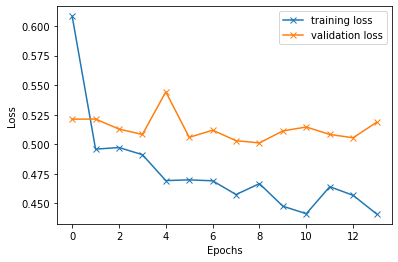

Validation loss: 0.50


In [106]:
# Plot training loss and validation loss for best MLP model
training_loss = best_mlp.history[:, 'train_loss']
validation_loss = best_mlp.history[:, 'valid_loss']

plt.plot(training_loss, 'x-', label='training loss')
plt.plot(validation_loss, 'x-', label='validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

print('Validation loss: %.02f'%min(validation_loss))

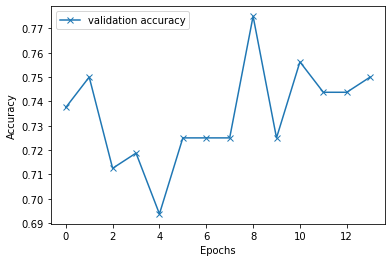

Maximum accuracy: 0.78


In [107]:
# Plot accuracy on validation data on MLP model
validation_accuracy = best_mlp.history[:,'valid_acc']

plt.plot(validation_accuracy,'x-', label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

print('Maximum accuracy: %.02f'%max(validation_accuracy))

### Save best MLP model

In [20]:
# Save the best MLP model to file
with open('best_mlp.pkl', 'wb') as f:
    pickle.dump(best_mlp, f)

## Evaluate Best SVM and MLP Models

### Load best SVM model

In [21]:
# Load the best SVM model from file
best_svm = pickle.load(open('best_svm.sav', 'rb'))

### Load best MLP model

In [22]:
# Define a neural network that has 9 neurons in one hidden layer
class netModule(nn.Module):
    def __init__(
            self,
            num_units=8, # Set number of neurons to 8
            dropout=0.2 # Dropout of 0.2
    ):
        super(netModule, self).__init__()
        self.dropout = nn.Dropout(dropout)
        self.num_units = nn.Linear(X.shape[1], num_units)
        self.output = nn.Linear(num_units, 2)

    def forward(self, X, **kwargs):
        X = torch.relu(self.num_units(X))
        X = self.dropout(X)
        X = torch.softmax(self.output(X),dim=-1)
        return X

In [23]:
# Load best MLP model
with open('best_mlp.pkl', 'rb') as f:
    best_mlp = pickle.load(f)

### Create a dummy model for comparison

In [24]:
# Create a Dummy Classifier model that makes stratified random class predictions
dummy_model = DummyClassifier(strategy='stratified', random_state=1)
dummy_model.fit(X_train_smote, y_train_smote)

DummyClassifier(random_state=1, strategy='stratified')

### Evaluate AUC score on training set

In [25]:
# Calculate AUC on training set for best SVM model
best_svm_y_pred_train = best_svm.predict_proba(X_train_smote)
best_svm_auc_train = roc_auc_score(y_train_smote, best_svm_y_pred_train[:, 1])
print("AUC score for best SVM model on training data: %.03f" %best_svm_auc_train)

AUC score for best SVM model on training data: 0.889


In [26]:
# Calculate AUC on training set for best MLP model
best_mlp_y_pred_train = best_mlp.predict_proba(X_train_smote)
best_mlp_auc_train = roc_auc_score(y_train_smote, best_mlp_y_pred_train[:, 1])
print("AUC score for best MLP model on training data: %.03f" %best_mlp_auc_train)

AUC score for best MLP model on training data: 0.878


In [27]:
# Calculate AUC on training set for dummy model
dummy_y_pred_train = dummy_model.predict_proba(X_train_smote)
dummy_auc_train = roc_auc_score(y_train_smote, dummy_y_pred_train[:, 1])
print("AUC score for dummy model on training data: %.03f" %dummy_auc_train)

AUC score for dummy model on training data: 0.533


### Evaluate AUC score on test set

In [28]:
# Calculate AUC score on test set for best SVM model
best_svm_y_pred = best_svm.predict_proba(X_test)
best_svm_auc = roc_auc_score(y_test, best_svm_y_pred[:, 1])
print("AUC score for best SVM model on test data: %.03f" %best_svm_auc)

AUC score for best SVM model on test data: 0.820


In [29]:
# Calculate AUC score on test set for best MLP model
best_mlp_y_pred = best_mlp.predict_proba(X_test)
best_mlp_auc = roc_auc_score(y_test, best_mlp_y_pred[:, 1])
print("AUC score for best MLP model on test data: %.03f" %best_mlp_auc)

AUC score for best MLP model on test data: 0.831


In [30]:
# Calculate AUC score on test set for dummy model
dummy_y_pred = dummy_model.predict_proba(X_test)
dummy_auc = roc_auc_score(y_test, dummy_y_pred[:, 1])
print("AUC score for dummy model on test data: %.03f" %dummy_auc)

AUC score for dummy model on test data: 0.434


### Evaluate accuracy on test set

In [31]:
# Calculate accuracy on test set for best SVM model
best_svm_y_pred_class = best_svm.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_y_pred_class)
print("Accuracy for best SVM model on test data: %.12f" %best_svm_accuracy)

Accuracy for best SVM model on test data: 0.740259740260


In [32]:
# Calculate accuracy on test set for best MLP model
best_mlp_y_pred_class = best_mlp.predict(X_test)
best_mlp_accuracy = accuracy_score(y_test, best_mlp_y_pred_class)
print("Accuracy for best MLP model on test data: %.03f" %best_mlp_accuracy)

Accuracy for best MLP model on test data: 0.734


In [33]:
# Calculate accuracy on test set for dummy model
dummy_y_pred_class = dummy_model.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_y_pred_class)
print("Accuracy for dummy model on test data: %.03f" %dummy_accuracy)

Accuracy for dummy model on test data: 0.442


### Plot confusion matrix

Normalized confusion matrix
[[0.72       0.28      ]
 [0.22222222 0.77777778]]


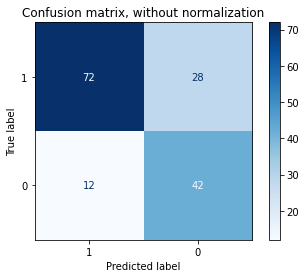

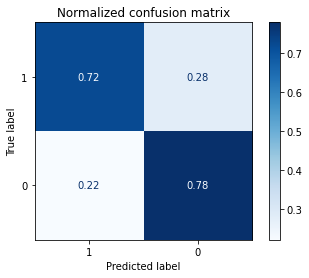

In [34]:
# Display confusion matrix for best SVM model

# Code is from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
  disp = plot_confusion_matrix(best_svm, X_test, y_test,
                               display_labels=data.Outcome.unique(),
                               cmap=plt.cm.Blues,
                               normalize=normalize)
  disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()



Normalized confusion matrix
[[0.65       0.35      ]
 [0.11111111 0.88888889]]


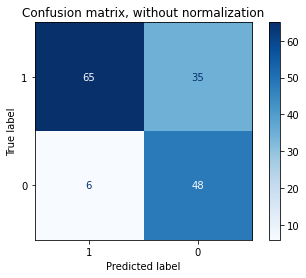

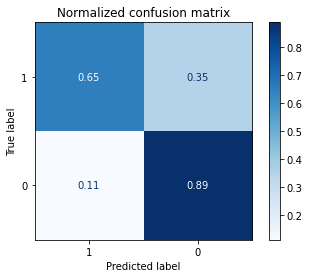

In [35]:
# Display confusion matrix for best MLP model

# Code is from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
  disp = plot_confusion_matrix(best_mlp, X_test, y_test,
                               display_labels=data.Outcome.unique(),
                               cmap=plt.cm.Blues,
                               normalize=normalize)
  disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()



### Plot Receiver Operation Curve (ROC)

In [36]:
# Code is based on https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [37]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR) and threshold for best SVM model
svm_FPR, svm_TPR, svm_thresholds = roc_curve(y_test, best_svm_y_pred_class)

In [38]:
# Calculate the geometric mean for the threshold for best SVM model
svm_gmeans = np.sqrt(svm_TPR * (1-svm_FPR))

In [39]:
# Determine the best FPR and TPR at largest geometric mean for best SVM model
svm_ix = np.argmax(svm_gmeans)
print('Best False Positive Rate=%.3f, Best True Positive Rate = %.3f' %(svm_FPR[svm_ix],svm_TPR[svm_ix]))

Best False Positive Rate=0.280, Best True Positive Rate = 0.778


In [40]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR) and threshold for best MLP model
mlp_FPR, mlp_TPR, mlp_thresholds = roc_curve(y_test, best_mlp_y_pred_class)

In [41]:
# Calculate the geometric mean for the threshold for best MLP model
mlp_gmeans = np.sqrt(mlp_TPR * (1-mlp_FPR))

In [42]:
# Determine the best FPR and TPR at largest geometric mean for best MLP model
mlp_ix = np.argmax(mlp_gmeans)
print('Best False Positive Rate=%.3f, Best True Positive Rate = %.3f' %(mlp_FPR[mlp_ix],mlp_TPR[mlp_ix]))

Best False Positive Rate=0.350, Best True Positive Rate = 0.889


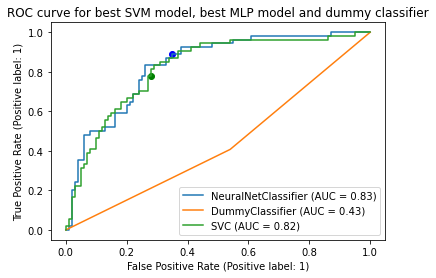

In [43]:
# Plot Receiver Operation Curve (ROC) for best MLP model 
best_mlp_roc = plot_roc_curve(best_mlp, X_test, y_test)

# Add ROC for Dummy Classifier model
dummy_roc = plot_roc_curve(dummy_model, X_test, y_test, ax=best_mlp_roc.ax_)

# Add ROC for best SVM model 
best_svm_roc = plot_roc_curve(best_svm, X_test, y_test, ax=best_mlp_roc.ax_)

# Add optimal threshold for best MLP model
plt.scatter(mlp_FPR[mlp_ix], mlp_TPR[mlp_ix], marker='o', color='blue')

# Add optimal threshold for best SVM model
plt.scatter(svm_FPR[svm_ix], svm_TPR[svm_ix], marker='o', color='green')

# Add title
plt.title("ROC curve for best SVM model, best MLP model and dummy classifier")
plt.show()

### Plot Precision-recall curve

In [44]:
# Code is based on https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [45]:
# Obtain precision, recall and threshold for best SVM model
svm_precision, svm_recall, svm_prthresholds = precision_recall_curve(y_test, best_svm_y_pred_class)

# Calculate F1 score for the best SVM model
svm_fscore = (2 * svm_precision * svm_recall) / (svm_precision + svm_recall)

# Determine the best recall and precision at largest F1 score for best MLP model
svmf_ix = np.argmax(svm_fscore)
print('Best Recall=%.3f, Best Precision=%.3f' % (svm_recall[svmf_ix],svm_precision[svmf_ix]))

Best Recall=0.778, Best Precision=0.600


In [46]:
# Obtain precision, recall and threshold for best MLP model
mlp_precision, mlp_recall, mlp_prthresholds = precision_recall_curve(y_test, best_mlp_y_pred_class)

# Calculate F1 score for best MLP model
mlp_fscore = (2 * mlp_precision * mlp_recall) / (mlp_precision + mlp_recall)

# Determine the best recall and precision at largest F1 score for best MLP model
mlpf_ix = np.argmax(mlp_fscore)
print('Best Recall=%.3f, Best Precision=%.3f' % (mlp_recall[mlpf_ix],mlp_precision[mlpf_ix]))

Best Recall=0.889, Best Precision=0.578


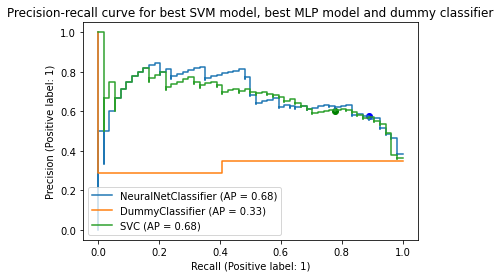

In [47]:
# Plot Precision-Recall Curve for best MLP model
best_mlp_prc = plot_precision_recall_curve(best_mlp, X_test, y_test)

# Add Precision-Recall Curve for Dummy Classifier model
dummy_prc = plot_precision_recall_curve(dummy_model, X_test, y_test, ax=best_mlp_prc.ax_)

# Add Precision-Recall Curve for best SVM model 
best_svm_prc = plot_precision_recall_curve(best_svm, X_test, y_test, ax=best_mlp_prc.ax_)

# Add optimal threshold for best SMV model
plt.scatter(svm_recall[svmf_ix], svm_precision[svmf_ix], marker='o', color='green')

# Add optimal threshold for best MLP model
plt.scatter(mlp_recall[mlpf_ix], mlp_precision[mlpf_ix], marker='o', color='blue')

# Add title
plt.title("Precision-recall curve for best SVM model, best MLP model and dummy classifier")
plt.show()

## Results, Findings and Evaluation

### Model Selection

For SVM, applying RBF kernel, relatively large C of 100 and moderate gamma of 0.02 yielded the highest AUC. The choice of kernel appeared to have strongest impact on AUC, as all RBF kernel SVMs showed higher AUCs than linear or third degree polynomial kernel SVMs. Increasing C slightly increased the AUC for RBF and polynomial SVMs, as this decreased the margin and increased the complexity of the decision boundary, which resulted in higher variance and lower bias [11]. Increasing gamma, which determines how far the influence of each training example, showed mixed impact on AUCs for third degree polynomial and RBF SVMs.

For MLP, the combination of 8 neurons in a single hidden layer, relatively large batch size of 64, high learning rate of 1, small dropout rate of 0.2 and small momentum of 0.3 yielded the highest AUC. The architecture appeared to show the highest impact on AUC. Increasing the number of hidden neurons from 3 to 5 appeared to correlate with increase in AUC. As the model complexity increased, the variance increased and the bias reduced. Nonetheless, adding more hidden neurons or a second hidden layer resulted in little or no increase in AUCs, as the models started to become too complex and overfitted. Further investigation is needed to determine the influence of each of the parameters optimizer momentum, learning rate, dropout rate and batch size on AUC. Two models with two hidden layers and optimizer momentum of 0.9 lacked discriminative power between the two target classes (AUC of 0.5), which reflected the steps taken by stochastic gradient descend algorithm were so large that the minimum loss could not be found.

### Algorithm comparison

When constructing the final model, all training data were used for SVM, whereas for MLP, only 80% of the training data were used, as 20% of the data was withheld for validation in Early Stopping. Both final MLP and SVM models showed relatively high AUC scores of 0.878 and 0.889 respectively on training data and slightly lower AUCs on the test data. The stratified 5-fold cross validation AUCs for SVM (0.851) and MLP (0.844) obtained previously were between the AUCs on training and test data for the final models. MLP achieved a marginally higher AUC of 0.831 than SVM (0.820) on the test data, whereas SVM showed slightly better performance (0.740) than MLP (0.734). 

The higher AUC scores on training data than on the test data for both algorithms indicated both MLP and SVM were slightly overfitted with relatively high variance and low bias. When compared to MLP, SVM showed more prominent overfitting, higher variance and lower bias. The generalizability of these models can be increased by reducing the model complexity or by providing more data for training. Model complexity can be reduced by using a simpler kernel or a smaller regularization parameter C for SVM, and using fewer hidden neurons, increasing the dropout rate and increasing the batch size for MLP [12].

SVM required significantly less computation time for Randomized Search. Two-layer and three-layer MLP required 66.8 times and 85.9 times longer computation time than SVM respectively. As we expected, the repeated, iterative search for minimal loss in MLP required significantly longer time than SVM’s approach in maximizing the margin of the decision boundary.
The ROC and confusion matrices revealed SVM displayed a slightly higher sensitivity (also known as true positive rate or recall) of 72% than MLP’s 65%. This indicated SVM exhibited slightly better capability in making positive diagnosis for diabetes, particularly for this case where incorrectly classifying diabetes patients as non-diabetic may cause serious complications. Nonetheless, the specificity (=1- true negative rate) for MLP 89% was significantly higher than SVM’s 78%. Considering diabetes occurs in a relatively small proportion of population (8.5% in 2014 [1]), in countries where medical resources are inadequate, MLP would be more suitable than SVM, as there is a high cost associated with incorrect classification of a large number of non- diabetes patients.
The precision-recall curves revealed both SVM and MLP attained precision of 60% and 58%, indicating they were capable of making correct positive diagnosis out of all positive predictions made respectively, at the imbalanced diabetes to non-diabetes class ratio of 268:500 [13].

The use of SMOTE introduced bias towards the minority diabetic class during training. This may have a particularly significant impact on SVM when the synthesized data were close to the decision boundary. Such impact can be lessened by combining SMOTE with some undersampling of the majority non-diabetic class instead of solely applying SMOTE on the minority class, so that fewer synthetic data would be required [10]. The bias would have less influence on MLP as the training data was passed into the neural network in batches and for multiple epochs.

## Conclusion

Both MLP and SVM exhibited high capability in diagnosing diabetes. The differences between the performance of the two algorithms were subtle, as reflected by the similarity in AUCs and accuracies on test or training data. MLP’s higher specificity compared to SVM makes MLP more suitable for real-life situation, where diabetes only occurs in a small proportion of population and there is a high cost associated with the incorrect classification of a large number of non-diabetes patients. There is, however, small trade-offs in sensitivity. Furthermore, significantly longer computation time and larger efforts in terms of architecture and hyperparameter optimization would be required for training MLP when compared to SVM. Further investigation should be made into developing ensemble models such as bagging, which is expected to have lower variance and higher generalizability [14].

## References 

1. Who.int. 2021. Diabetes. [online] Available at: <https://www.who.int/news-room/fact-sheets/detail/diabetes/> [Accessed 12 April 2021].
2. Gardner, M. and Dorling, S., 1998. Artificial neural networks (the multilayer perceptron)—a review of applications in the atmospheric sciences. Atmospheric Environment, 32(14-15), pp.2627-2636.
3. Garbin, C., Zhu, X. and Marques, O., 2020. Dropout vs. batch normalization: an empirical study of their impact to deep learning. Multimedia Tools and Applications, 79(19-20), pp.12777-12815.
4. Prechelt, L., 1998. Automatic early stopping using cross validation: quantifying the criteria. Neural Networks, 11(4), pp.761-767.
5. Fukumizu, K. and Amari, S., 2000. Local minima and plateaus in hierarchical structures of multilayer perceptrons. Neural Networks, 13(3), pp.317-327.
6. CS229 Lecture notes by Andrew Ng. 2021. [online] Available at: <https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf> [Accessed 12 April 2021].
7. Ebenezer Obaloluwa Olaniyi, K., 2021. Onset Diabetes Diagnosis Using Artificial Neural Network. [online] Ijser.org. Available at: <https://www.ijser.org/paper/Onset-Diabetes-Diagnosis-Using-Artificial-Neural-Network.html> [Accessed 12 April 2021].
8. van Gestel, T., Suykens, J., Baesens, B., Viaene, S., Vanthienen, J., Dedene, G., de Moor, B. and Vandewalle, J., 2004. Benchmarking Least Squares Support Vector Machine Classifiers. Machine Learning, 54(1), pp.5-32.
9. Kaggle.com. 2021. Pima Indians Diabetes Database. [online] Available at: <https://www.kaggle.com/uciml/pima-indians-diabetes-database> [Accessed 12 April 2021].
10. Chawla, N., Bowyer, K., Hall, L. and Kegelmeyer, W., 2002. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, pp.321-357.
11. Valentini, G. and Dietterich, T., 2002. Bias—Variance Analysis and Ensembles of SVM. Multiple Classifier Systems, pp.222-231.
12. Garbin, C., Zhu, X. and Marques, O., 2020. Dropout vs. batch normalization: an empirical study of their impact to deep learning. Multimedia Tools and Applications, 79(19-20), pp.12777-12815.
13. Saito, T. and Rehmsmeier, M., 2015. The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. PLOS ONE, 10(3), p.e0118432.
14. Wang, H., Zheng, B., Yoon, S. and Ko, H., 2018. A support vector machine-based ensemble algorithm for breast cancer diagnosis. European Journal of Operational Research, 267(2), pp.687-699.
